# SUP ML 1 - PREPROCESSING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerias

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder, OneHotEncoder

import statistics as stat

import joblib

from scipy import stats
from scipy.stats import pointbiserialr

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Importar train data

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Master_Data_Science/DSC0324BCN-ENTREGABLE_2-Barria_Bau_Guimerà_Maninatt_Solieri/telecom_churn_TRAINTEST.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Master_Data_Science/DSC0324BCN-ENTREGABLE_2-Barria_Bau_Guimerà_Maninatt_Solieri/telecom_churn_TRAINTEST.csv'

In [ ]:
train.head()

rev     mou  totmrc      da  ovrmou  ovrrev  vceovr  datovr  roam  \
0  23.9975  219.25  22.500  0.2475    0.00     0.0     0.0     0.0   0.0   
1  57.4925  482.75  37.425  0.2475   22.75     9.1     9.1     0.0   0.0   
2  16.9900   10.25  16.990  0.0000    0.00     0.0     0.0     0.0   0.0   
3  38.0000    7.50  38.000  0.0000    0.00     0.0     0.0     0.0   0.0   
4  55.2300  570.50  71.980  0.0000    0.00     0.0     0.0     0.0   0.0   

   change_mou  change_rev  drop_vce  drop_dat  blck_vce  blck_dat   unan_vce  \
0     -157.25    -18.9975  0.666667       0.0  0.666667       0.0   6.333333   
1      532.25     50.9875  8.333333       0.0  1.000000       0.0  61.333333   
2       -4.25      0.0000  0.333333       0.0  0.000000       0.0   2.666667   
3       -1.50      0.0000  0.000000       0.0  0.000000       0.0   0.000000   
4       38.50      0.0000  9.666667       0.0  0.666667       0.0  77.000000   

   unan_dat    plcd_vce  plcd_dat   recv_vce  recv_sms    comp_vce  comp_dat  \
0       0.0   52.333333       0.0  42.333333       0.0   45.000000       0.0   
1       0.0  263.333333       0.0  69.000000       0.0  193.333333       0.0   
2       0.0    9.000000       0.0   0.333333       0.0    6.000000       0.0   
3       0.0    3.666667       0.0   1.333333       0.0    3.666667       0.0   
4       0.0  222.333333       0.0  94.666667       0.0  137.000000       0.0   

   custcare   ccrndmou     cc_mou   inonemin  threeway    mou_cvce  mou_cdat  \
0  0.000000   0.000000   0.000000  18.000000  0.000000   90.643333       0.0   
1  1.666667   6.333333   5.463333  53.000000  0.333333  189.396667       0.0   
2  0.000000   0.000000   0.000000   0.333333  0.000000    5.426667       0.0   
3  0.000000   0.000000   0.000000   1.333333  0.000000    8.410000       0.0   
4  8.666667  15.000000  11.076667  66.000000  0.000000  285.233333       0.0   

     mou_rvce  owylis_vce  mouowylisv  iwylis_vce  mouiwylisv   peak_vce  \
0   97.176667    0.000000    0.000000    0.000000    0.000000  58.000000   
1   55.280000   46.333333   24.216667    6.333333    3.696667  83.666667   
2    0.000000    0.000000    0.000000    0.000000    0.000000   5.000000   
3    0.413333    0.333333    0.256667    0.000000    0.000000   1.333333   
4  106.330000   14.666667   10.816667    0.666667    0.366667  97.333333   

   peak_dat    mou_peav  mou_pead     opk_vce  opk_dat    mou_opkv  mou_opkd  \
0       0.0  132.600000       0.0   24.000000      0.0   55.220000       0.0   
1       0.0   75.333333       0.0  157.000000      0.0  169.343333       0.0   
2       0.0    5.193333       0.0    1.000000      0.0    0.233333       0.0   
3       0.0    3.380000       0.0    3.666667      0.0    5.450000       0.0   
4       0.0  173.476667       0.0   90.333333      0.0  218.086667       0.0   

    drop_blk     attempt    complete  callfwdv  callwait  churn  months  \
0   1.333333   52.333333   45.000000       0.0  0.333333      1      61   
1   9.333333  263.333333  193.333333       0.0  5.666667      0      56   
2   0.333333    9.000000    6.000000       0.0  0.000000      1      58   
3   0.000000    3.666667    3.666667       0.0  0.000000      0      60   
4  10.333333  222.333333  137.000000       0.0  0.000000      0      57   

   uniqsubs  actvsubs new_cell crclscod asl_flag  totcalls       totmou  \
0         2         1        U        A        N      1652   4228.00000   
1         1         1        N       EA        N     14654  26400.00000   
2         1         1        Y        C        N      7903  24385.05333   
3         1         1        Y        B        N      1502   3065.00000   
4         1         1        Y        A        N      4485  14028.00000   

    totrev   adjrev    adjmou  adjqty  avgrev  avgmou  avgqty  avg3mou  \
0  1504.62  1453.44   4085.00    1602   29.66   83.37   32.69      272   
1  2851.68  2833.88  26367.00   14624   51.53  479.40  265.89      305   
2  2155.91  1934.47  24303.05    7888   34.54

#### Importar dictionary data

In [ ]:
dictionary = pd.read_csv('/content/drive/MyDrive/Master_Data_Science/DSC0324BCN-ENTREGABLE_2-Barria_Bau_Guimerà_Maninatt_Solieri/variable_dictionary.csv')

In [ ]:
print("Creamos un diccionario para la descripcion de las variables")
columns_dict = dictionary.set_index('Variable')[' Description'].to_dict()
columns_dict

Creamos un diccionario para la descripcion de las variables


{'rev': ' Mean monthly revenue (charge amount)',
 'mou': ' Mean number of monthly minutes of use',
 'totmrc': ' Mean total monthly recurring charge',
 'da': ' Mean number of directory assisted calls',
 'ovrmou': ' Mean overage minutes of use',
 'ovrrev': ' Mean overage revenue',
 'vceovr': ' Mean revenue of voice overage',
 'datovr': ' Mean revenue of data overage',
 'roam': ' Mean number of roaming calls',
 'change_mou': ' Percentage change in monthly minutes of use vs previous three month average',
 'change_rev': ' Percentage change in monthly revenue vs previous three month average',
 'drop_vce': ' Mean number of dropped (failed) voice calls',
 'drop_dat': ' Mean number of dropped (failed) data calls',
 'blck_vce': ' Mean number of blocked (failed) voice calls',
 'blck_dat': ' Mean number of blocked (failed) data calls',
 'unan_vce': ' Mean number of unanswered voice calls',
 'unan_dat': ' Mean number of unanswered data calls',
 'plcd_vce': ' Mean number of attempted voice calls pla

In [ ]:
def descrip(columns):
    for col in columns:
        if col in columns_dict:
            print(f'{col}: {columns_dict[col]}')
        else:
            print(f'{col}: No hay descripción disponible')

print("Hacemos una función llamada 'descrip(columns)' para sacar la definición de las columnas del dataset")

Hacemos una función llamada 'descrip(columns)' para sacar la definición de las columnas del dataset


# EDA: Analisis Exploratorio

## Distribución del target

Abandonaron (churn=1)
No abandonraron (churn=0)

La distribucion es:       Abandonaron (churn = 1): 45800 (50.89%)        No abandonaron (not churn = 0): 44200 (49.11%)


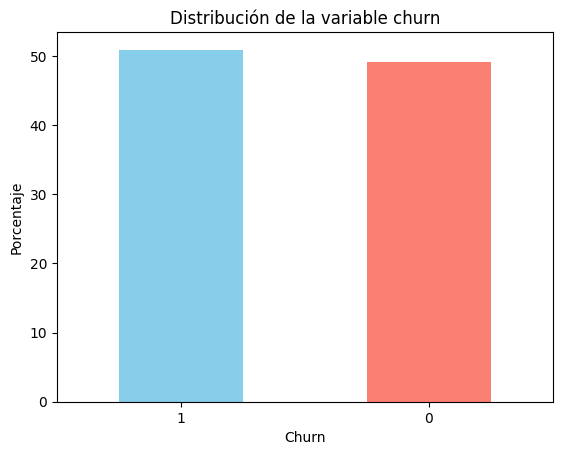

In [ ]:
distribution = (train['churn'].value_counts(normalize=True) * 100).round(2)
print(f"La distribucion es: \
      Abandonaron (churn = 1): {train['churn'].value_counts()[1]} ({distribution[1]}%)\
        No abandonaron (not churn = 0): {train['churn'].value_counts()[0]} ({distribution[0]}%)")
distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de la variable churn')
plt.xlabel('Churn')
plt.ylabel('Porcentaje')
plt.xticks(rotation=0)
plt.show()

## Analisis Univariable

* Distribucion de cada variable

In [ ]:
print(f"Columns: {train.shape[1]}\
      Rows: {train.shape[0]}")

Columns: 100      Rows: 90000


##### Funciones de Distribucion

In [ ]:
def num_data_dist(data, columns_dict): #Creamos una funcion que toma un dataset y el diccionario
	# Primero: toma solo las variables numericas
	numeric_data = data.select_dtypes(include=['number'])
	# Segundo: muestra el Total de numero de variables
	print(f"Cantidad de variables: {numeric_data.shape[1]}\n")
	#Tecero: crea los plots
	for col in numeric_data:
		plt.figure(figsize=(12, 5))
		print(f"{col} - {columns_dict[col]}")
		plt.subplot(1, 2, 1)
		sns.histplot(data[col], kde=True, bins=9)
		plt.title(f'Histogram')

		plt.subplot(1, 2, 2)
		sns.boxplot(x=data[col])
		plt.title(f'Boxplot')

		plt.tight_layout()
		plt.show()

print("Esta funcion identifica todas las variables numericas del dataset, y luego las plotea")

Esta funcion identifica todas las variables numericas del dataset, y luego las plotea


In [ ]:
def cat_data_dist(data, dictionary): #Creamos una funcion que toma un dataset y el diccionario
    # Primero: toma solo las variables categoricas
    categorical_data = data.select_dtypes('object')
    # Segundo: muestra el Total de numero de variables
    print(f"Cantidad de variables: {categorical_data.shape[1]}\n")

    # Tercero: crea un diccionario que va a guardar los porcentages
    percentages_dict = {}

    # Cuarto: Itera sobre cada columna y toma la descripcion de la variable
	# saca su value counts normalized y lo convierte en un string
    for column in categorical_data.columns:
        description = dictionary.get(column, "No description available")
        value_counts = categorical_data[column].value_counts(normalize=True) * 100
        value_counts_str = " ".join([f"{idx}: {val:.2f}%" for idx, val in value_counts.items()])

        #Quinto: Guarda los porcentajes para hacer el plotting
        percentages_dict[column] = value_counts

    # Sexto: Plottea los porcentajes
    for column, percentages in percentages_dict.items():
        plt.figure(figsize=(10, 6))
        bars = plt.bar(percentages.index.astype(str), percentages.values)
        plt.bar(percentages.index.astype(str), percentages.values)
        plt.title(f"{column} ({description})")
        plt.xlabel("Valores")
        plt.ylabel("Porcentajes")
        plt.xticks(rotation=45)
        plt.show()

print("Esta funcion obtiene los value counts de cada variable categorica y luego los plotea")

Esta funcion obtiene los value counts de cada variable categorica y luego los plotea


In [ ]:
def data_vs_target(data, target, dictionary): #Creamos una funcion que toma un dataset y el diccionario
	# Primero: toma solo las variables
	numeric_data = data.select_dtypes(include=['number'])
	categorical_data = data.select_dtypes('object')
	# Segundo: muestra el Total de numero de variables
	print(f"Cantidad de variables numericas: {numeric_data.shape[1]}\n")
	print(f"Cantidad de variables categoricas: {categorical_data.shape[1]}\n")

	#Tecero: crea los plots
	for col in numeric_data:
		if col != 'churn':
			plt.figure(figsize=(12, 5))
			print(f"{col} - {dictionary.get(col, 'Descripción no disponible')}")
			plt.subplot(1, 2, 1)
			sns.histplot(data= data, x=col, hue=target, kde=True, bins=8)
			plt.title(f'{col} vs churn')
			plt.tight_layout()
			plt.show()

	for col in categorical_data.columns:
			plt.figure(figsize=(12, 5))
			print(f"{col} - {dictionary.get(col, 'Descripción no disponible')}")
			sns.countplot(x=col, hue='churn', data=data, palette='viridis')
			plt.title(f'{col} vs churn')
			plt.xlabel(col)
			plt.ylabel('Frecuencia')
			plt.grid(False)
			plt.legend(title='Churn')
			plt.show()

print("Esta funcion compara la distribucion de todas las variables con el target")

Esta funcion compara la distribucion de todas las variables con el target


##### Variables Numericas

Cantidad de variables: 79

rev -  Mean monthly revenue (charge amount)


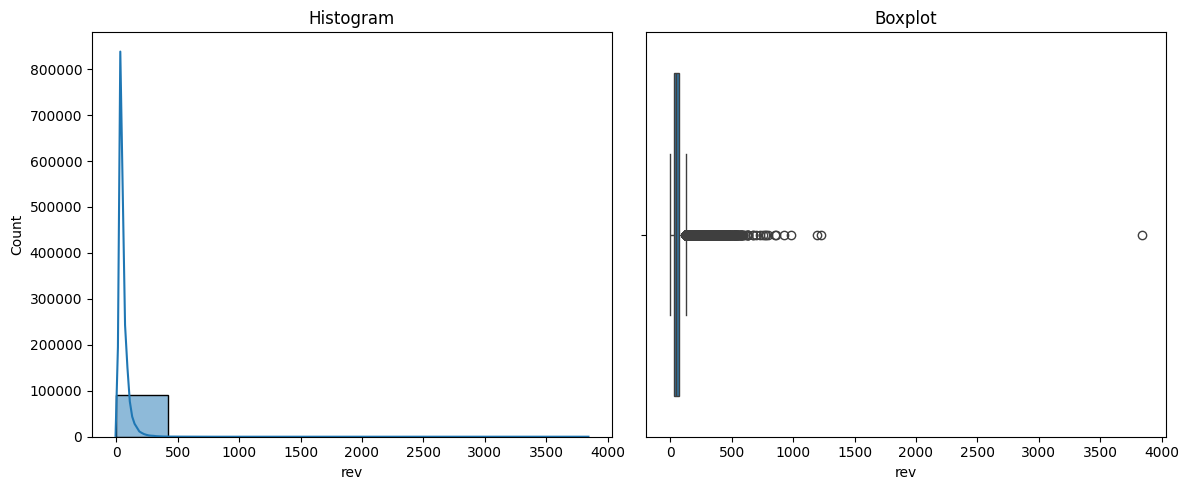

mou -  Mean number of monthly minutes of use


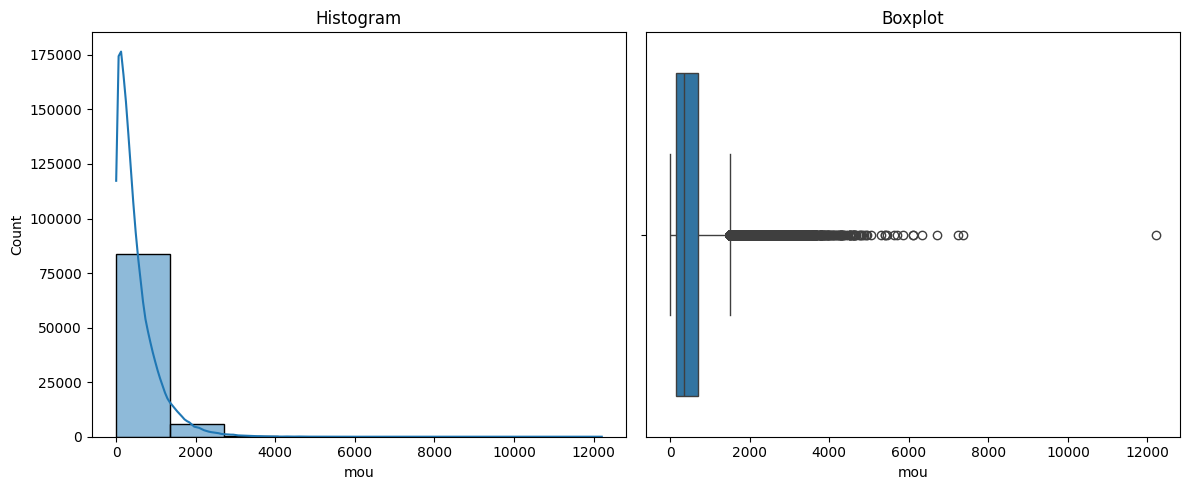

totmrc -  Mean total monthly recurring charge


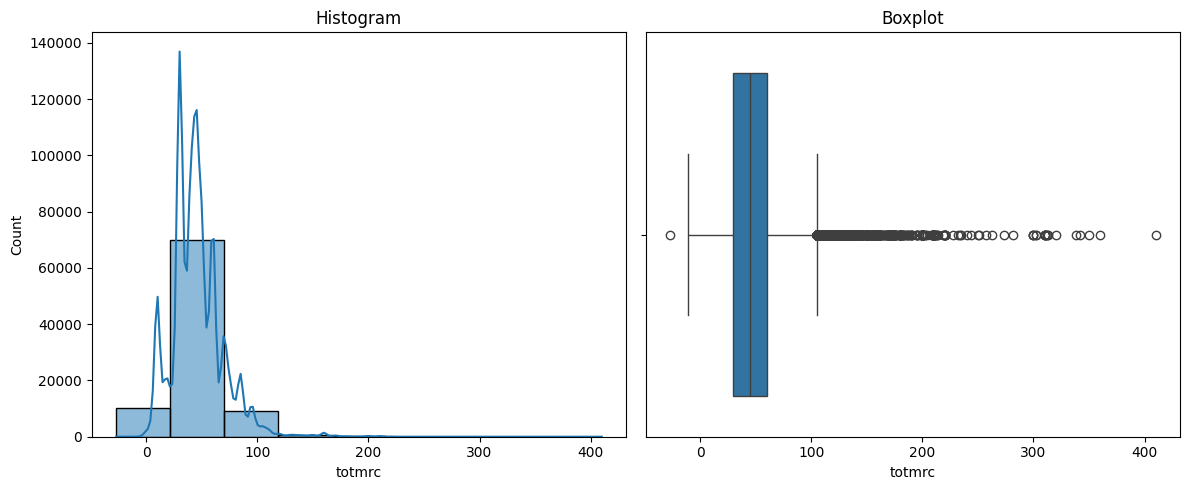

da -  Mean number of directory assisted calls


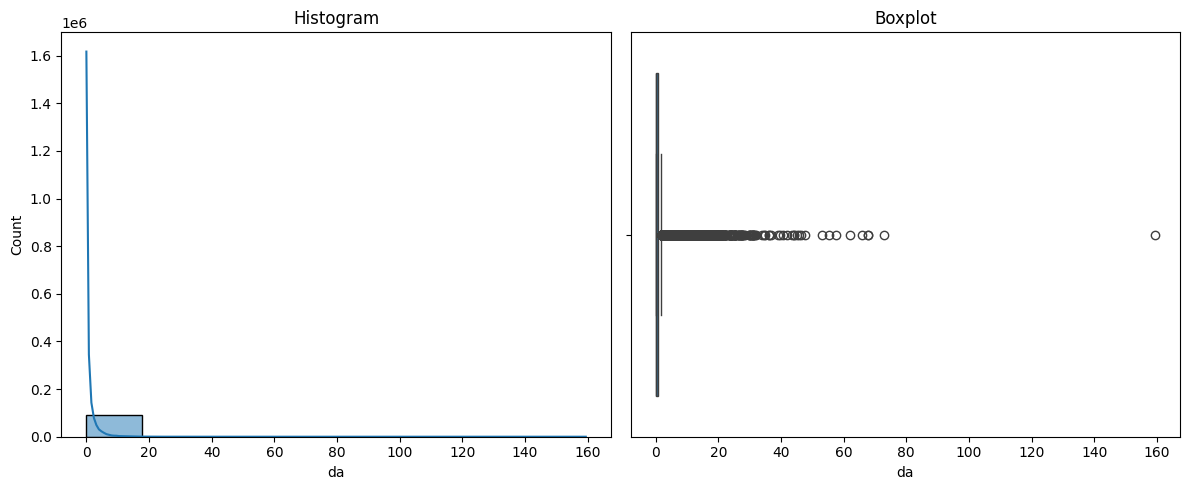

ovrmou -  Mean overage minutes of use


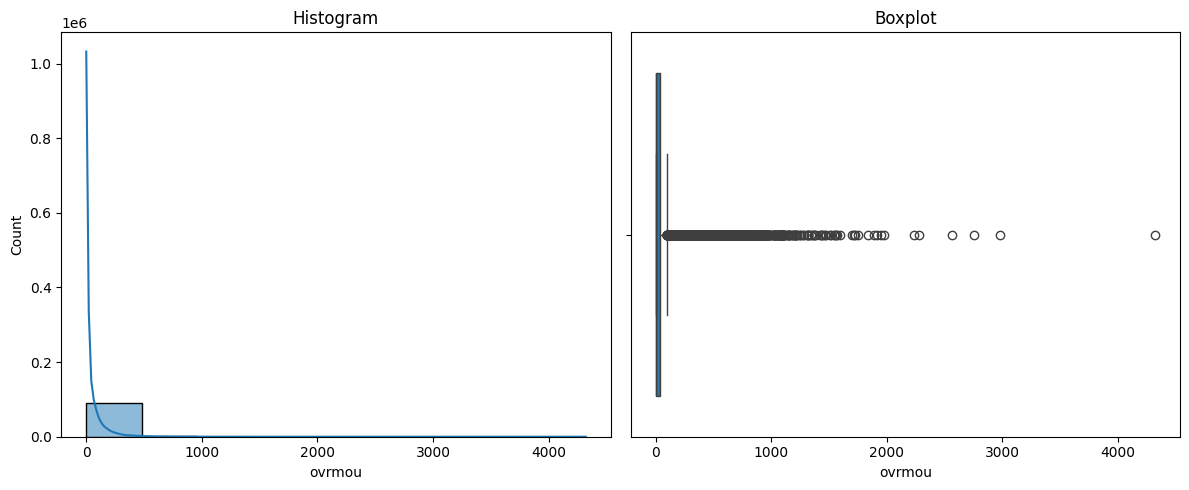

ovrrev -  Mean overage revenue


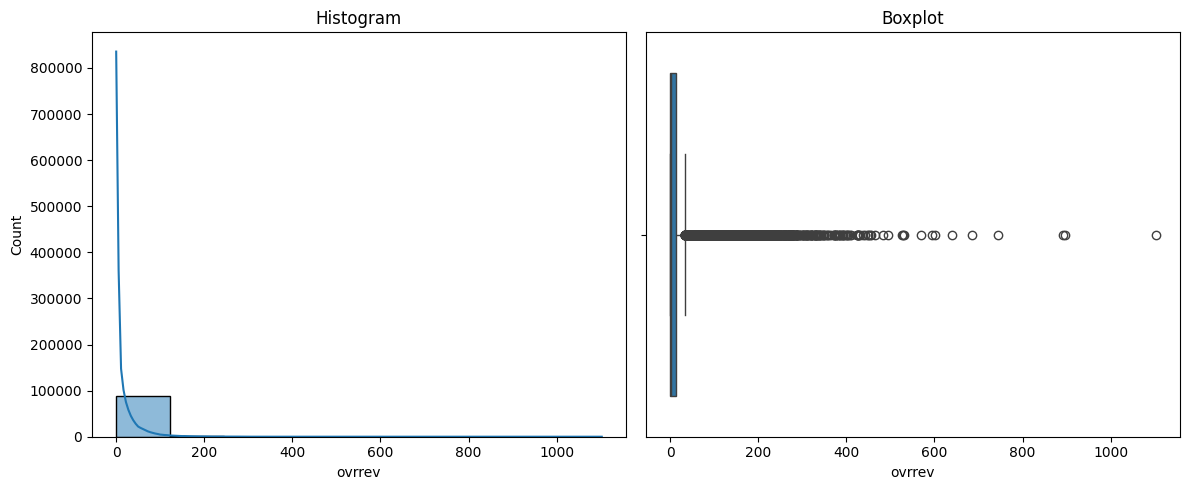

vceovr -  Mean revenue of voice overage


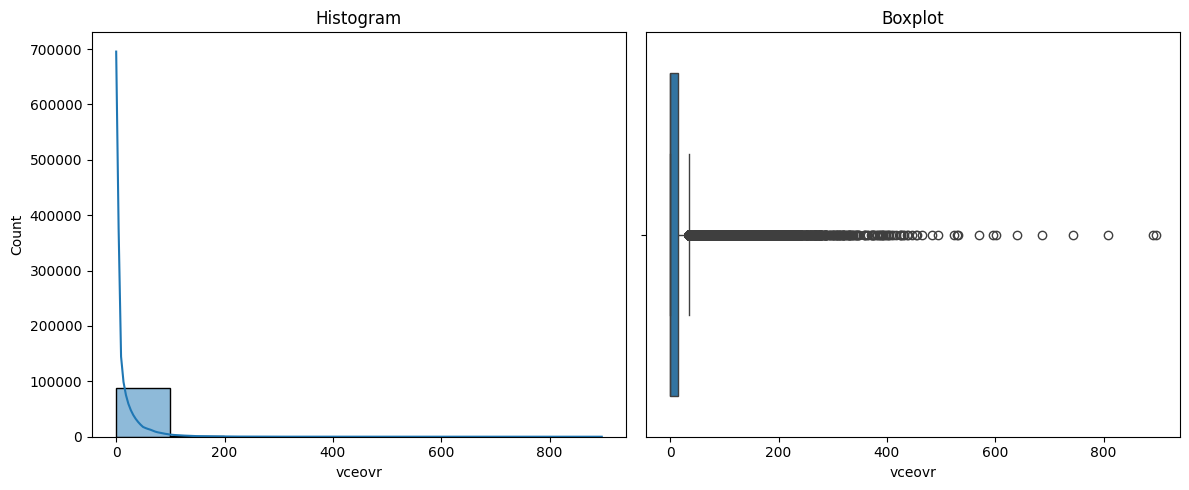

datovr -  Mean revenue of data overage


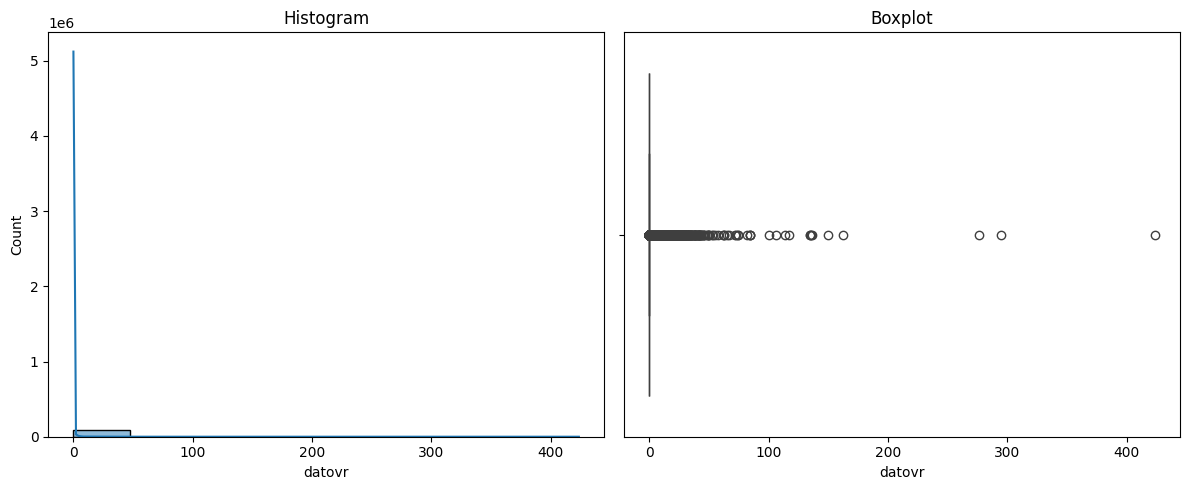

roam -  Mean number of roaming calls


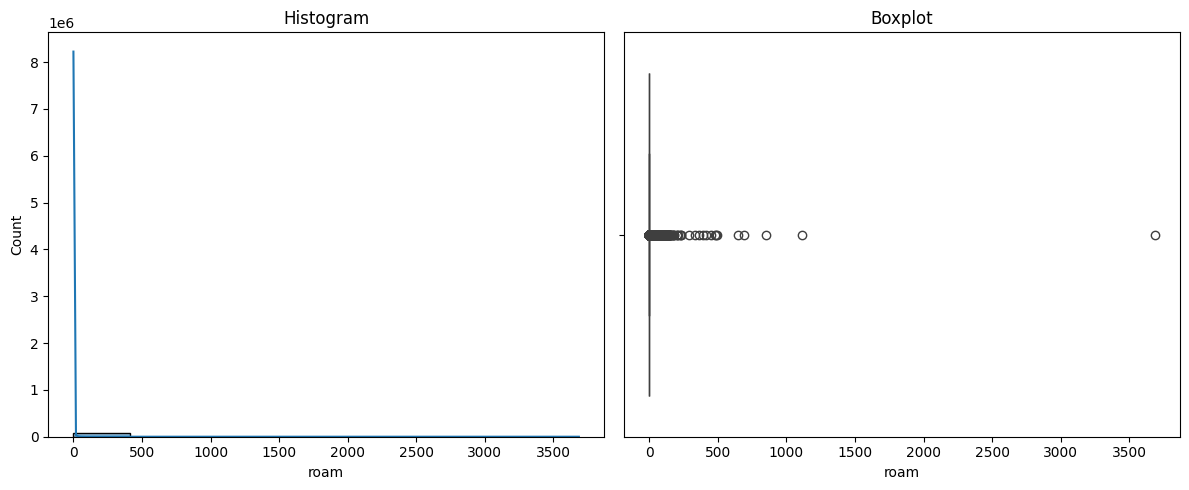

change_mou -  Percentage change in monthly minutes of use vs previous three month average


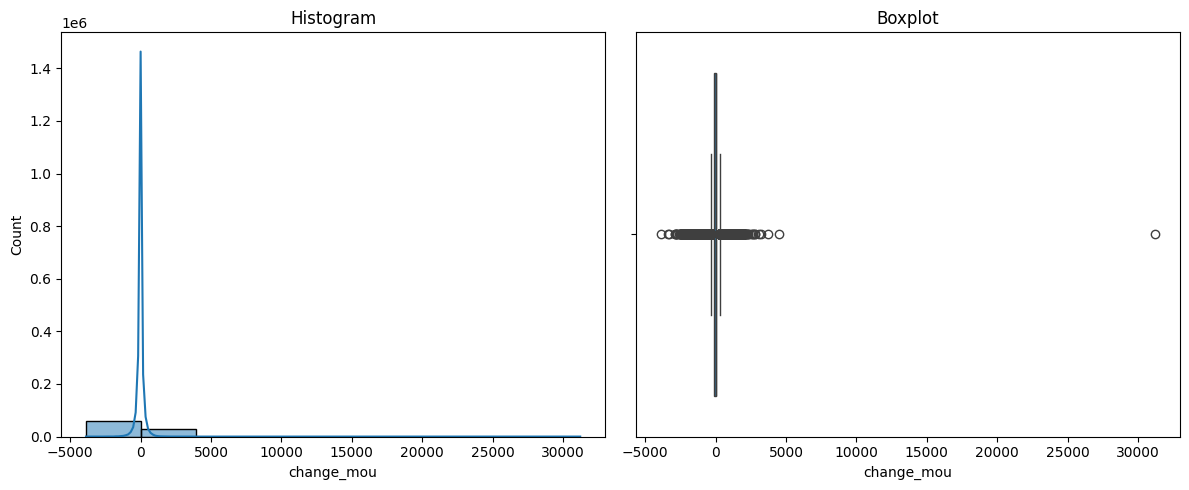

change_rev -  Percentage change in monthly revenue vs previous three month average


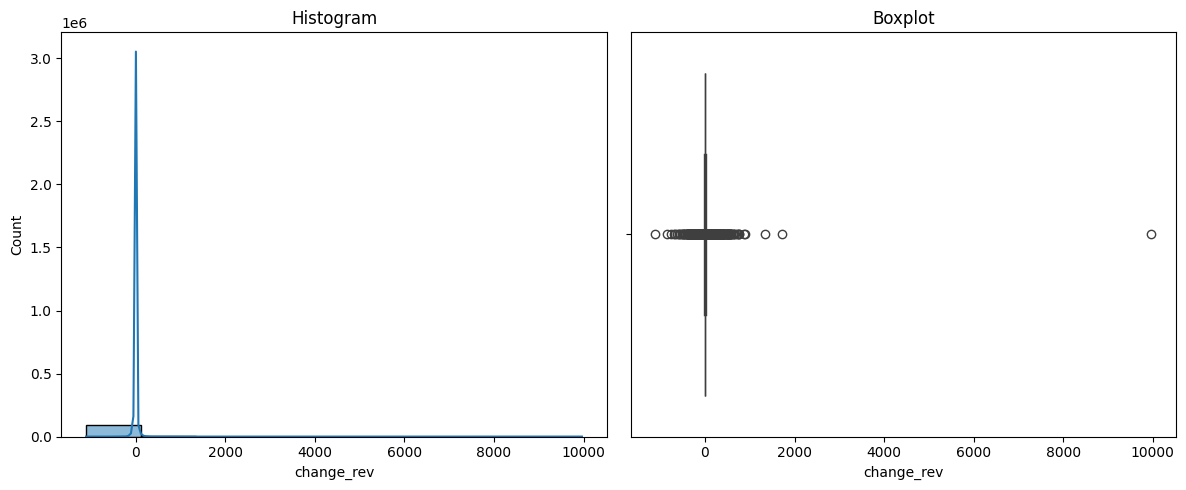

drop_vce -  Mean number of dropped (failed) voice calls


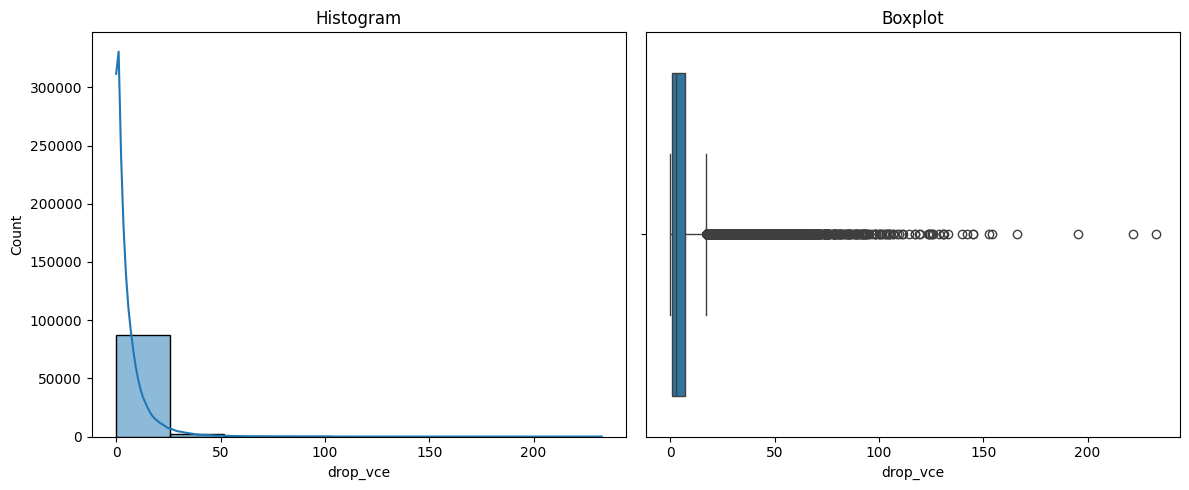

drop_dat -  Mean number of dropped (failed) data calls


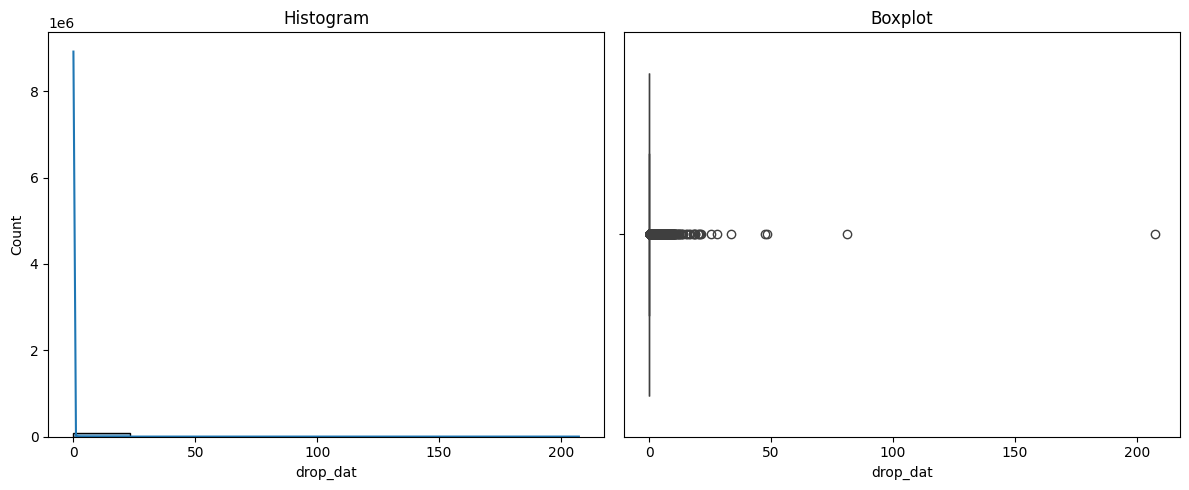

blck_vce -  Mean number of blocked (failed) voice calls


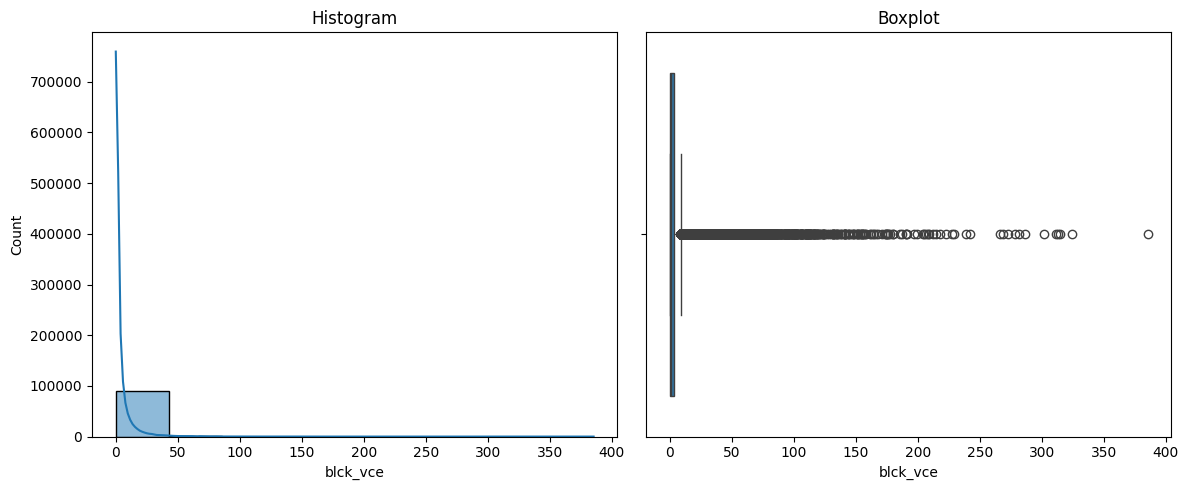

blck_dat -  Mean number of blocked (failed) data calls


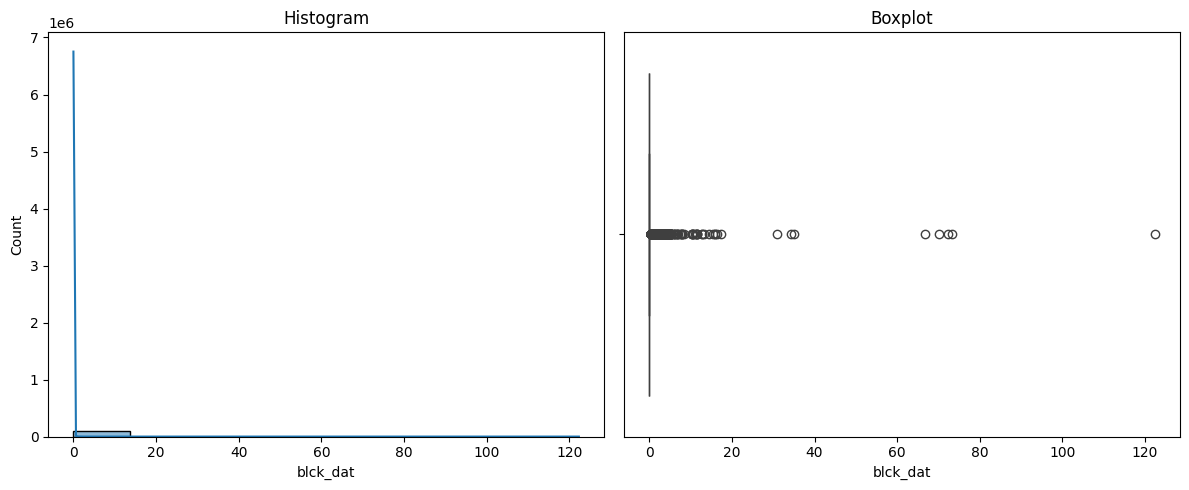

unan_vce -  Mean number of unanswered voice calls


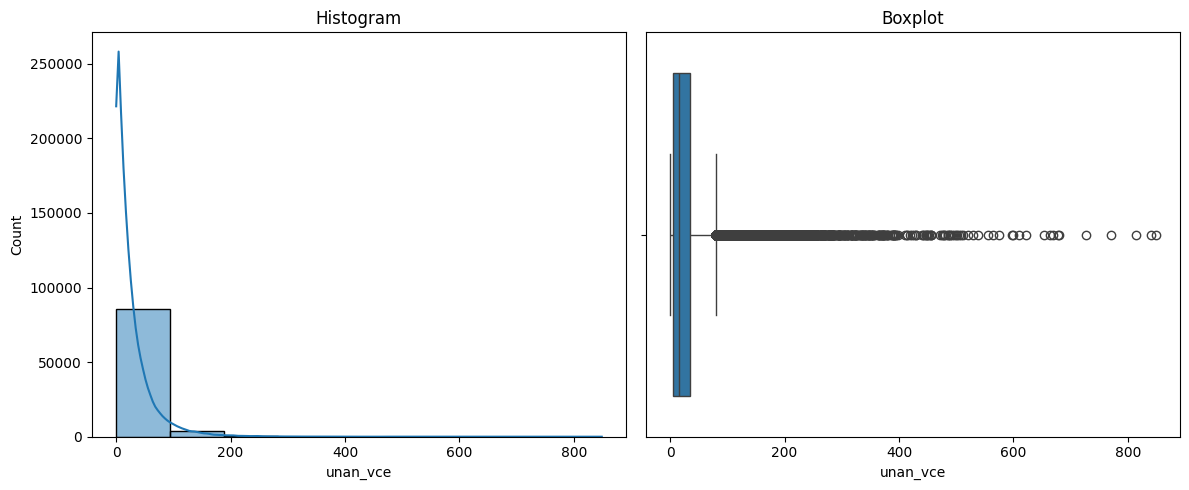

unan_dat -  Mean number of unanswered data calls


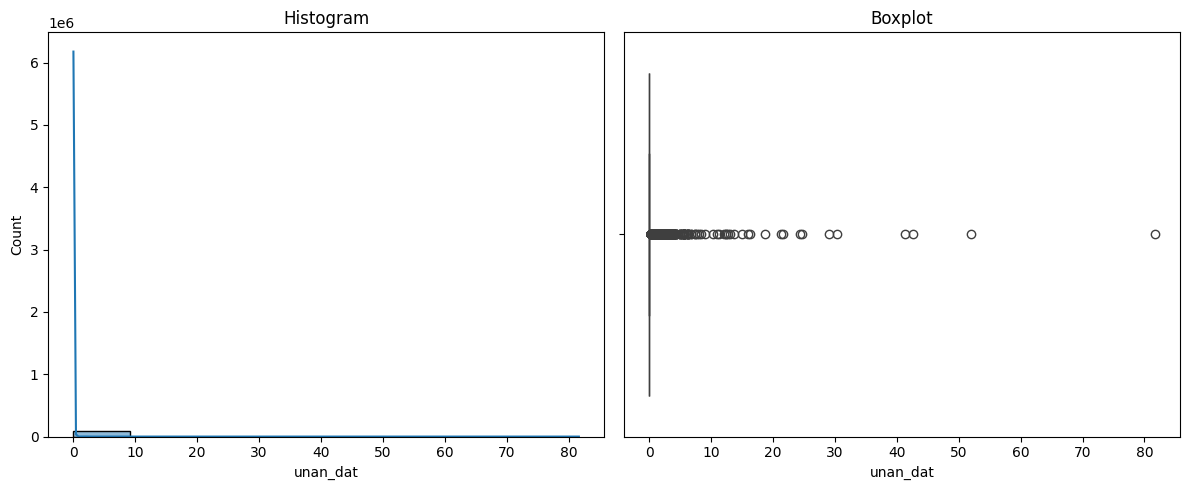

plcd_vce -  Mean number of attempted voice calls placed


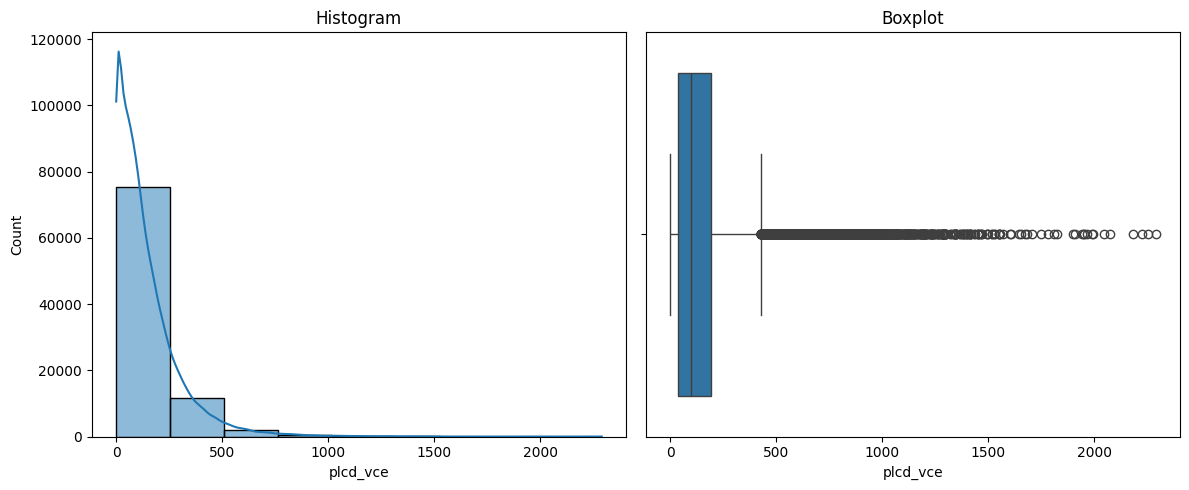

plcd_dat -  Mean number of attempted data calls placed


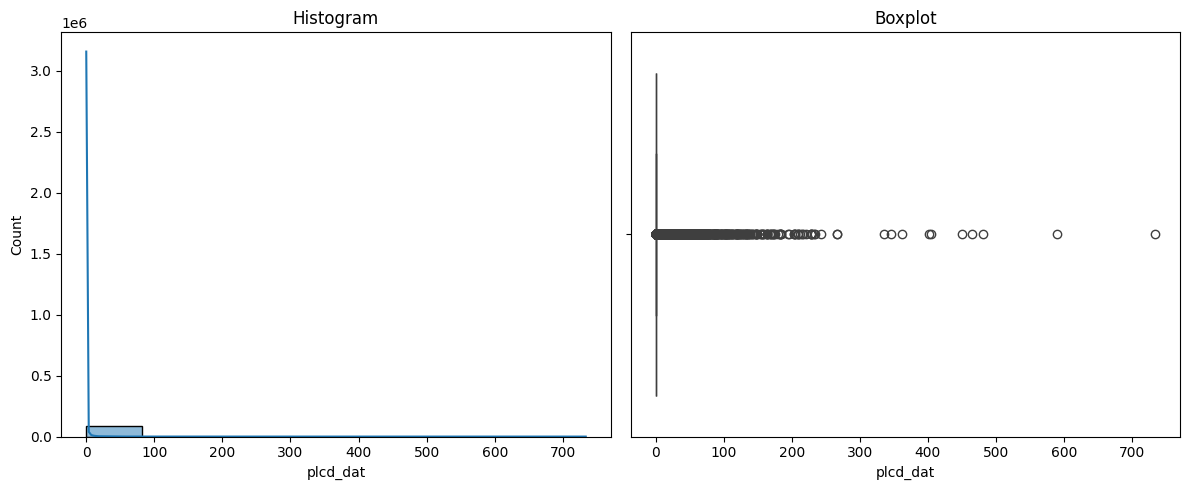

recv_vce -  Mean number of received voice calls


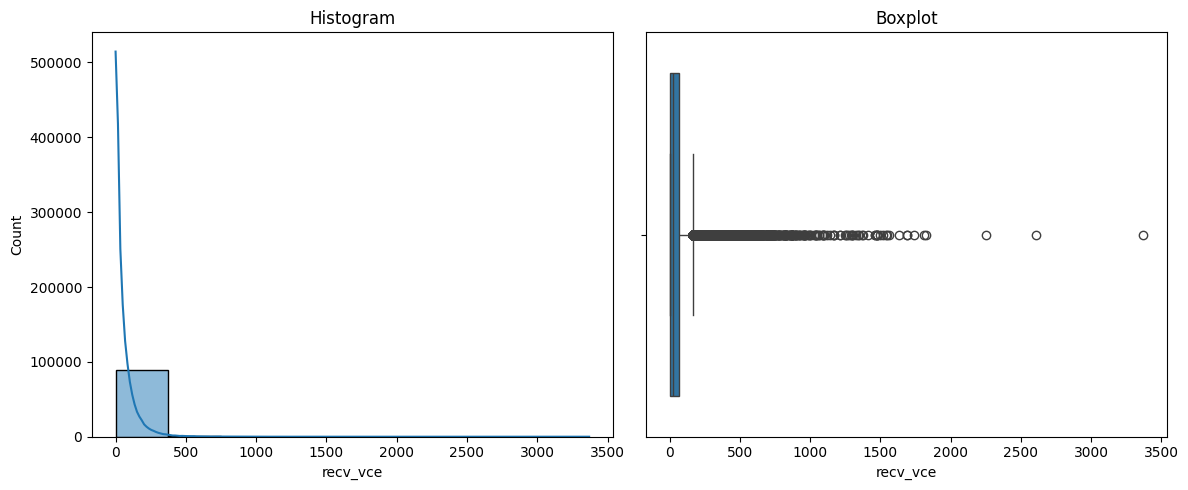

recv_sms -  Mean number of received sms


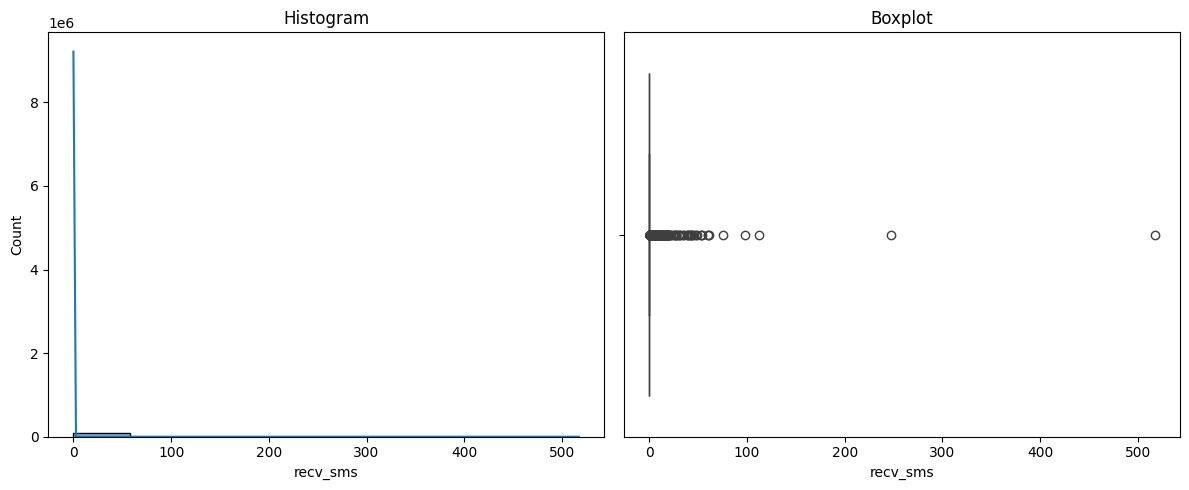

comp_vce -  Mean number of completed voice calls


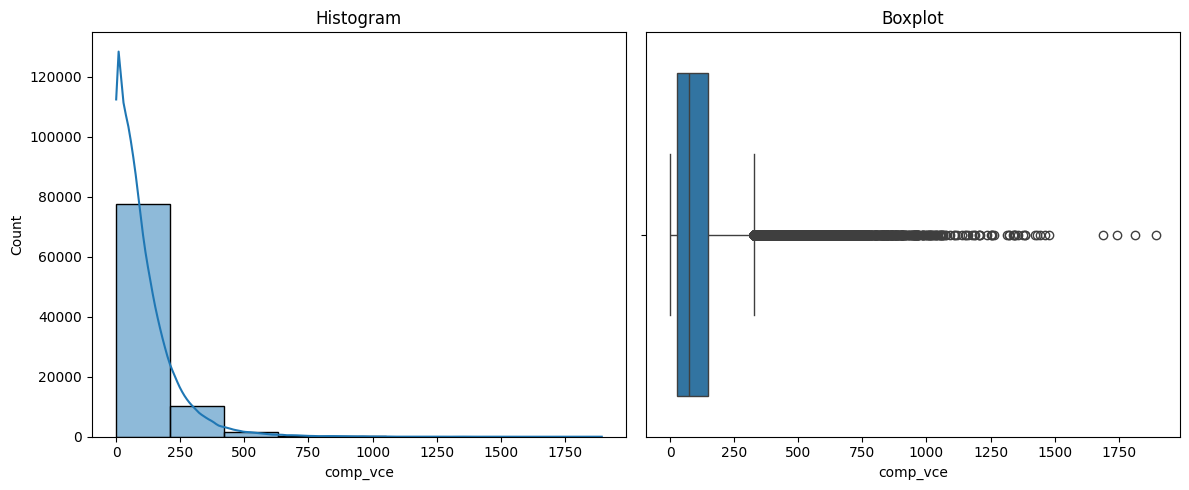

comp_dat -  Mean number of completed data calls


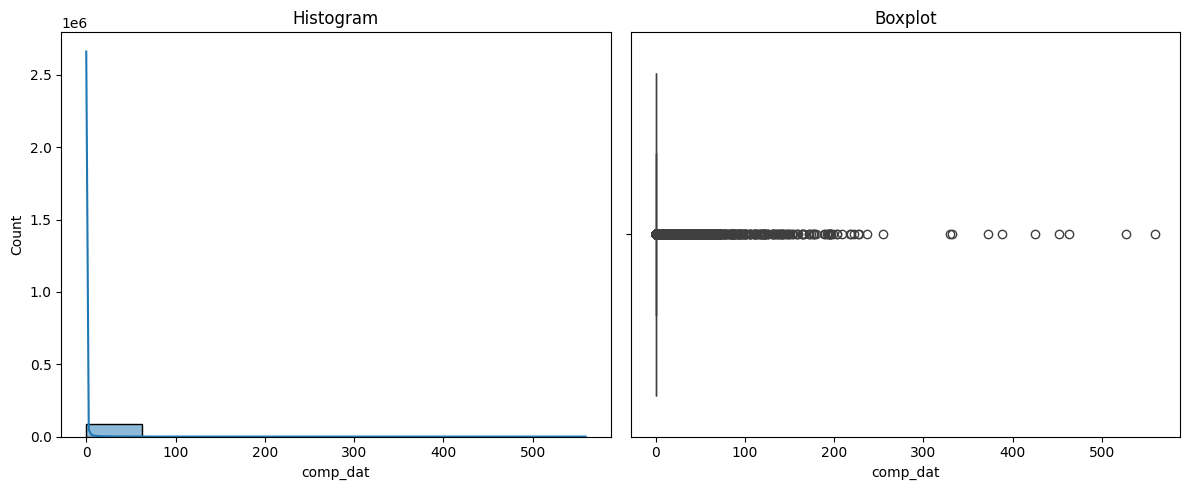

custcare -  Mean number of customer care calls


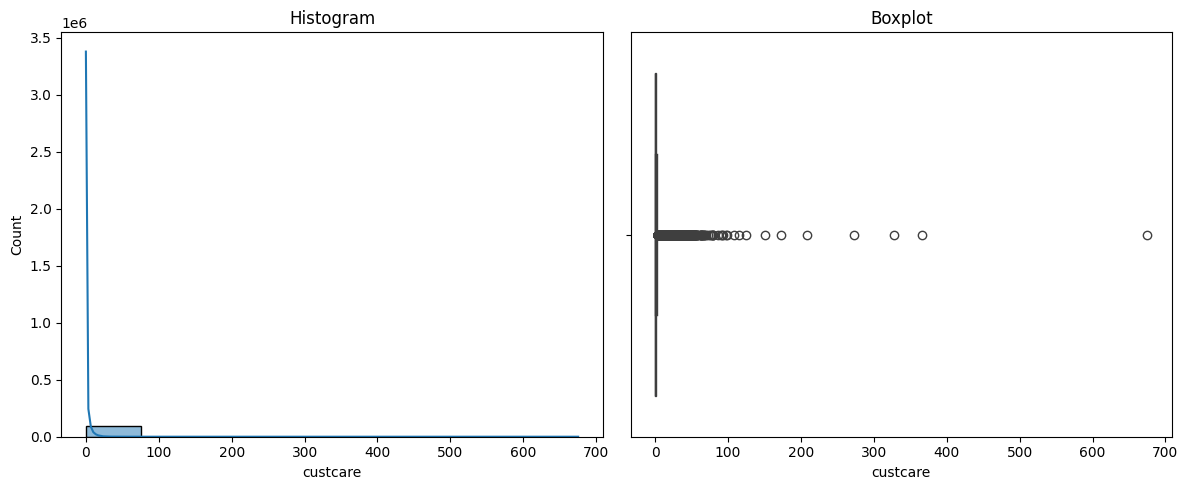

ccrndmou -  Mean rounded minutes of use of customer care calls


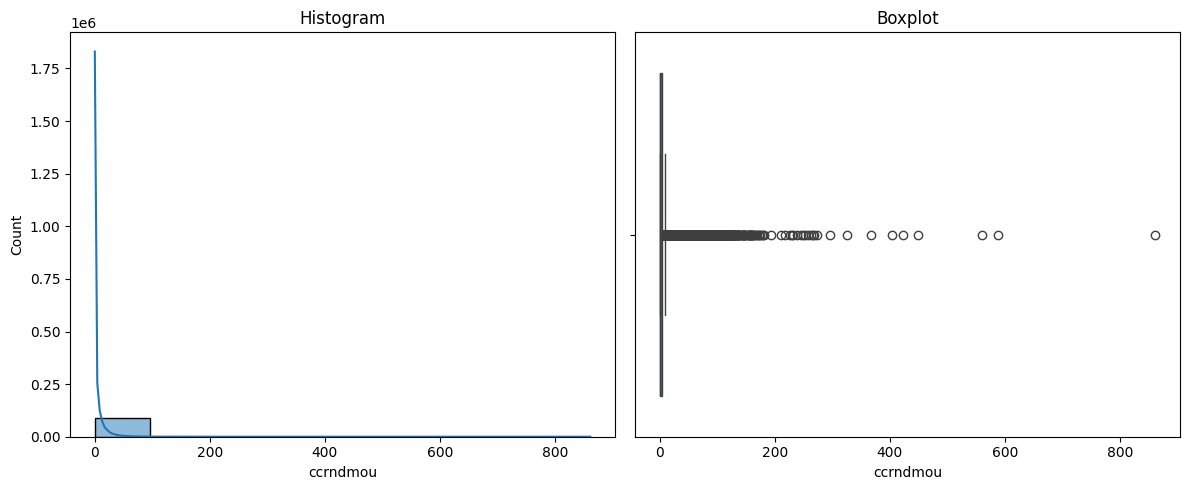

cc_mou -  Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls


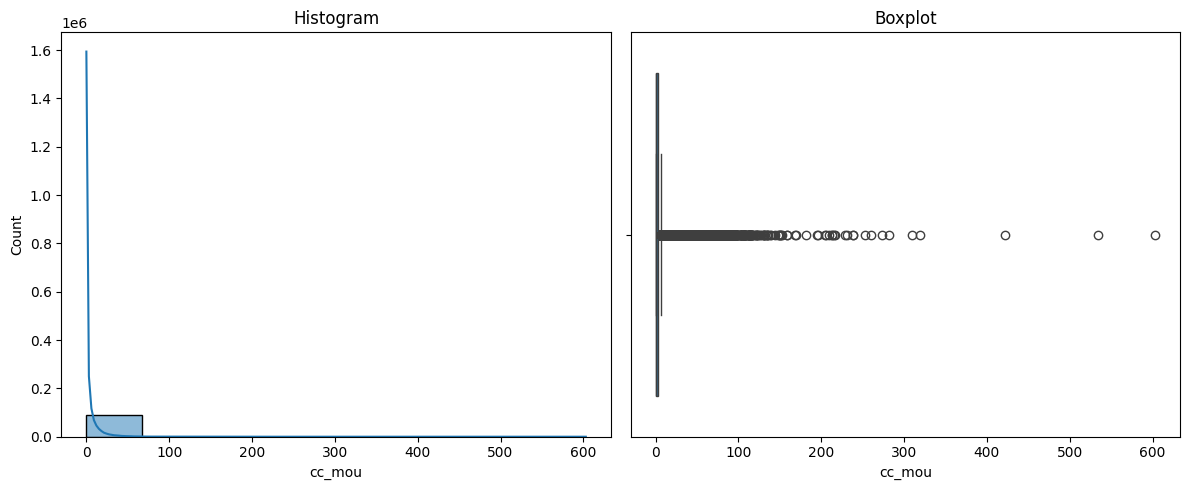

inonemin -  Mean number of inbound calls less than one minute


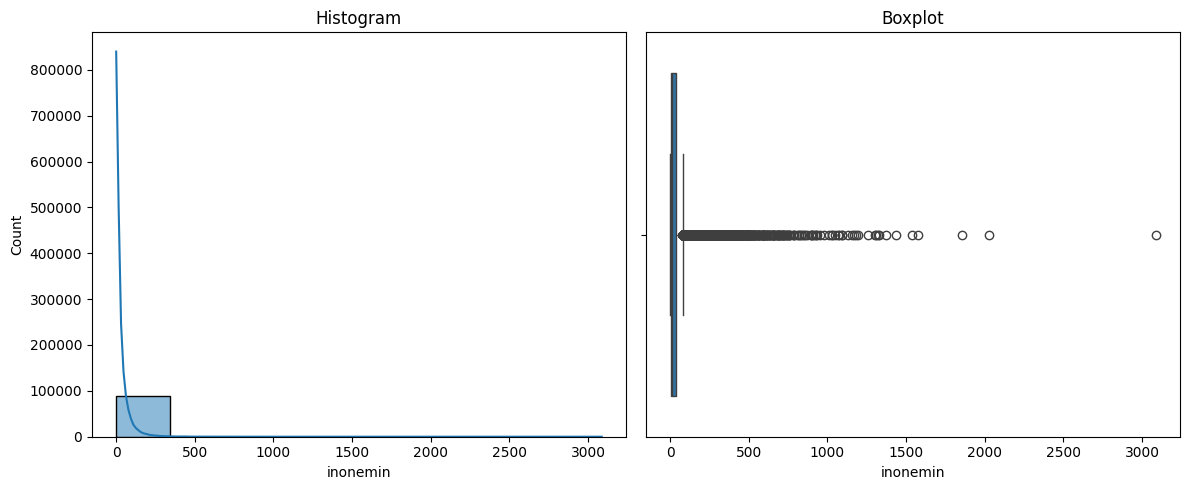

threeway -  Mean number of three way calls


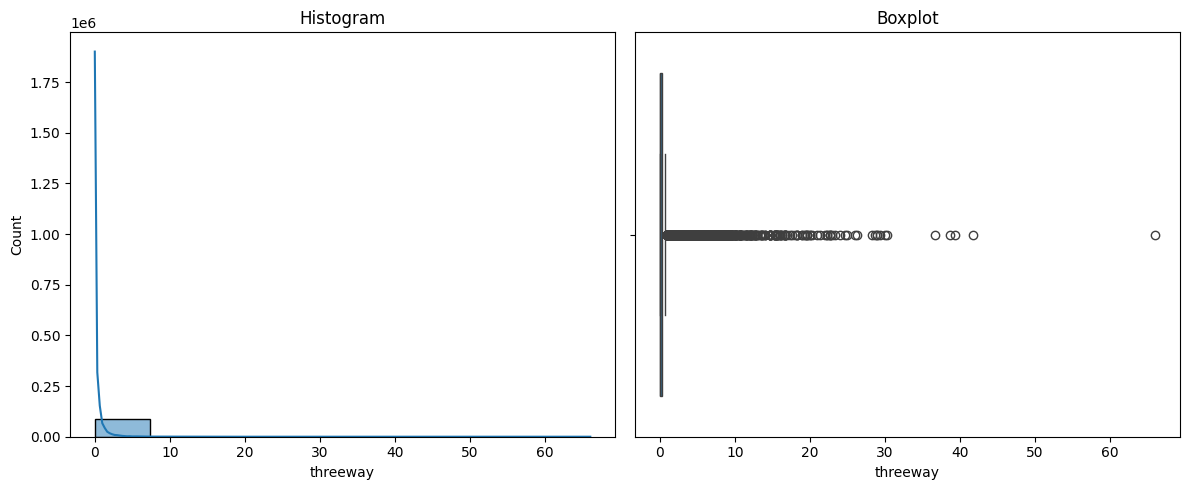

mou_cvce -  Mean unrounded minutes of use of completed voice calls


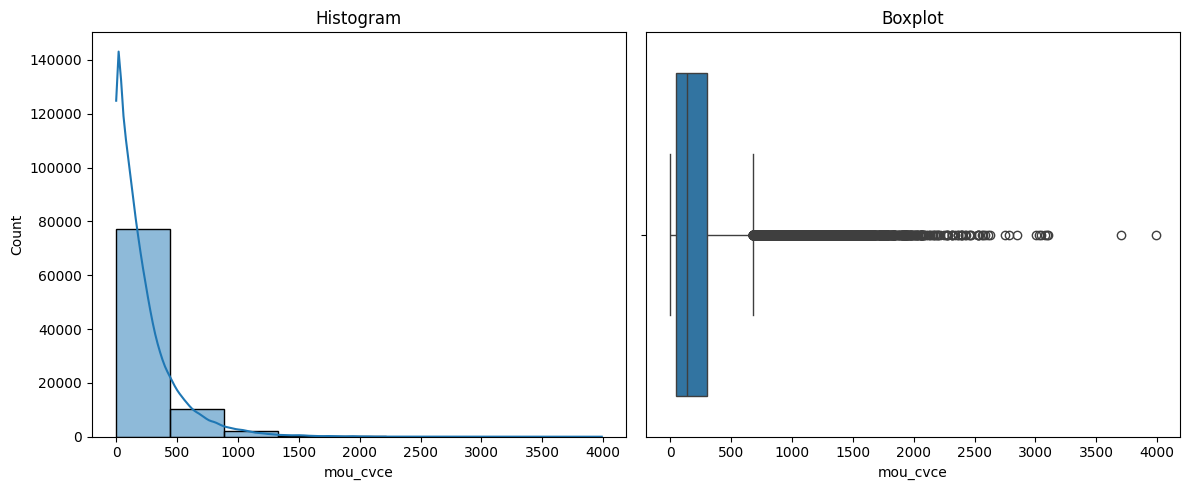

mou_cdat -  Mean unrounded minutes of use of completed data calls


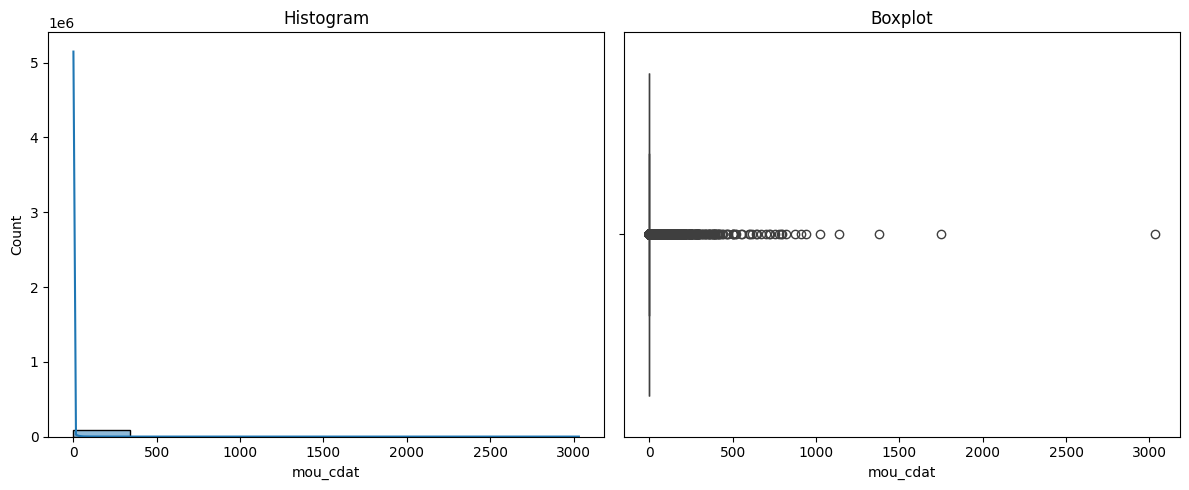

mou_rvce -  Mean unrounded minutes of use of received voice calls


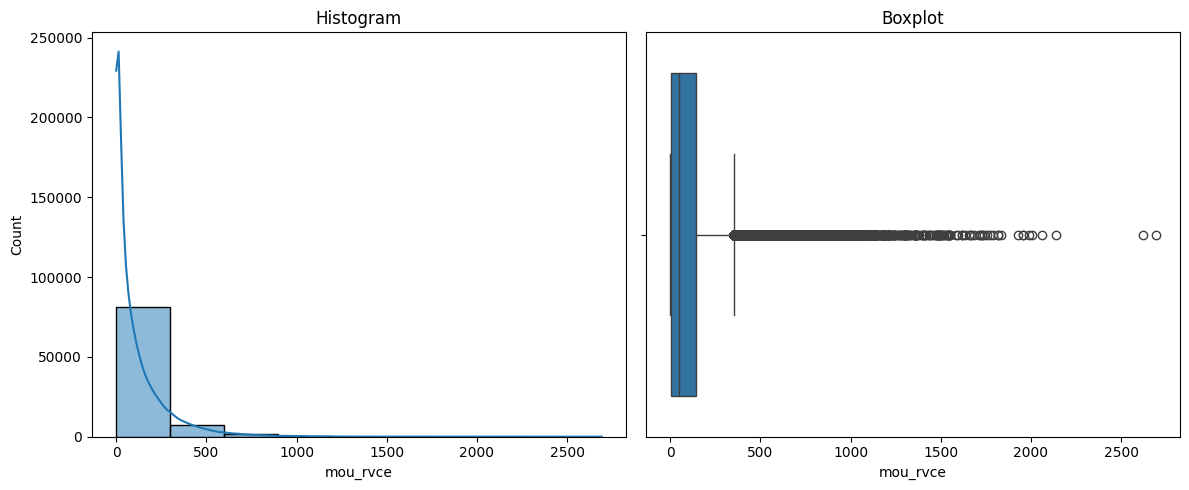

owylis_vce -  Mean number of outbound wireless to wireless voice calls


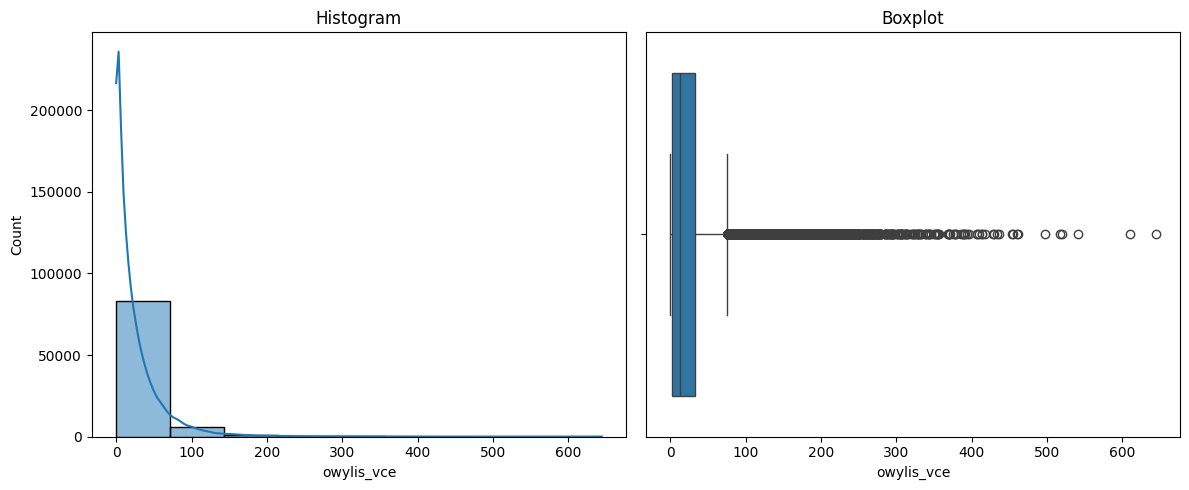

mouowylisv -  Mean unrounded minutes of use of outbound wireless to wireless voice calls


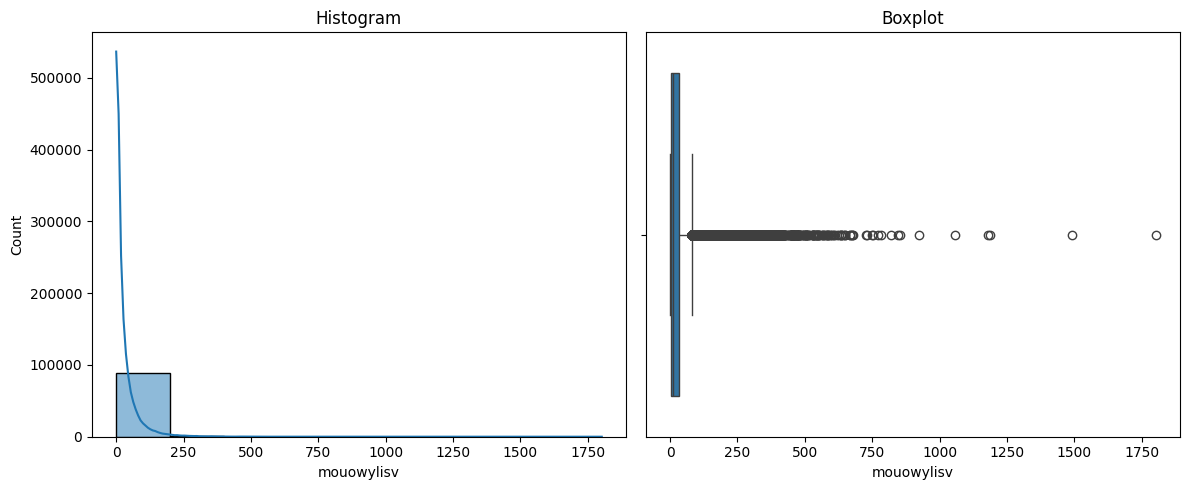

iwylis_vce -  Mean number of inbound wireless to wireless voice calls


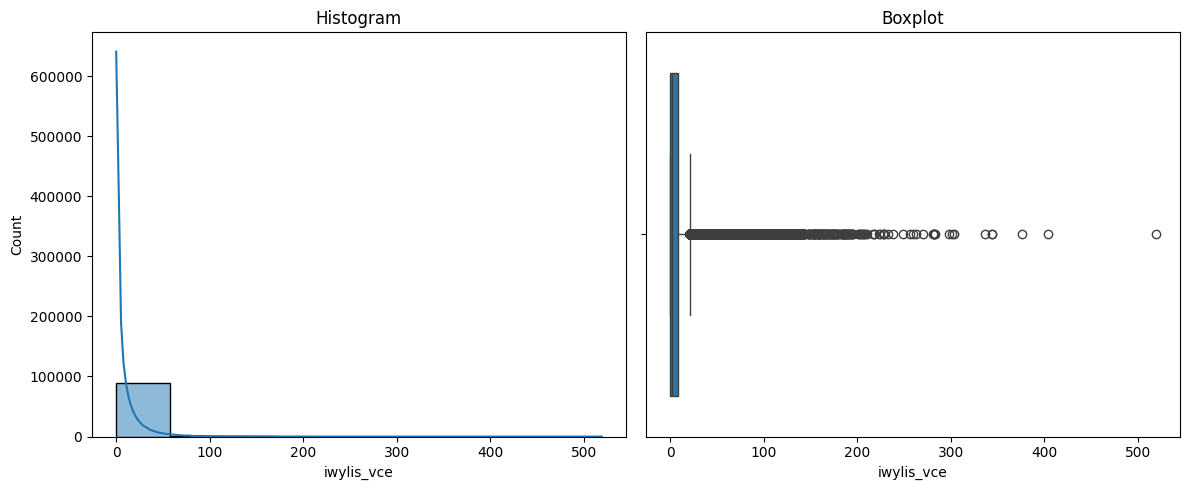

mouiwylisv -  Mean unrounded minutes of use of inbound wireless to wireless voice calls


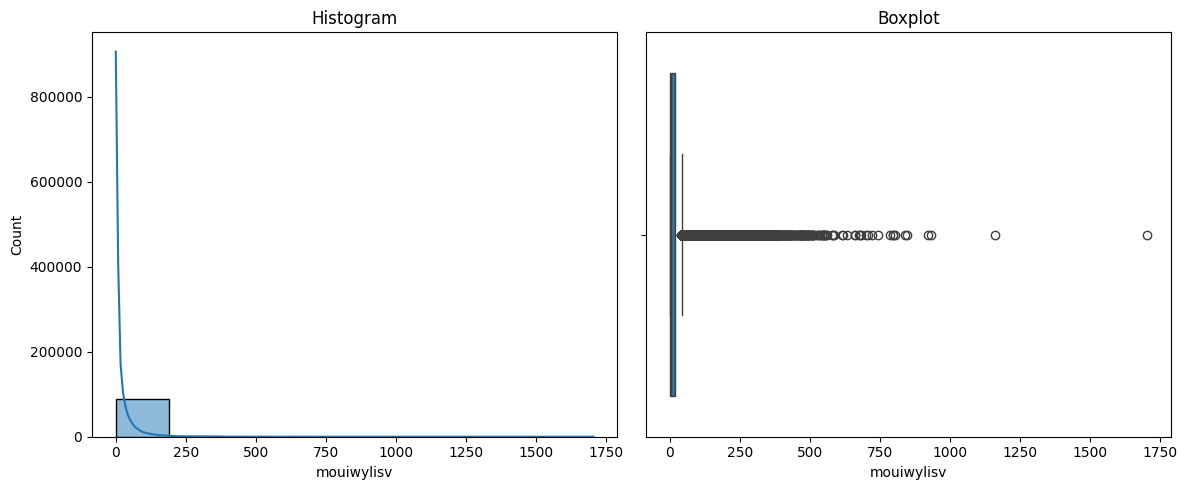

peak_vce -  Mean number of inbound and outbound peak voice calls


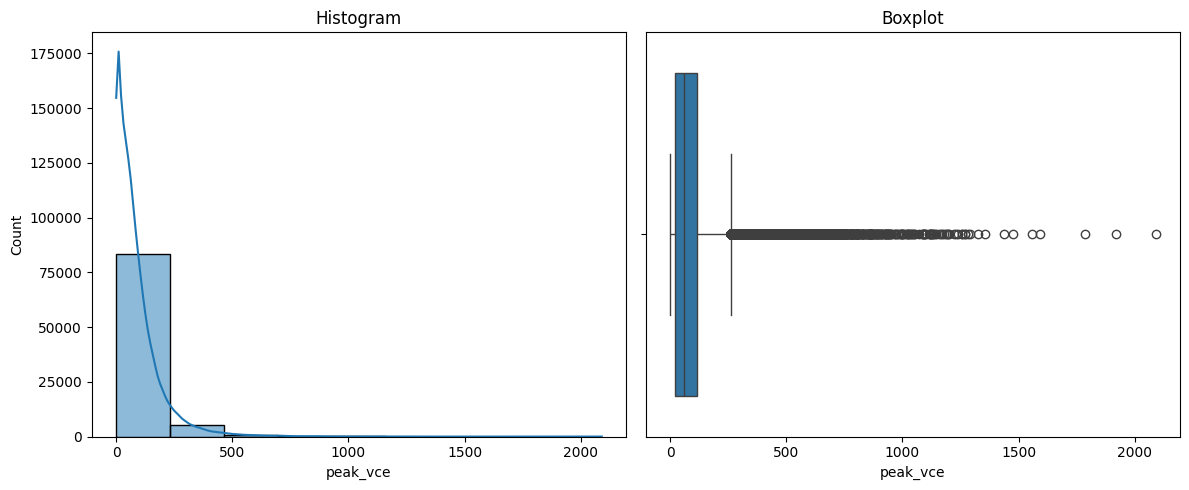

peak_dat -  Mean number of peak data calls


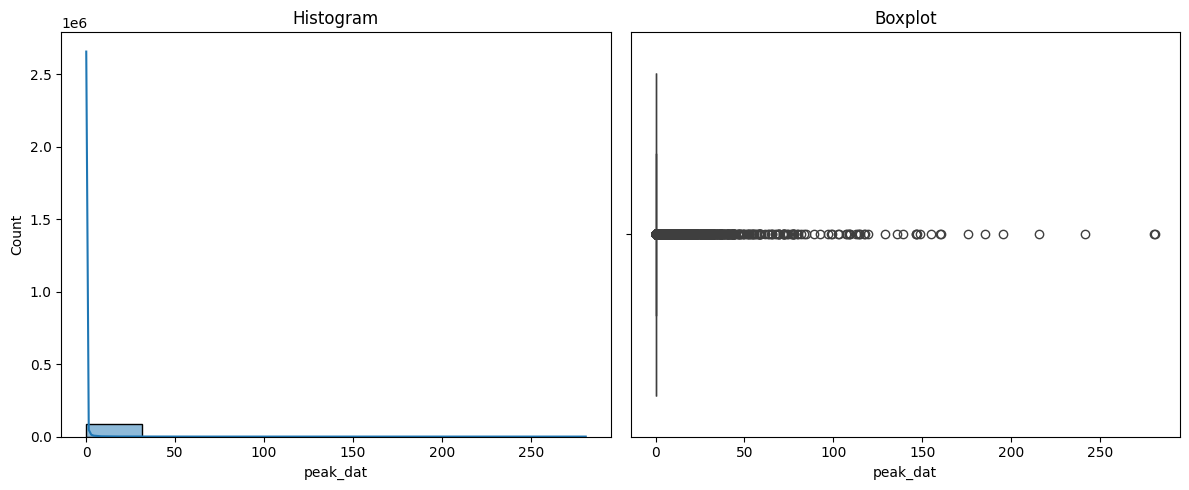

mou_peav -  Mean unrounded minutes of use of peak voice calls


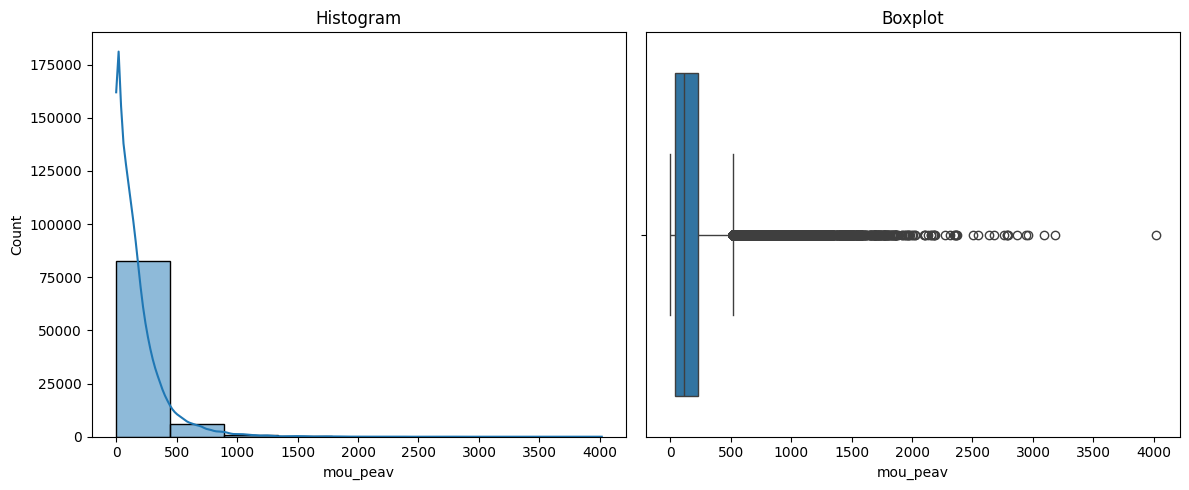

mou_pead -  Mean unrounded minutes of use of peak data calls


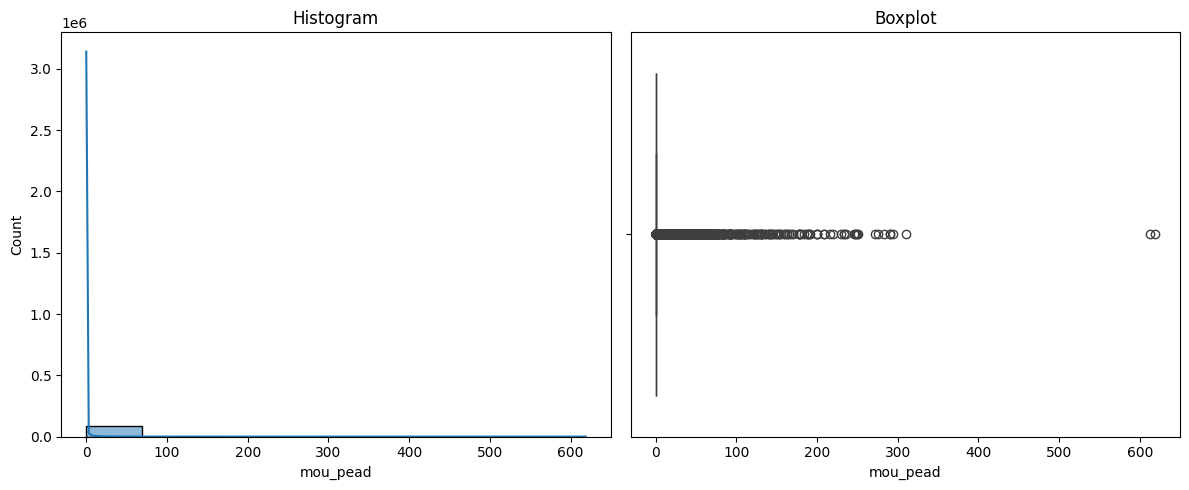

opk_vce -  Mean number of off-peak voice calls


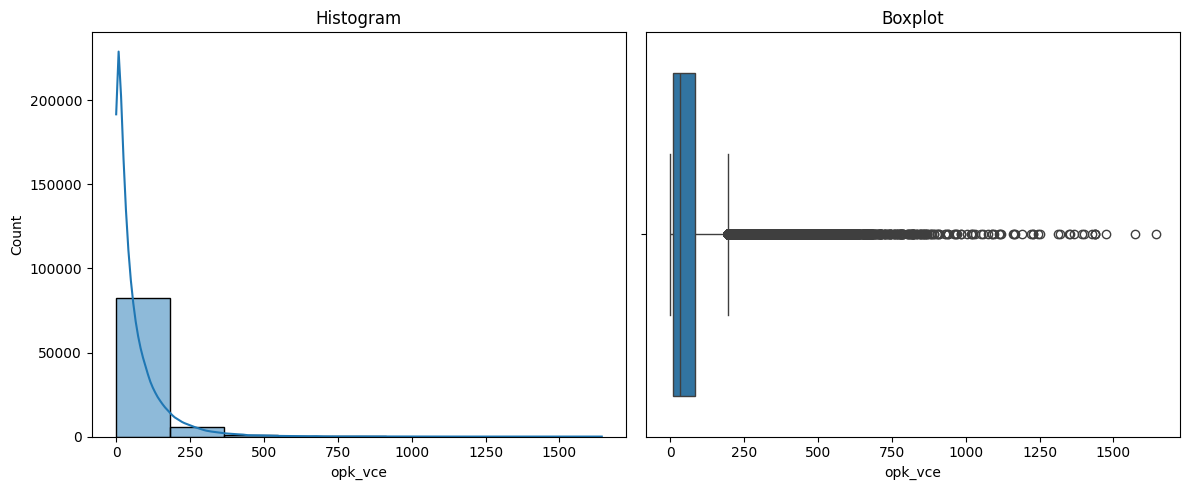

opk_dat -  Mean number of off-peak data calls


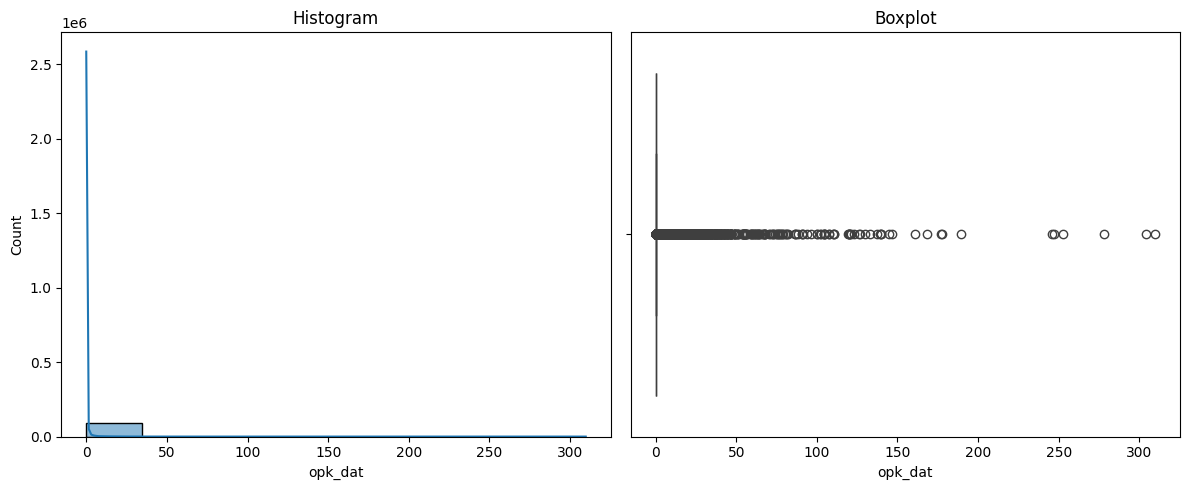

mou_opkv -  Mean unrounded minutes of use of off-peak voice calls


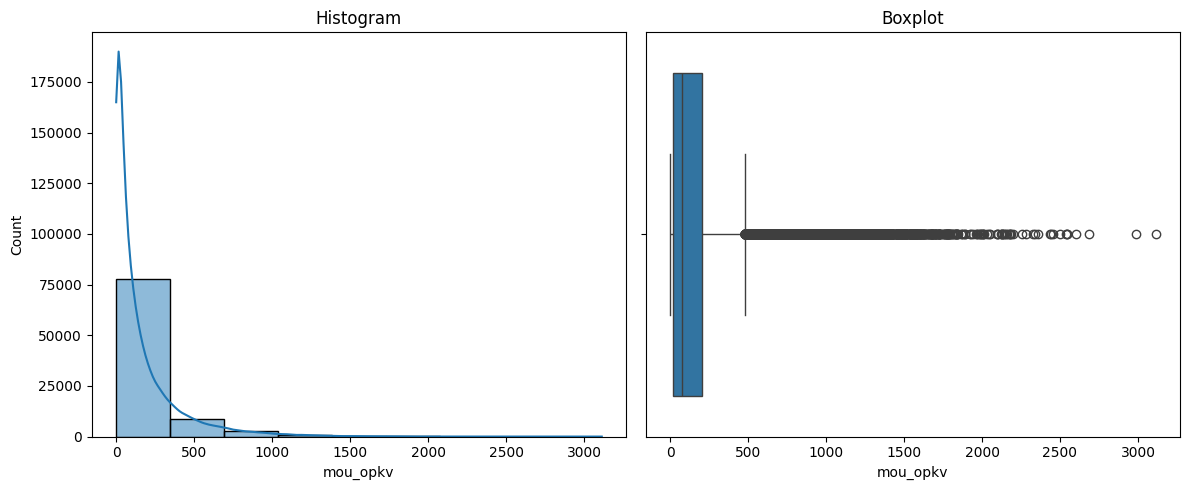

mou_opkd -  Mean unrounded minutes of use of off-peak data calls


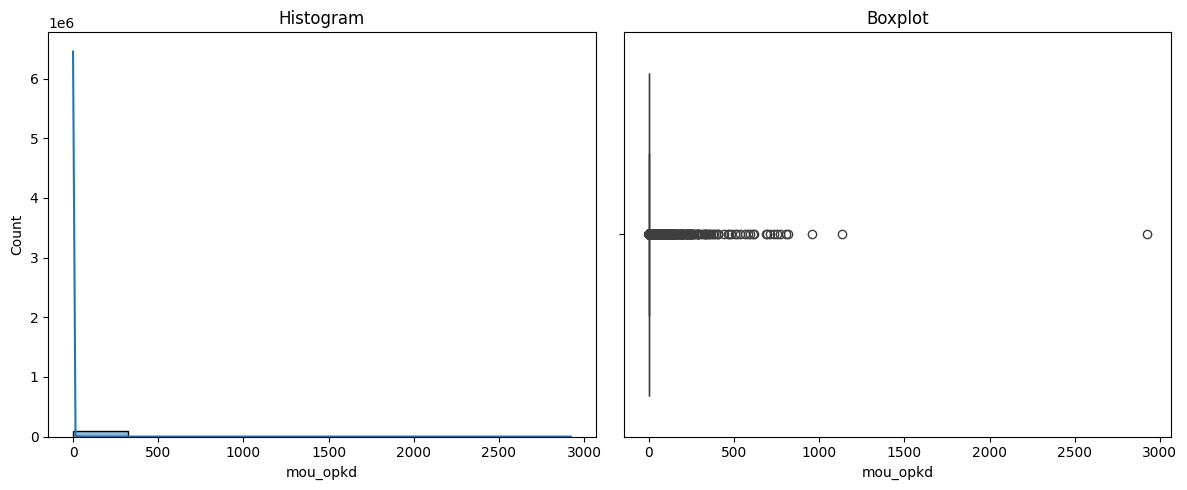

drop_blk -  Mean number of dropped or blocked calls


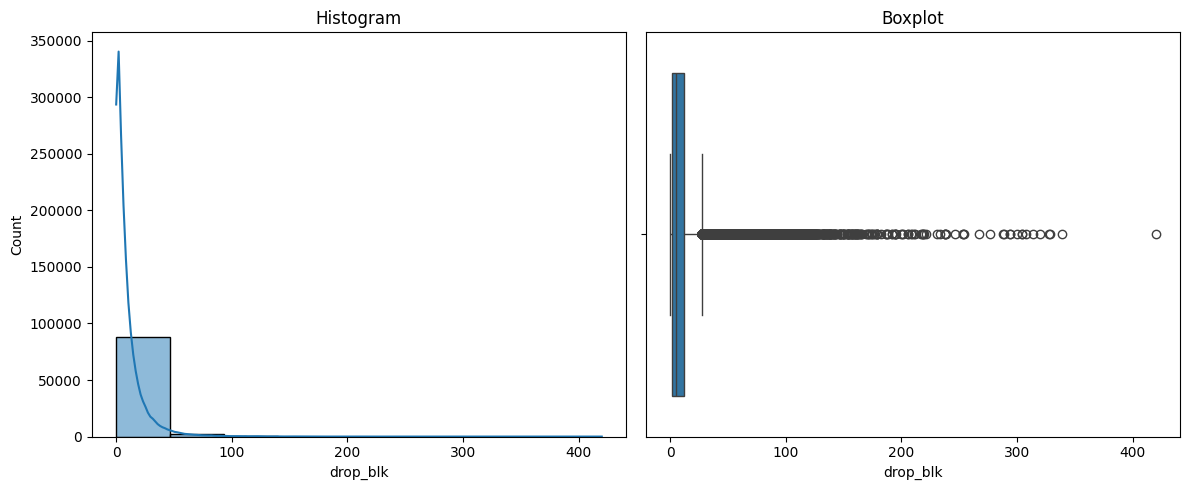

attempt -  Mean number of attempted calls


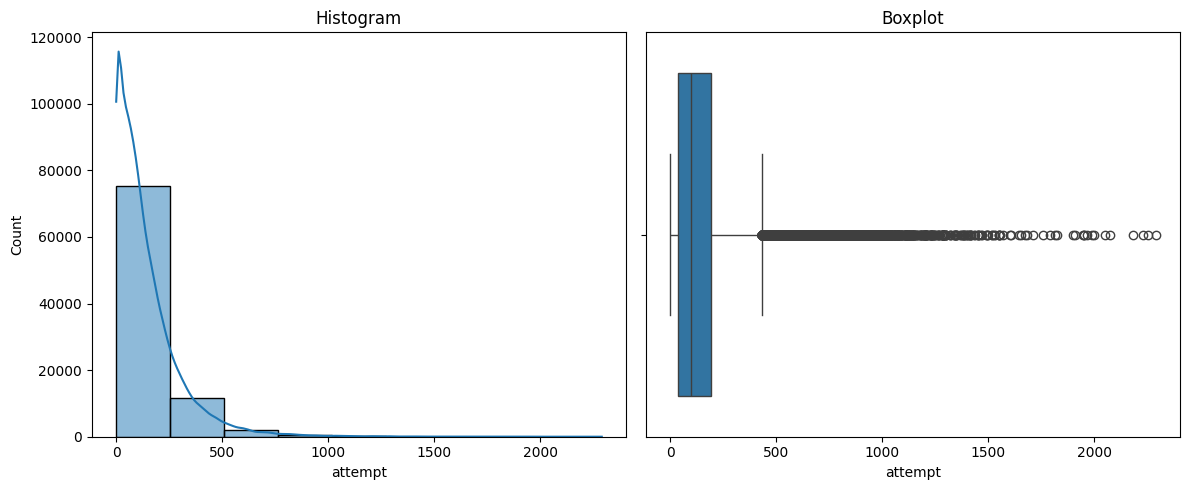

complete -  Mean number of completed calls


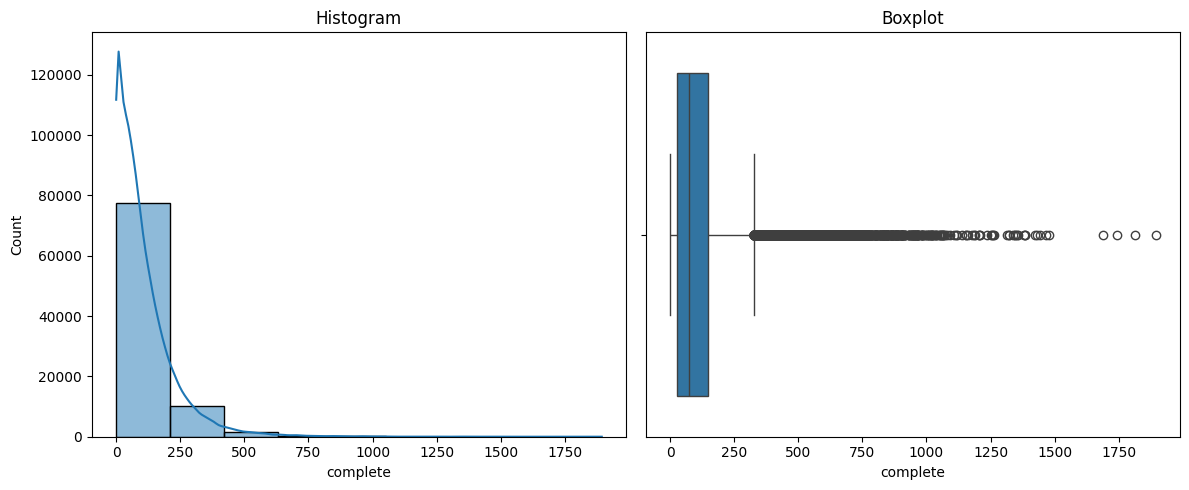

callfwdv -  Mean number of call forwarding calls


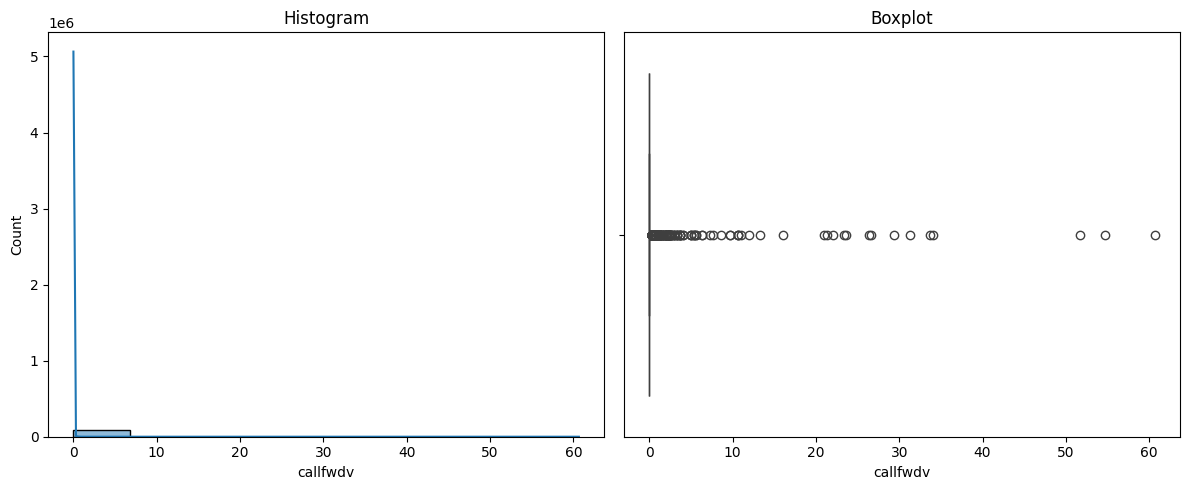

callwait -  Mean number of call waiting calls


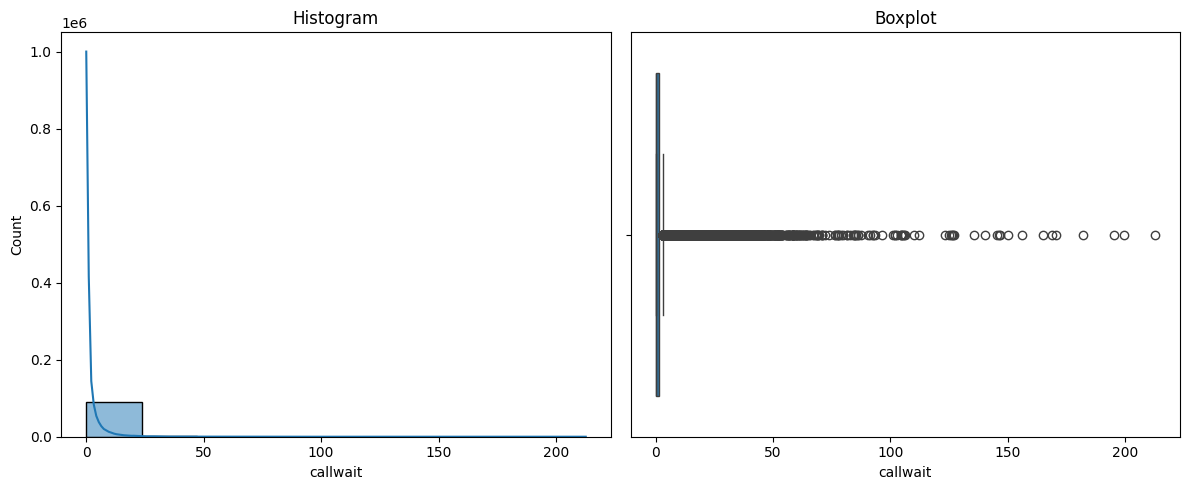

churn -  Instance of churn between 31-60 days after observation date


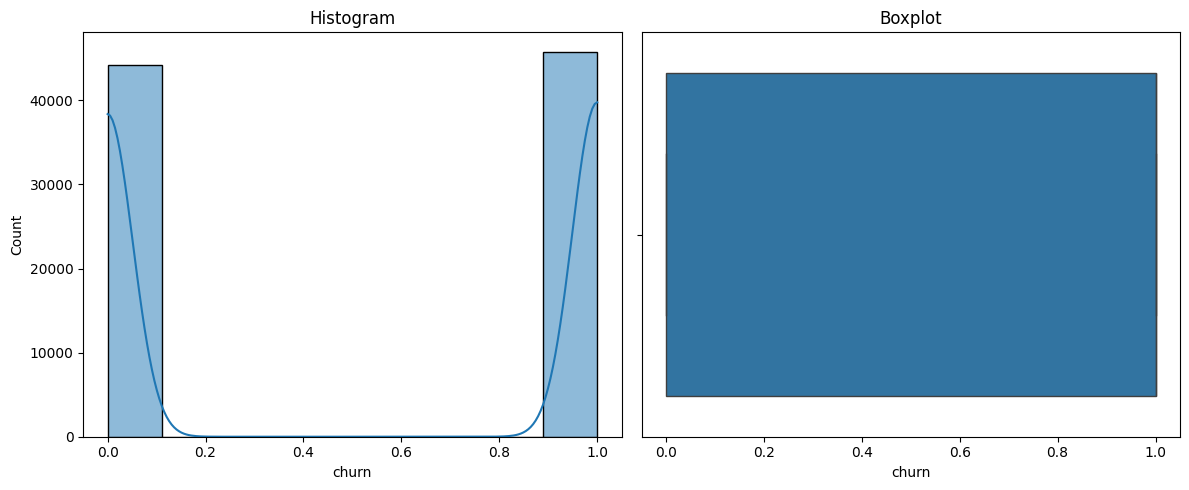

months -  Total number of months in service


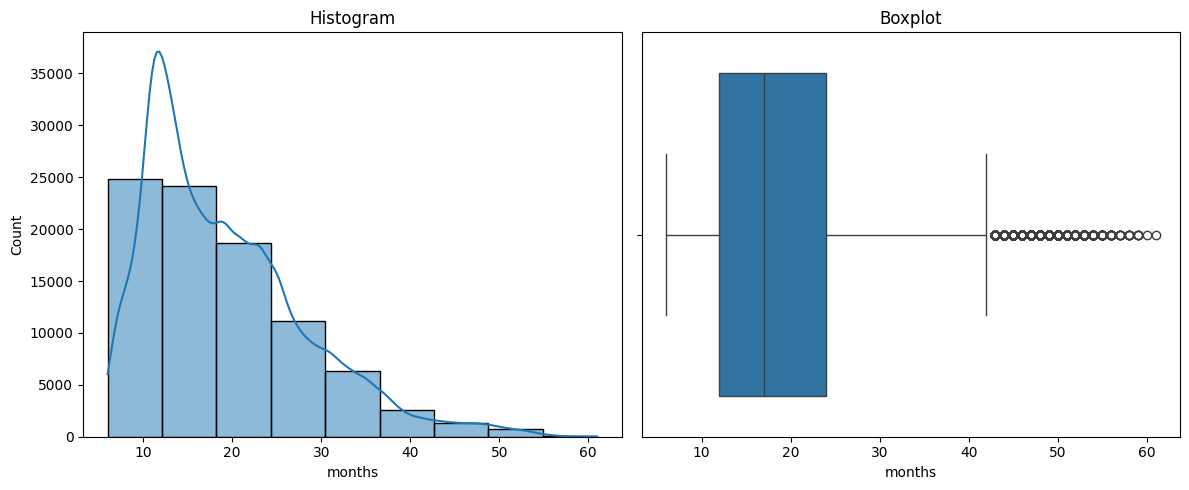

uniqsubs -  Number of unique subscribers in the household


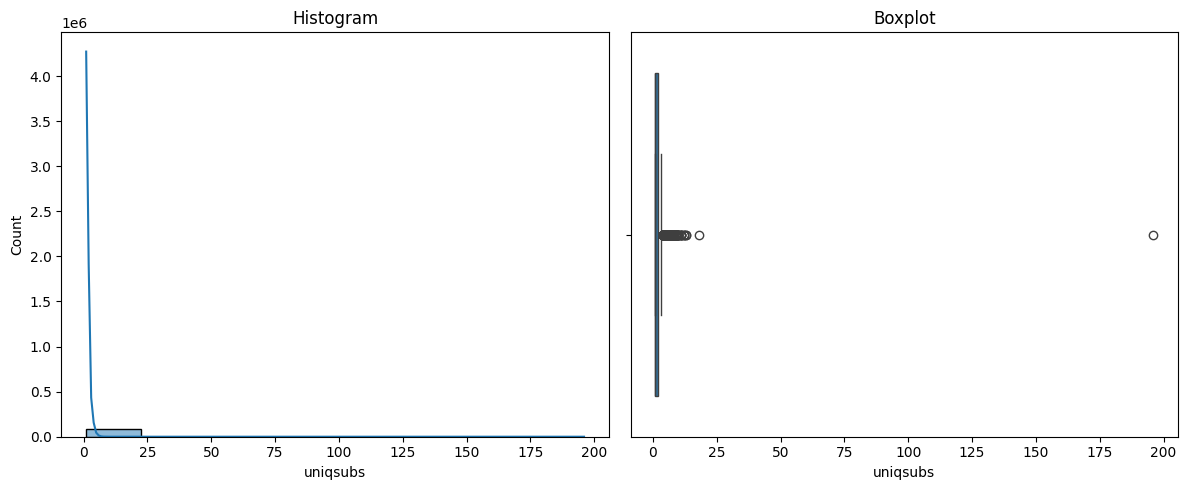

actvsubs -  Number of active subscribers in household


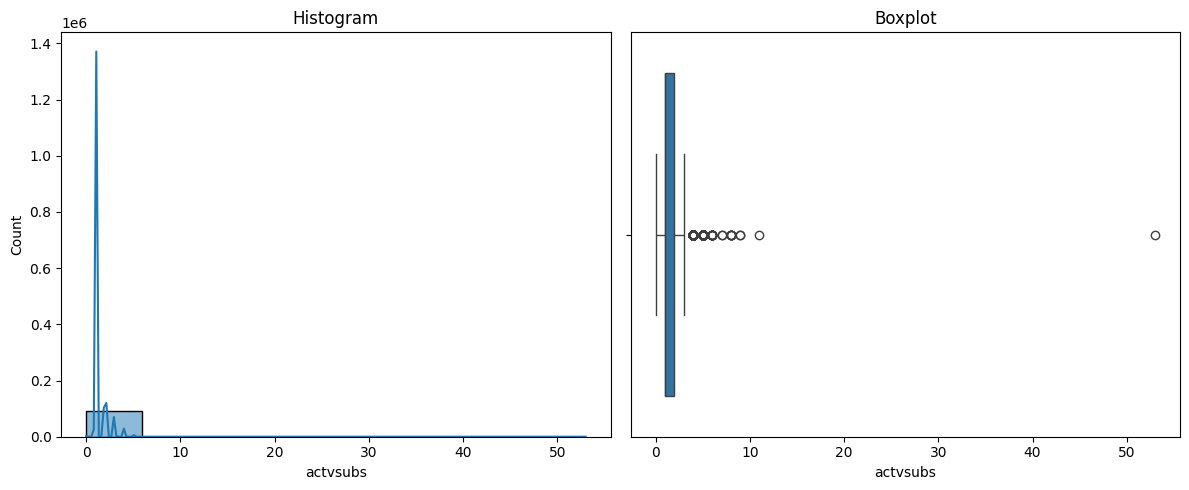

totcalls -  Total number of calls over the life of the customer


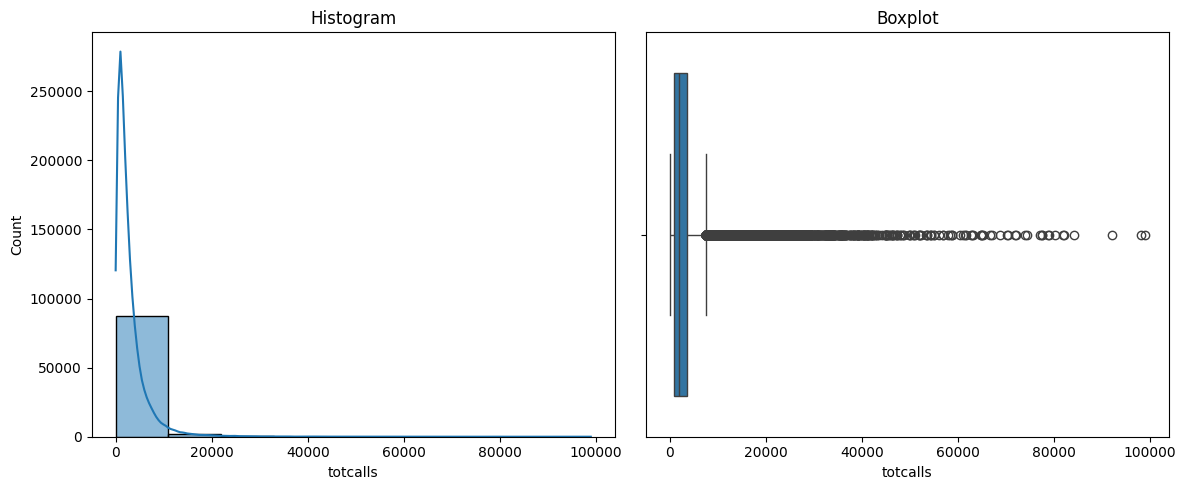

totmou -  Total minutes of use over the life of the cus


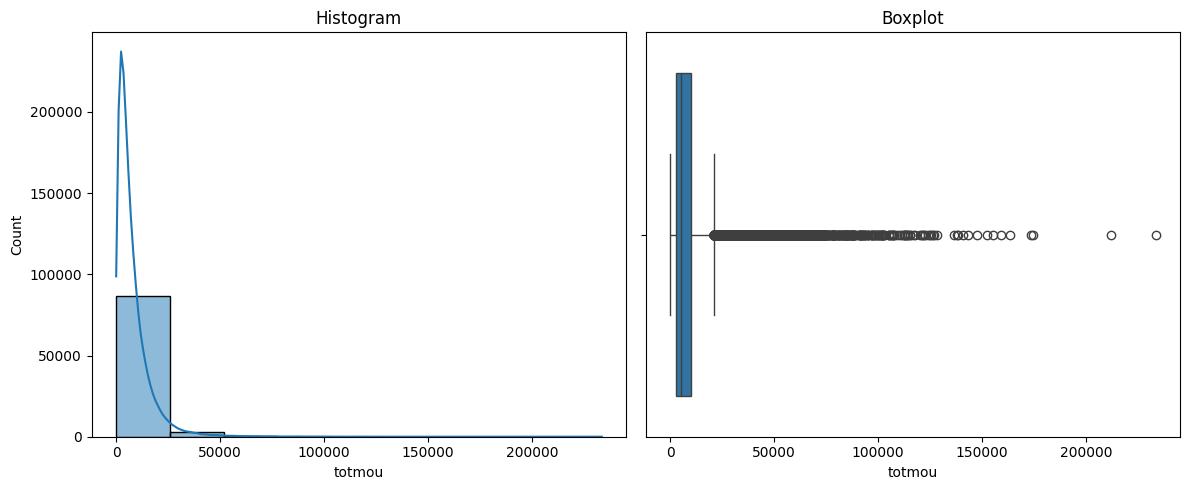

totrev -  Total revenue


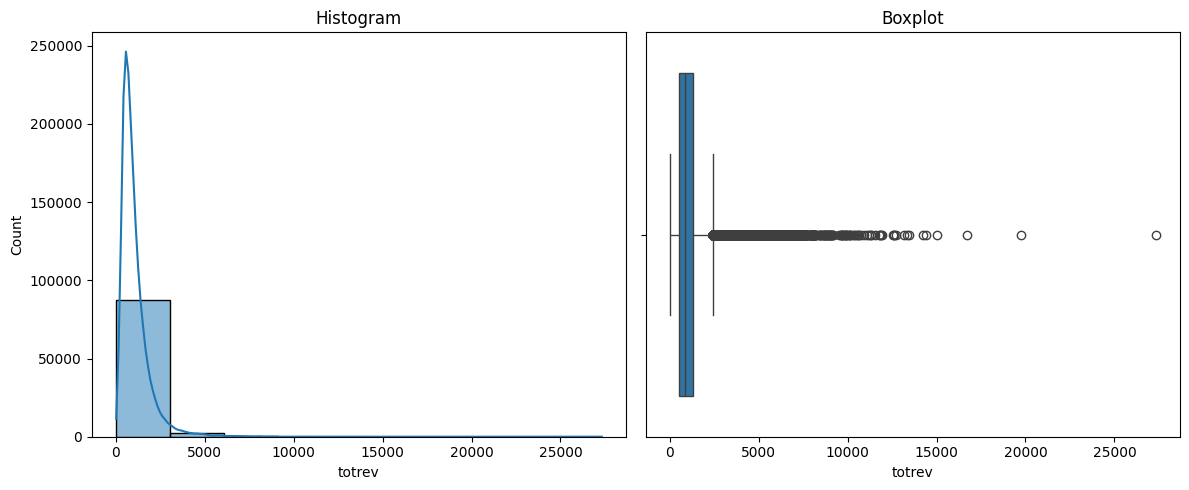

adjrev -  Billing adjusted total revenue over the life of the customer


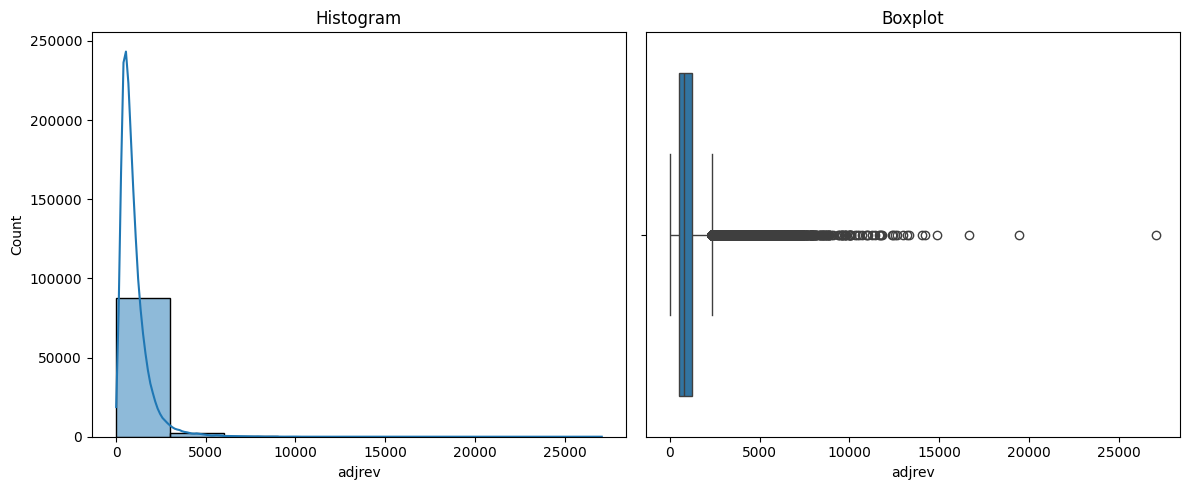

adjmou -  Billing adjusted total minutes of use over the life of the customer


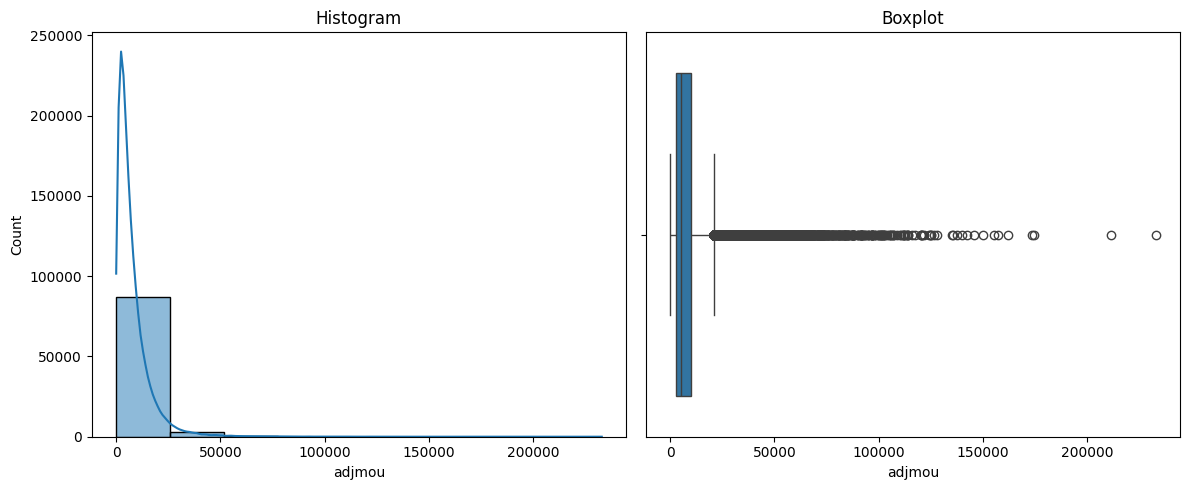

adjqty -  Billing adjusted total number of calls over the life of the customer


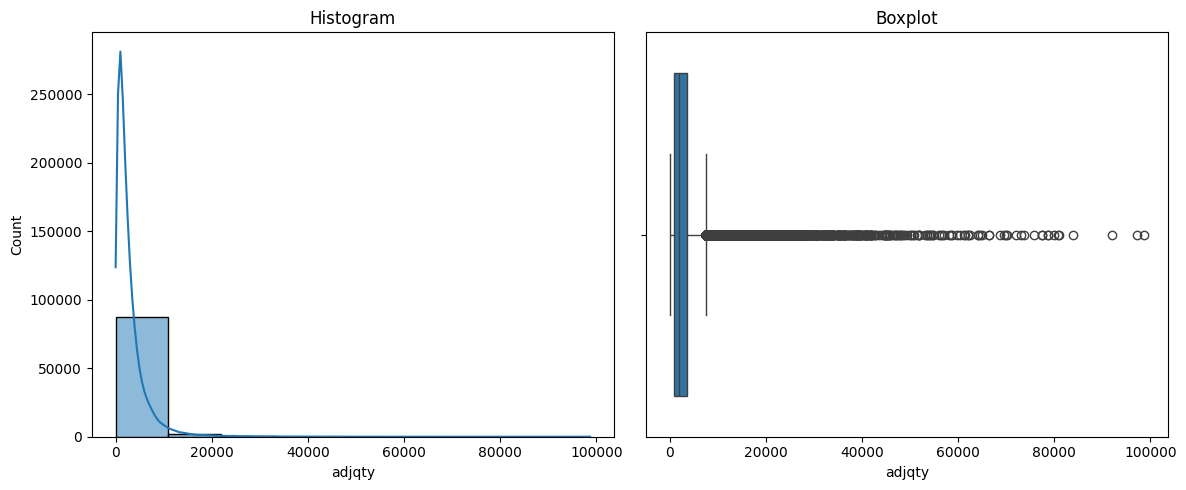

avgrev -  Average monthly revenue over the life of the customer


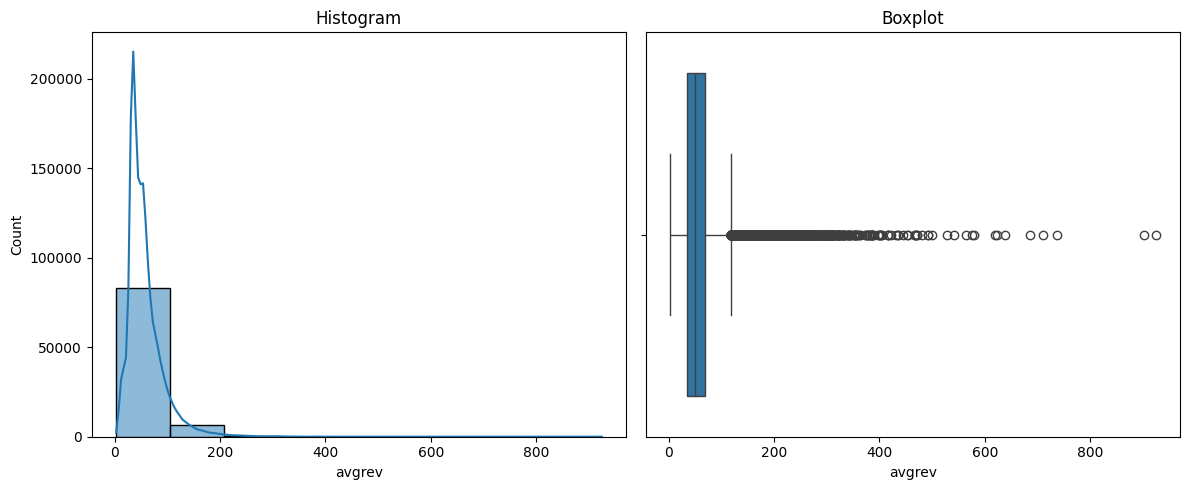

avgmou -  Average monthly minutes of use over the life of the customer


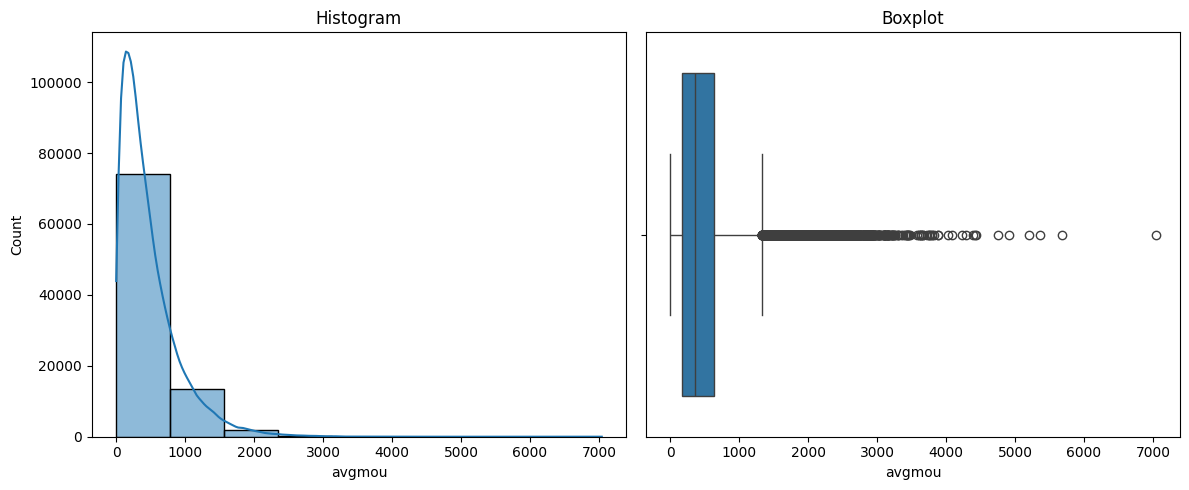

avgqty -  Average monthly number of calls over the life of the customer


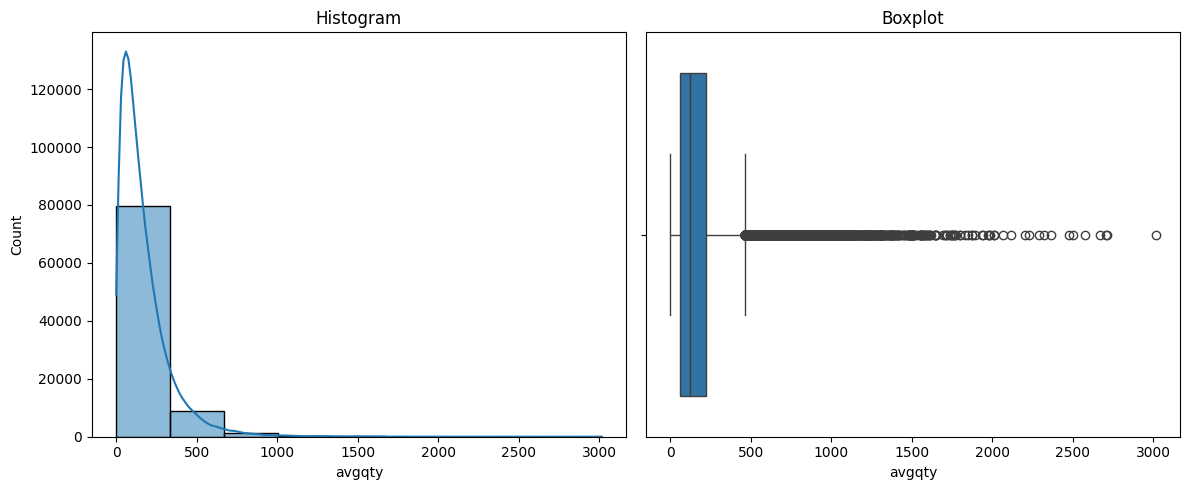

avg3mou -  Average monthly minutes of use over the previous three months


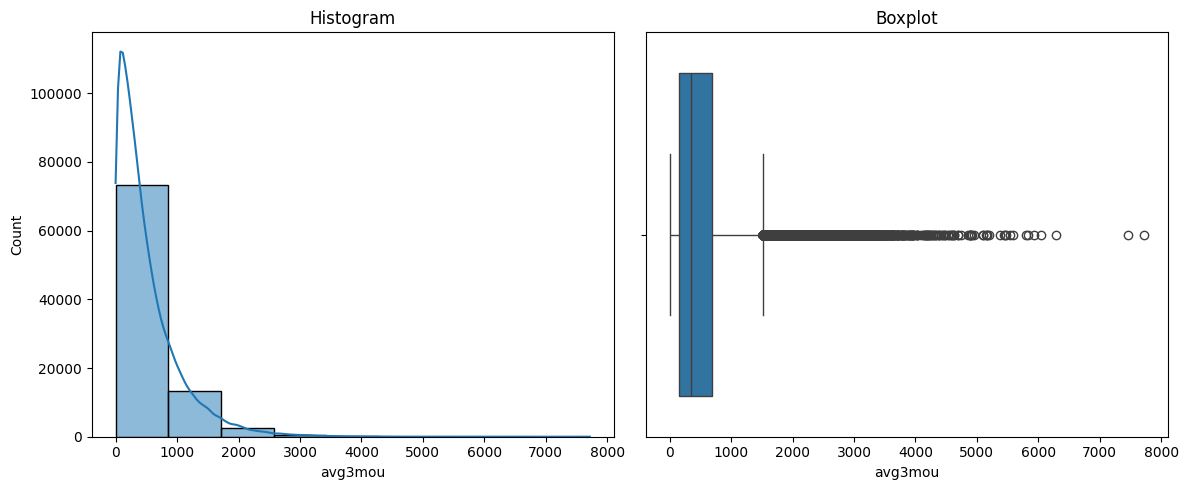

avg3qty -  Average monthly number of calls over the previous three months


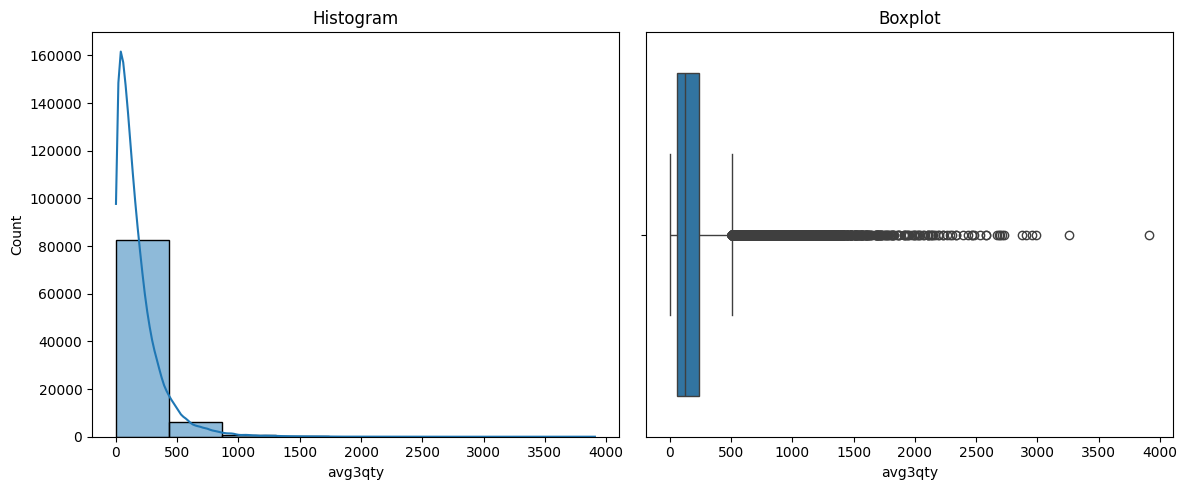

avg3rev -  Average monthly revenue over the previous three months


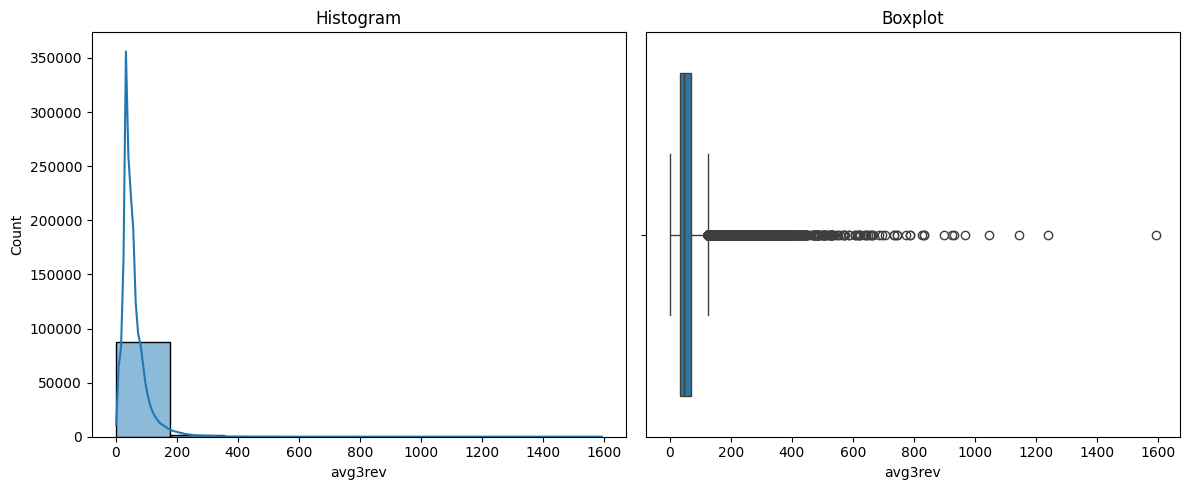

avg6mou -  Average monthly minutes of use over the previous six months


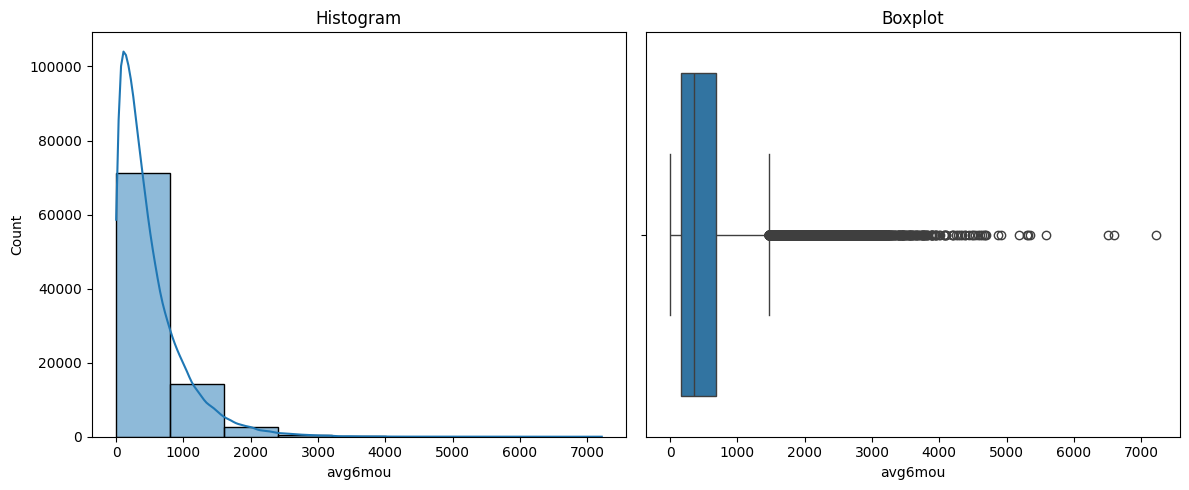

avg6qty -  Average monthly number of calls over the previous six months


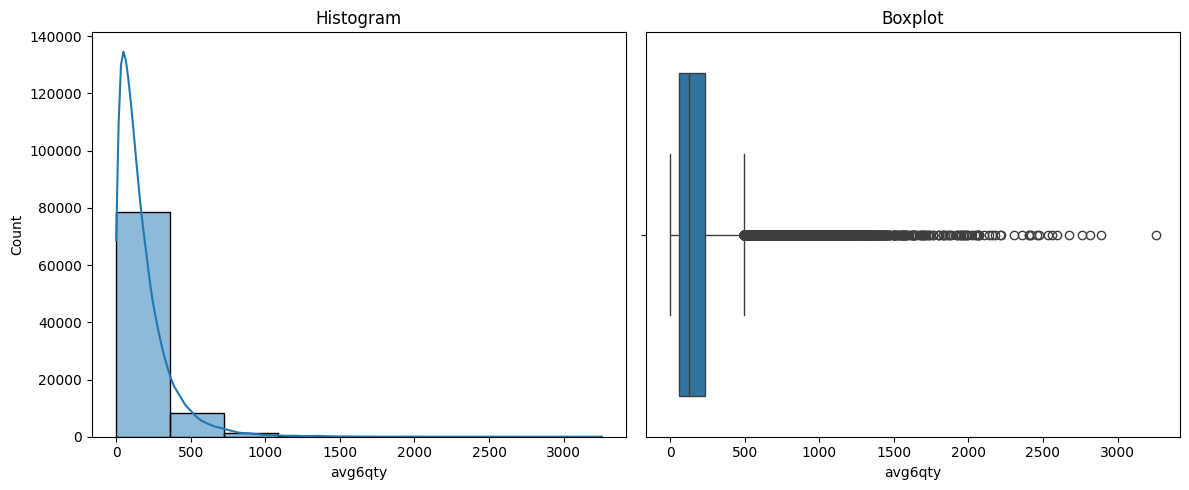

avg6rev -  Average monthly revenue over the previous six months


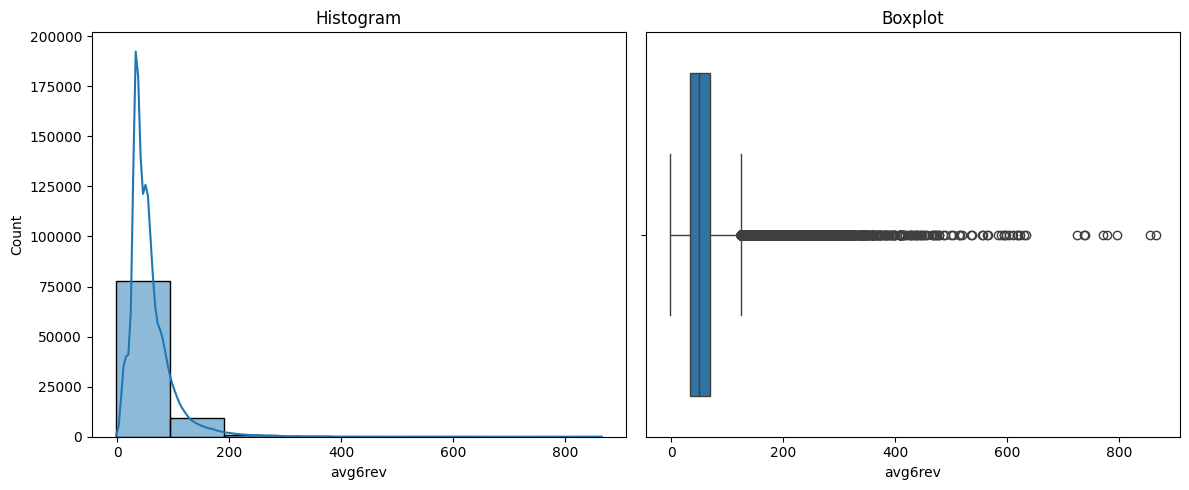

hnd_price -  Current handset price


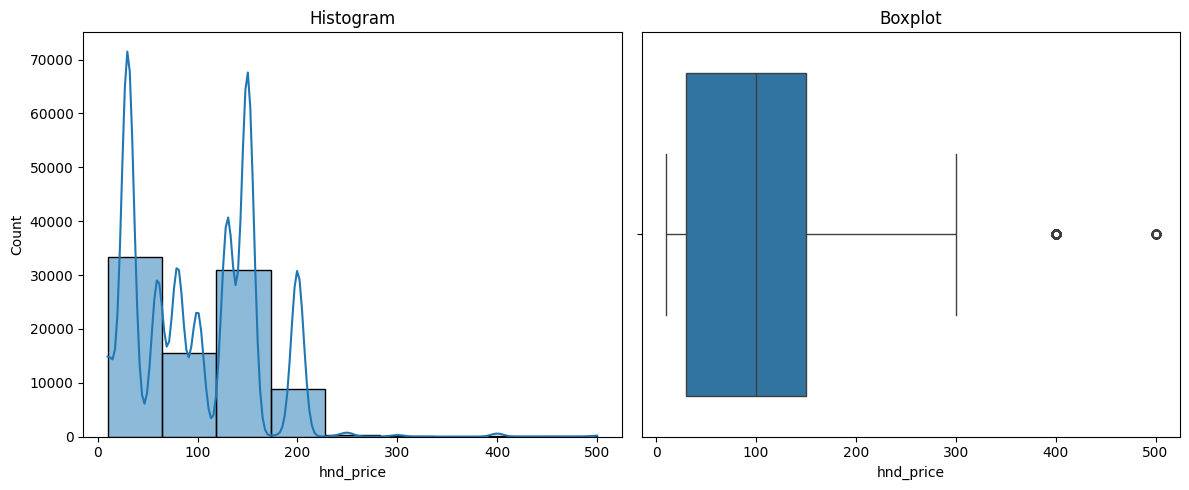

phones -  Number of handsets issued


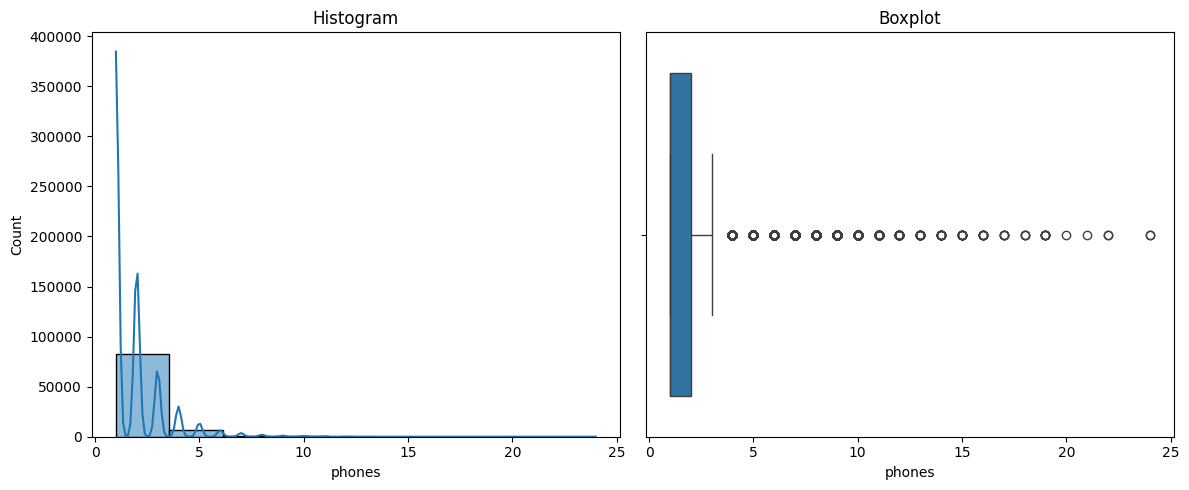

models -  Number of models issued


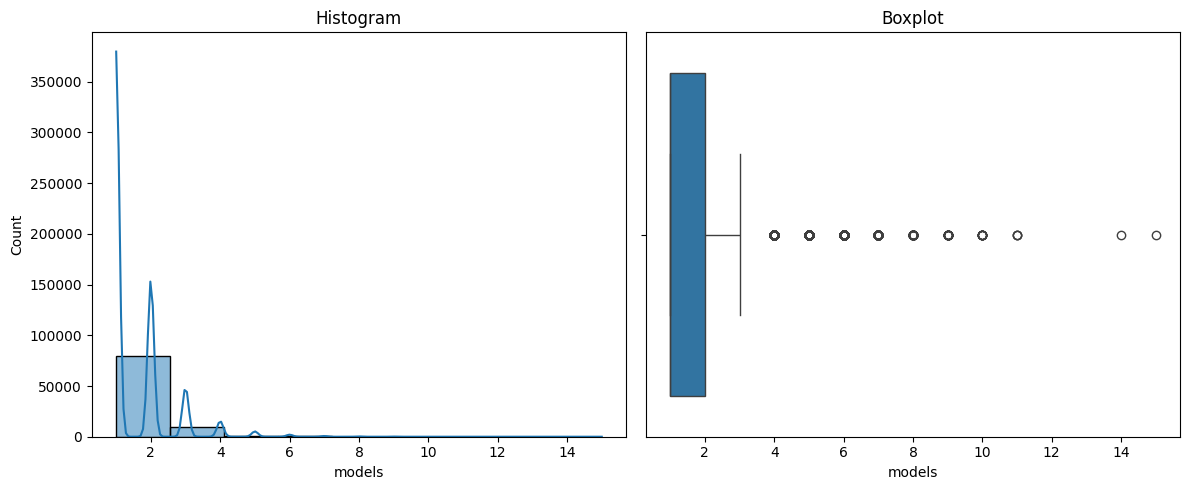

truck -  Truck indicator


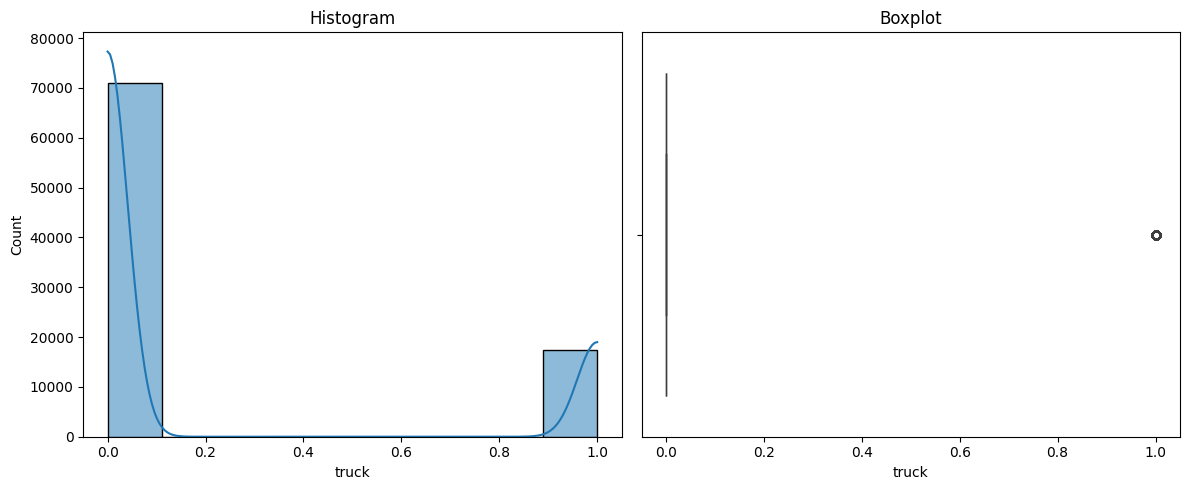

rv -  RV indicator


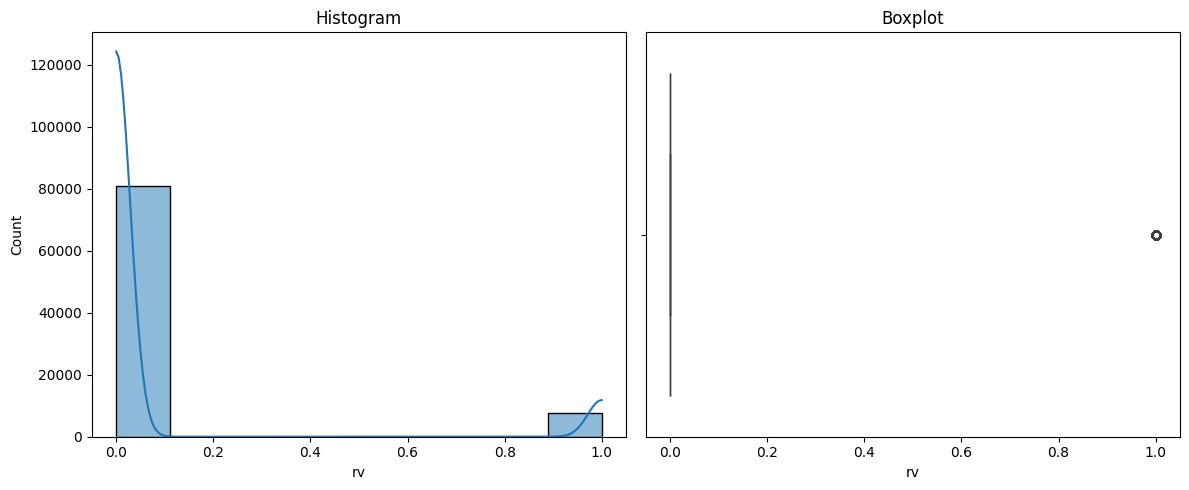

lor -  Length of residence


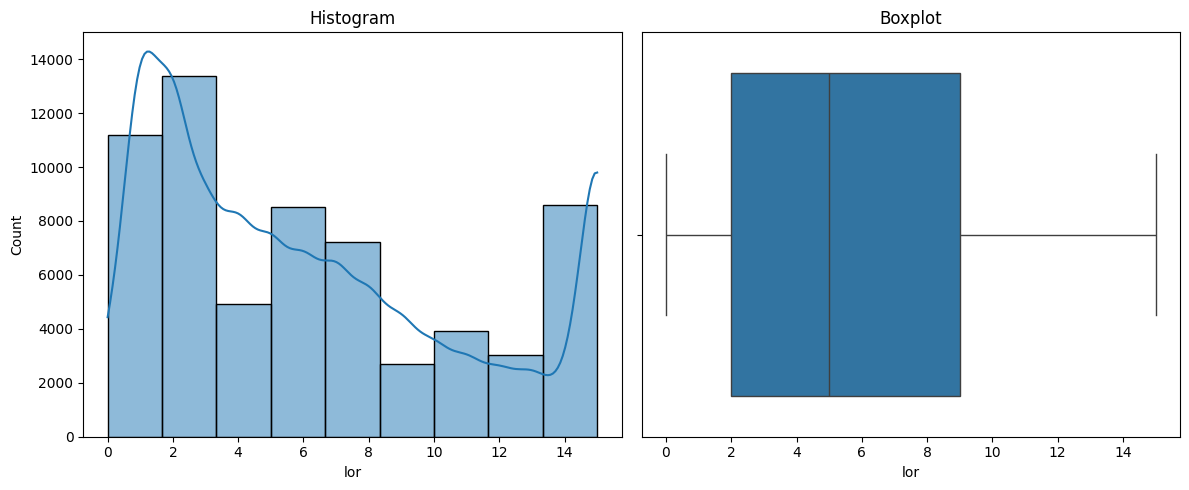

adults -  Number of adults in household


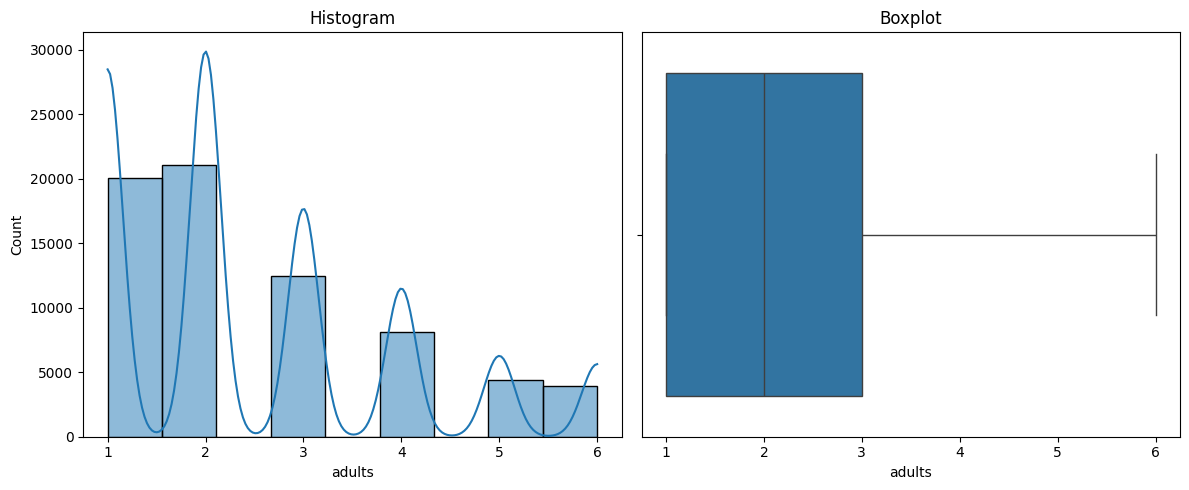

income -  Estimated income


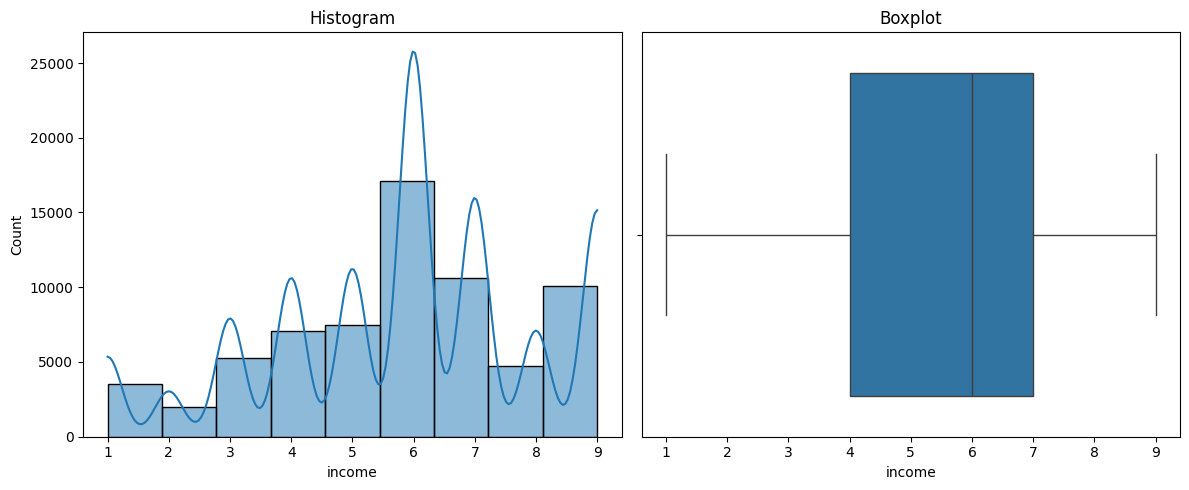

numbcars -  Known number of vehicles


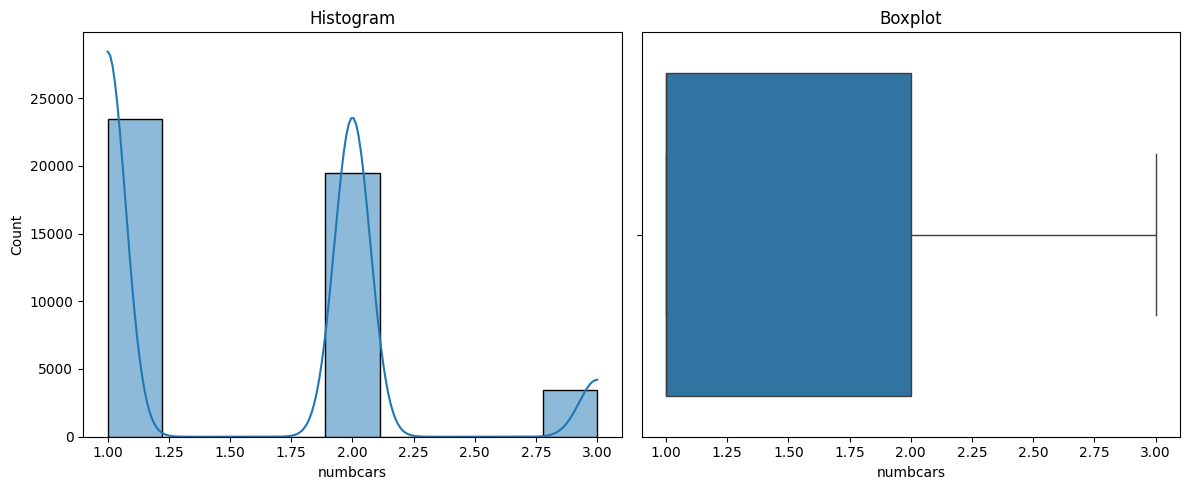

forgntvl -  Foreign travel dummy variable


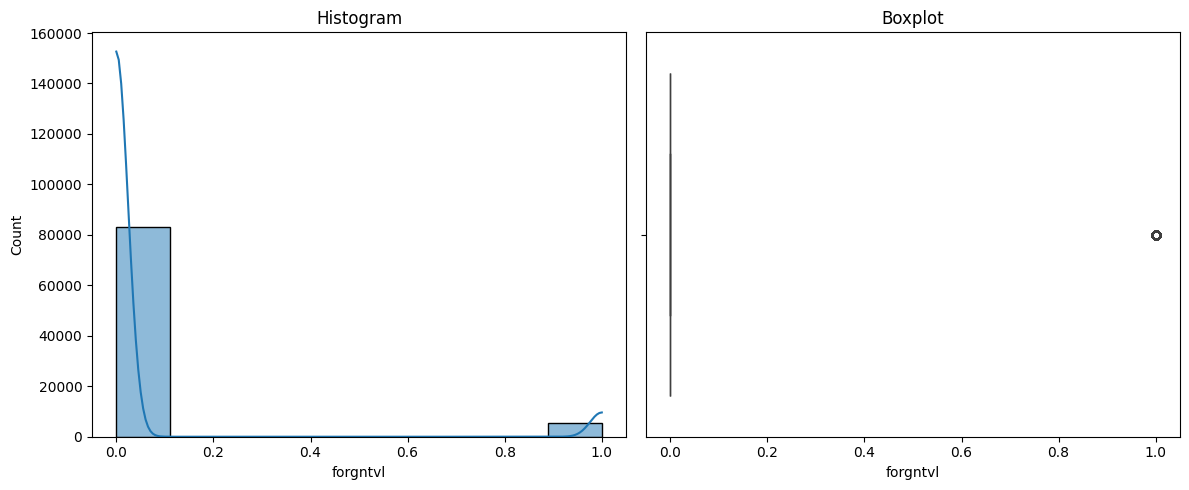

eqpdays -  Number of days (age) of current equipment


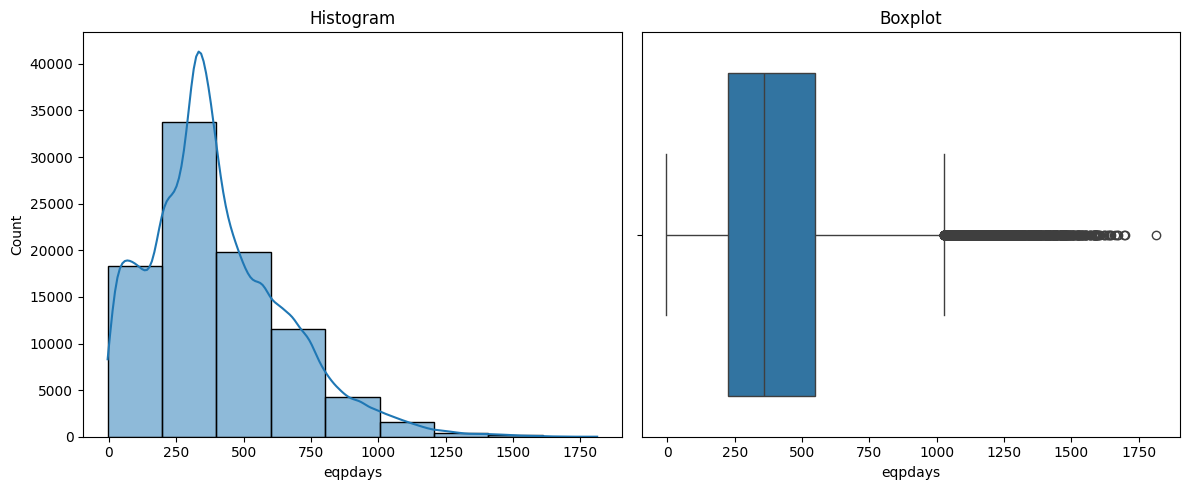

Customer_ID -  Customer ID (Primary key)


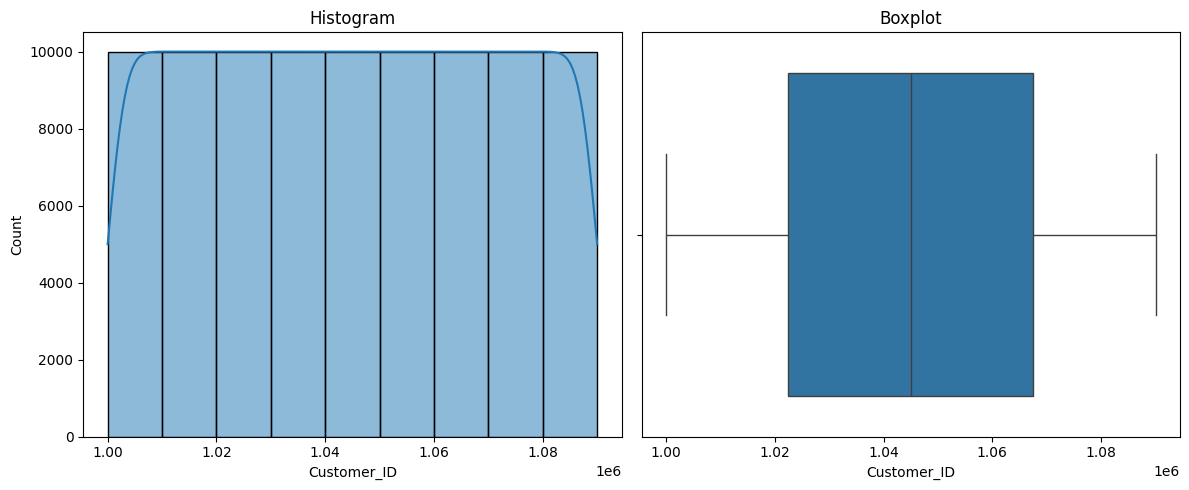

In [ ]:
num_data_dist(train, columns_dict)

##### Variables Categoricas

Cantidad de variables: 21



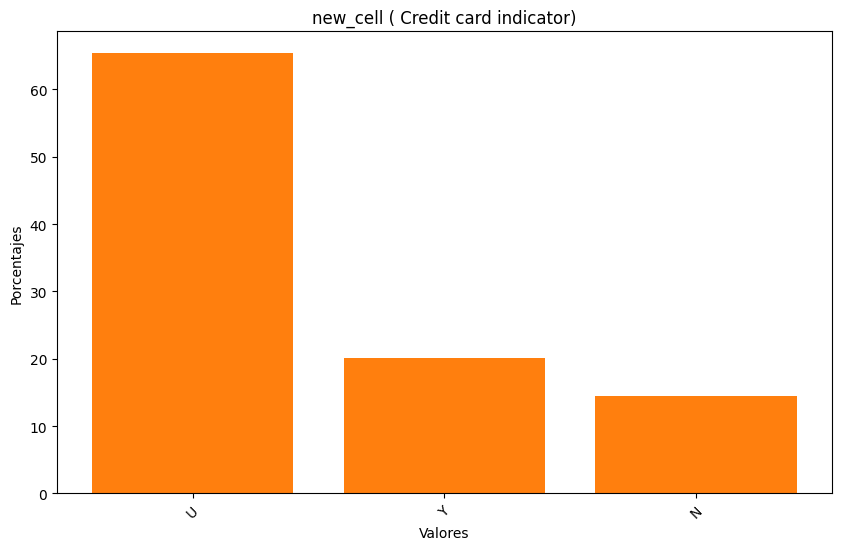

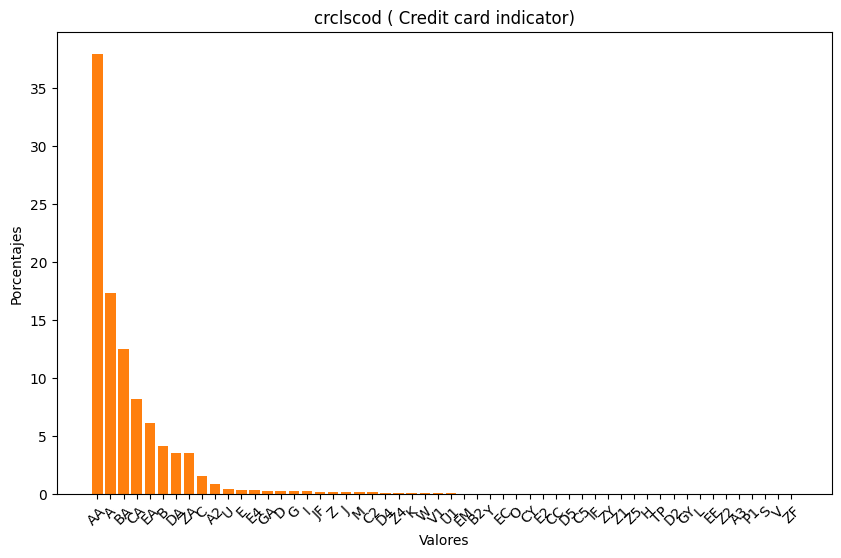

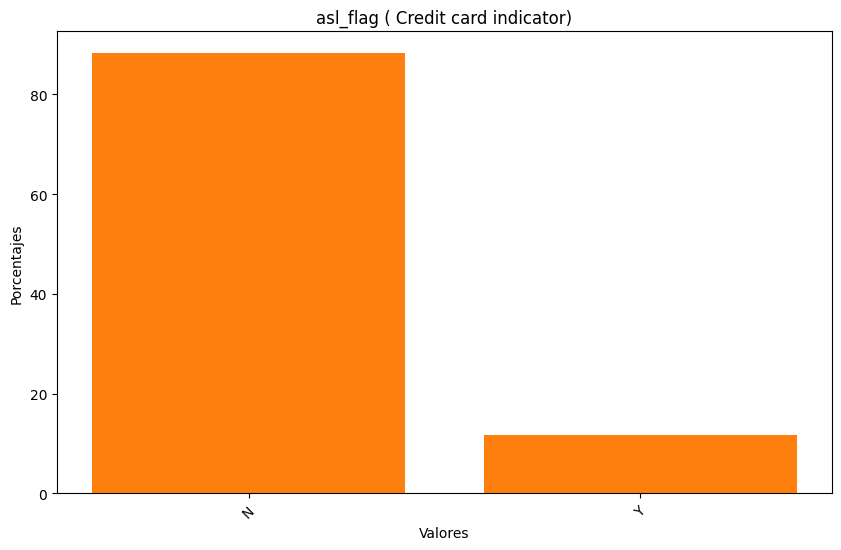

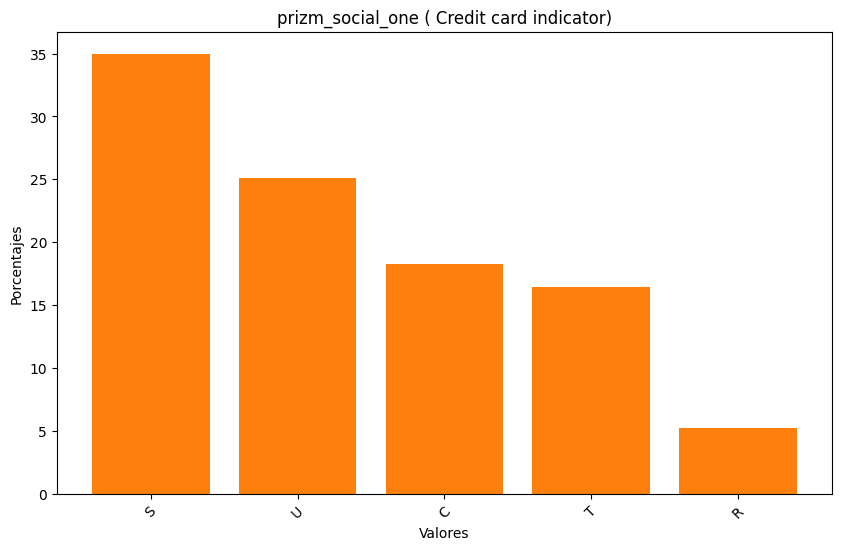

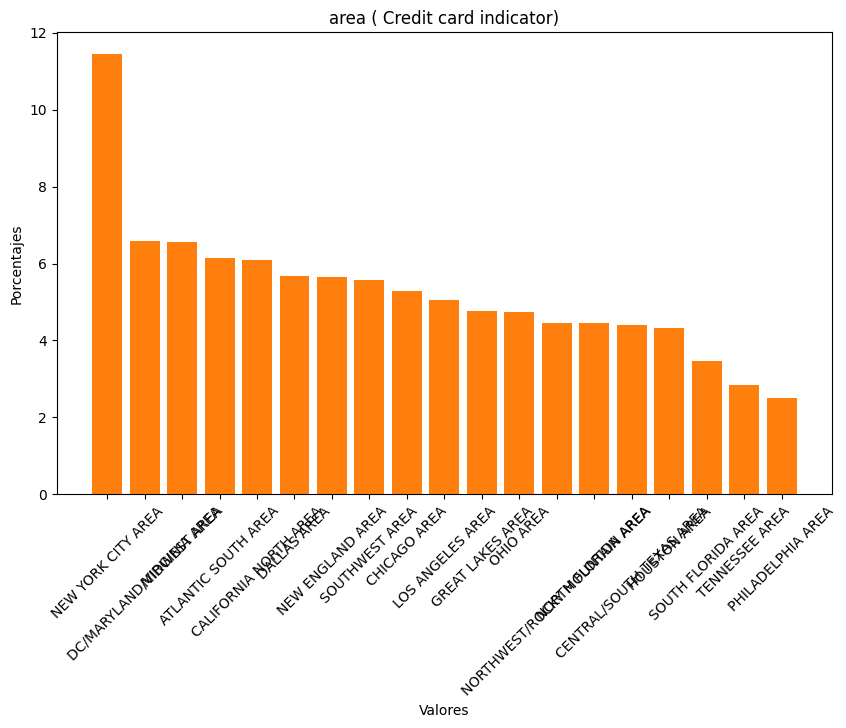

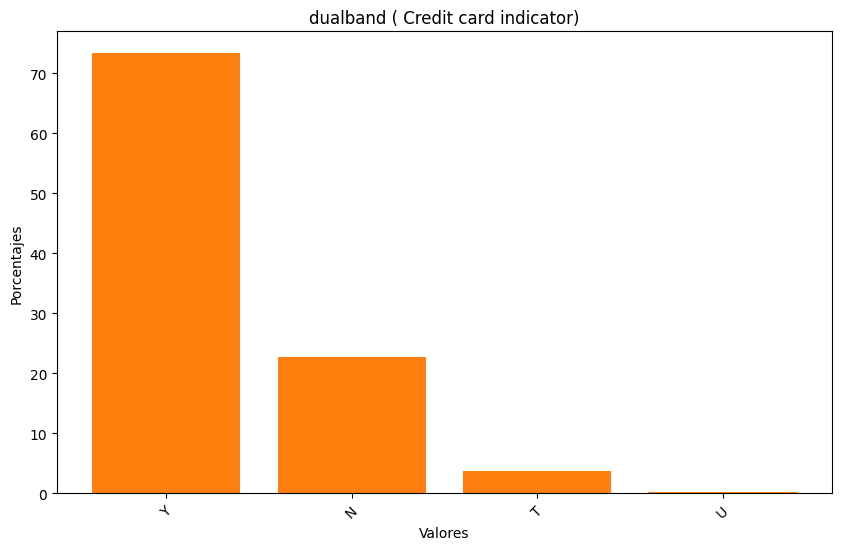

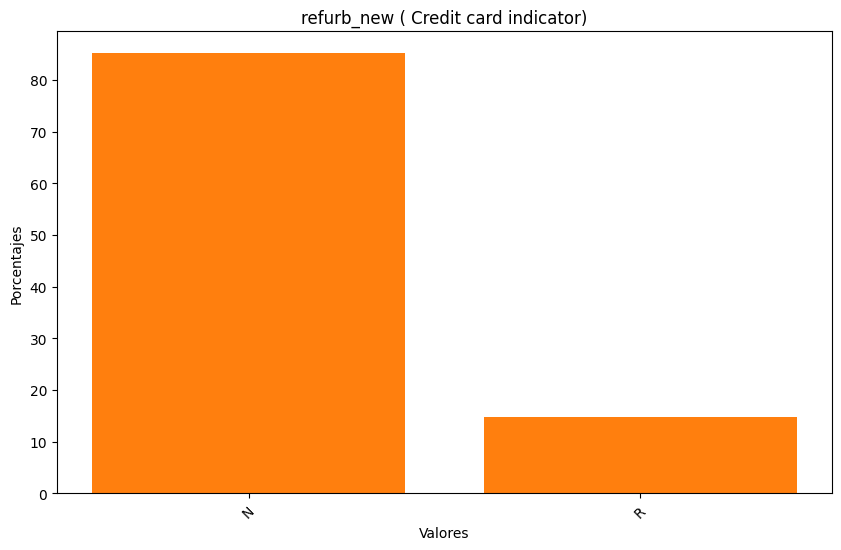

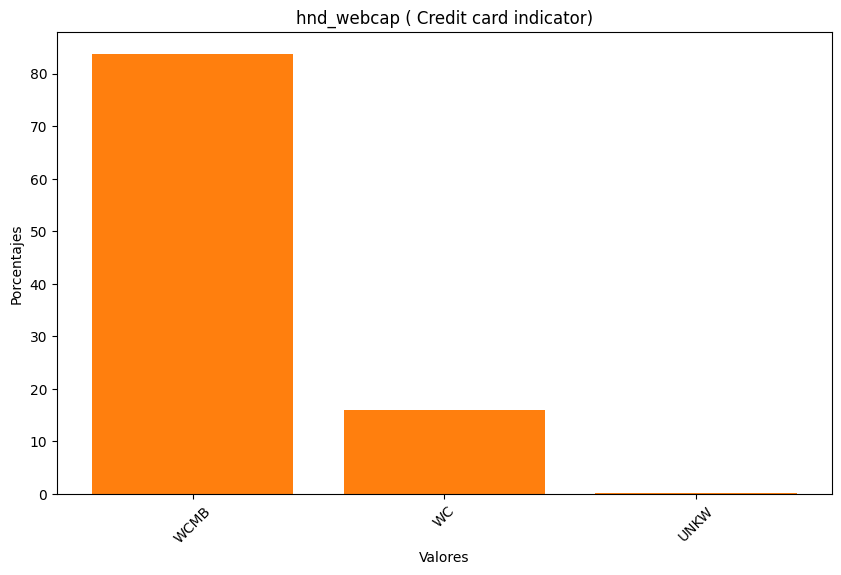

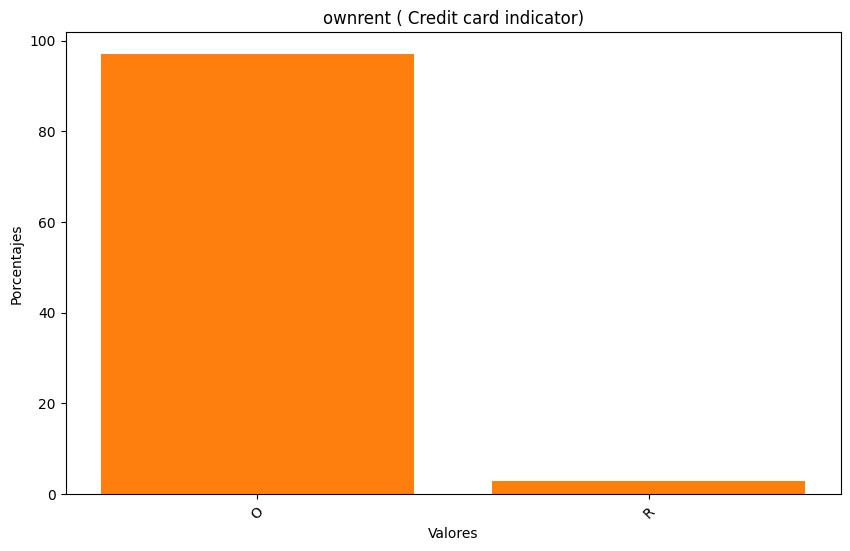

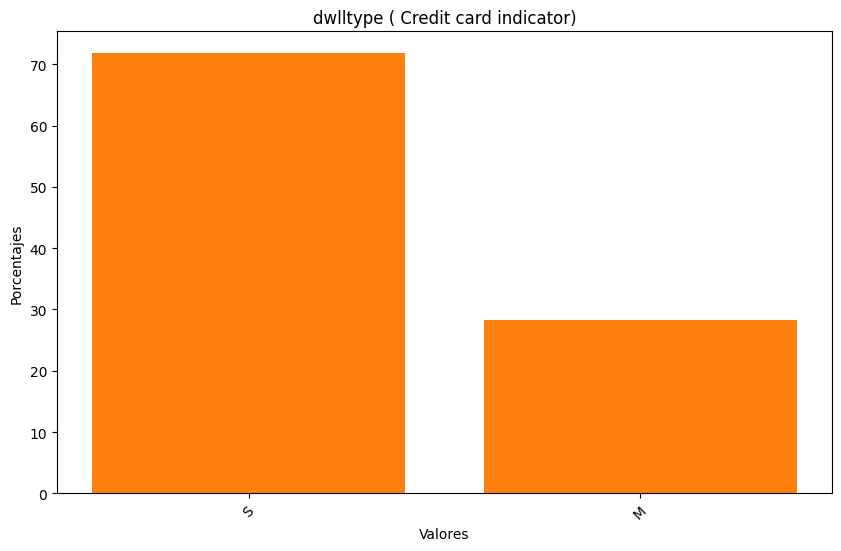

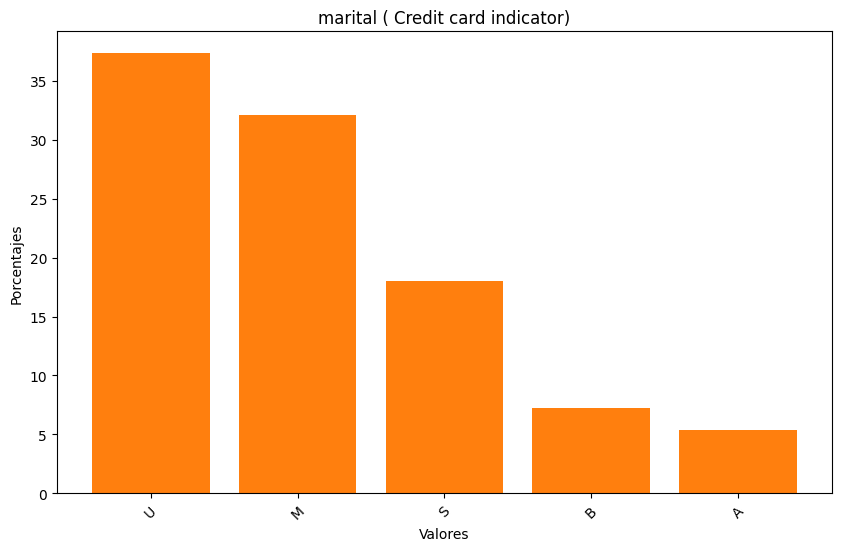

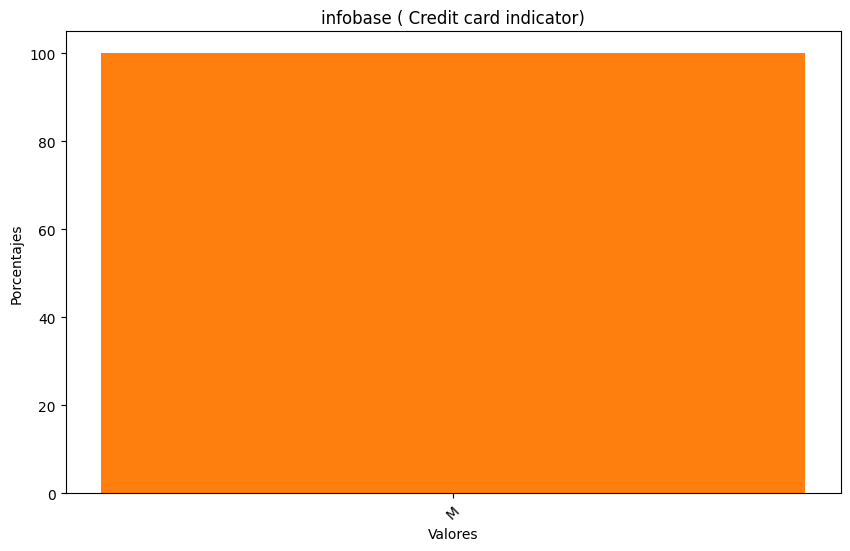

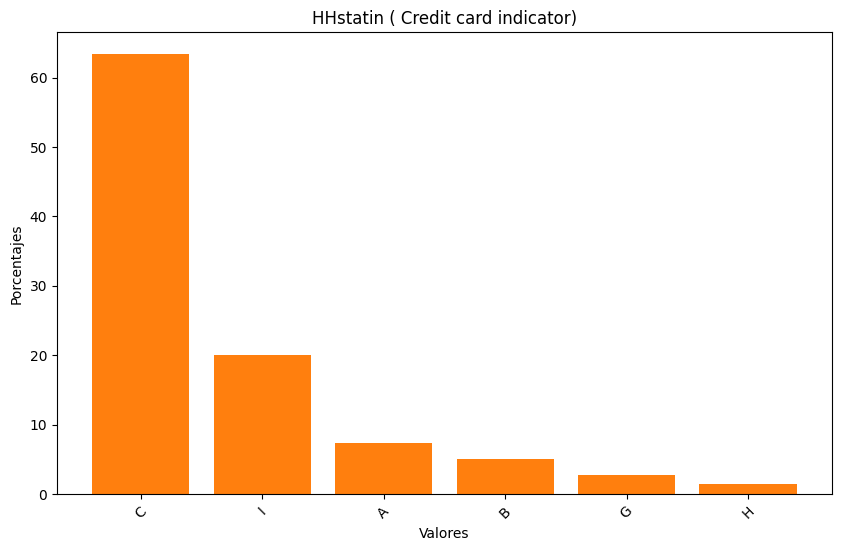

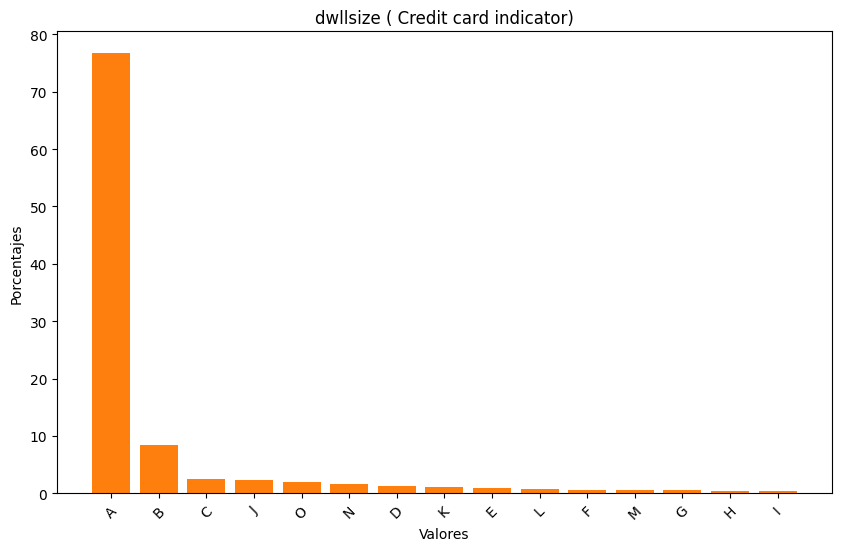

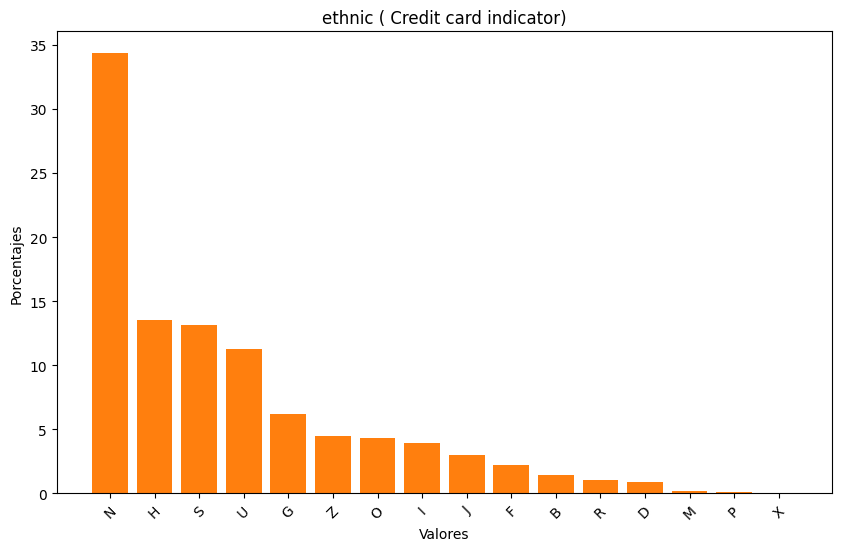

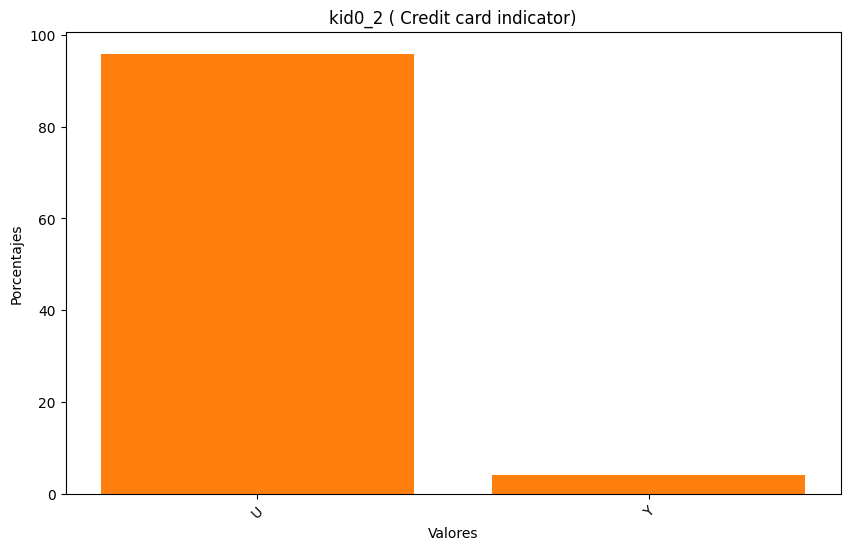

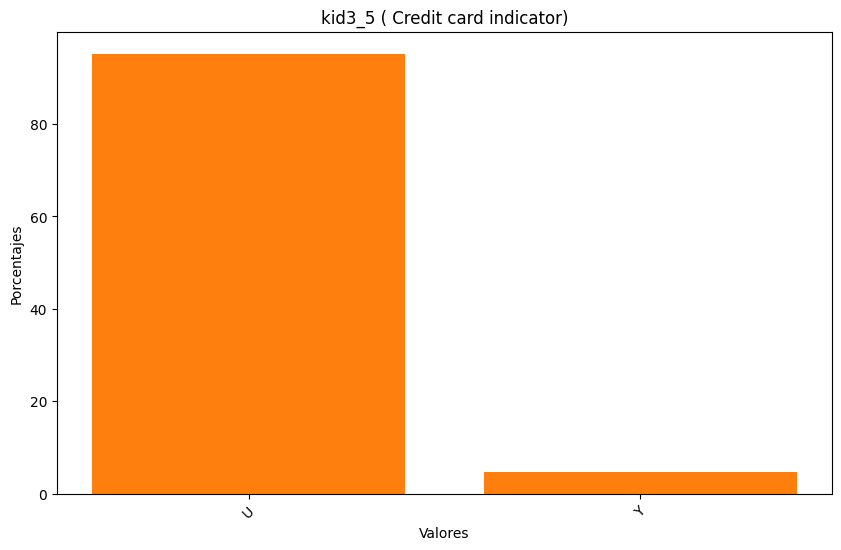

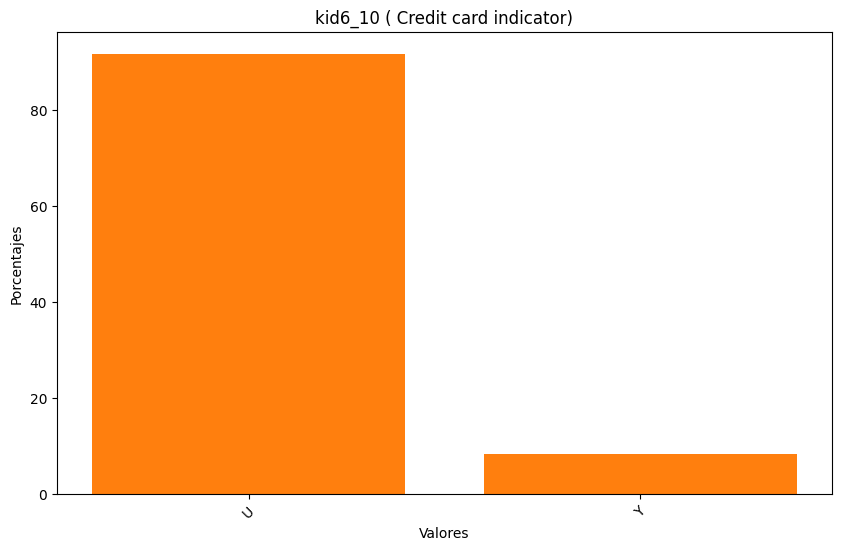

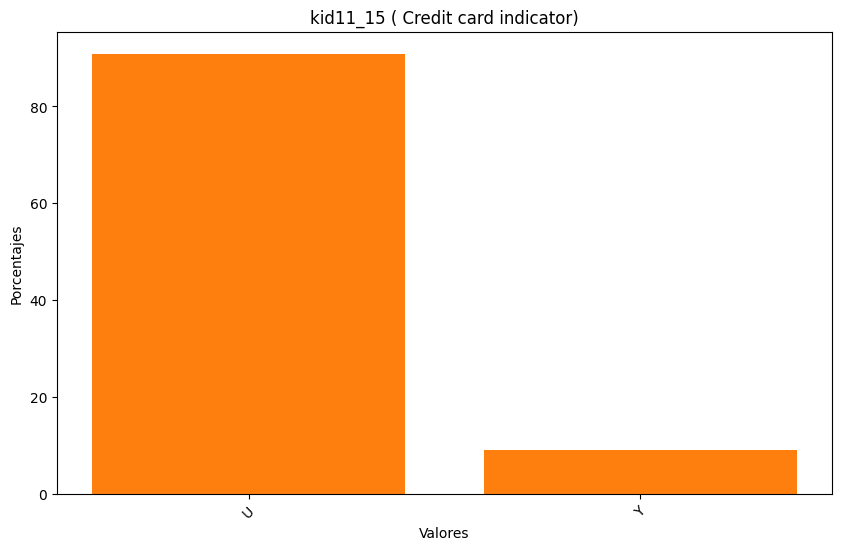

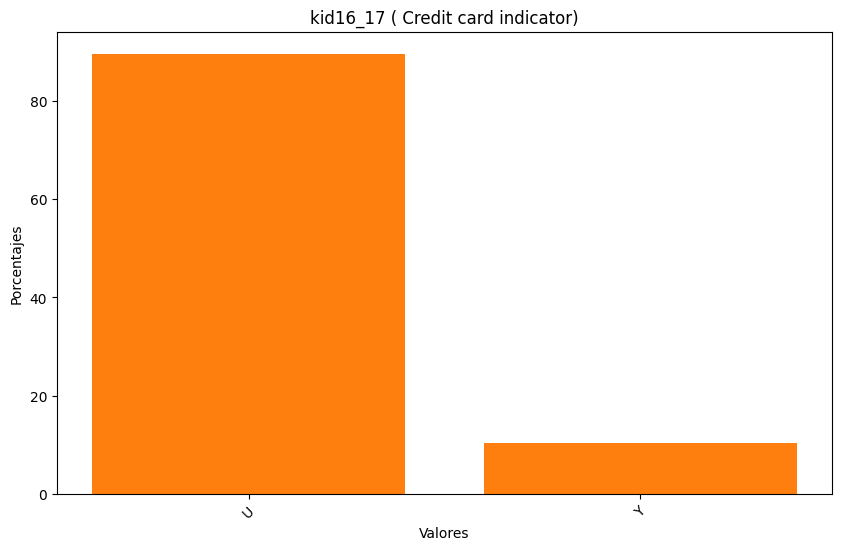

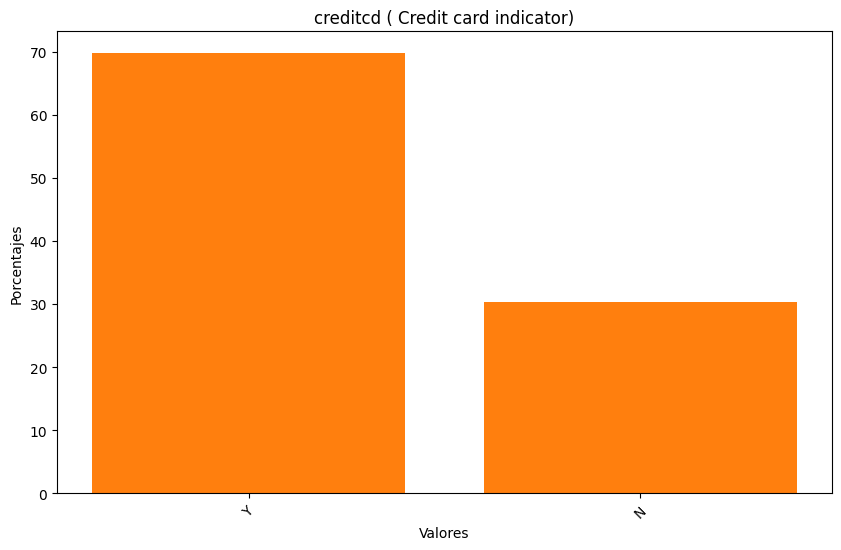

In [ ]:
cat_data_dist(train, columns_dict)

## Analisis Variable-Target

* Relacion target-variable

Cantidad de variables numericas: 79

Cantidad de variables categoricas: 21

rev -  Mean monthly revenue (charge amount)


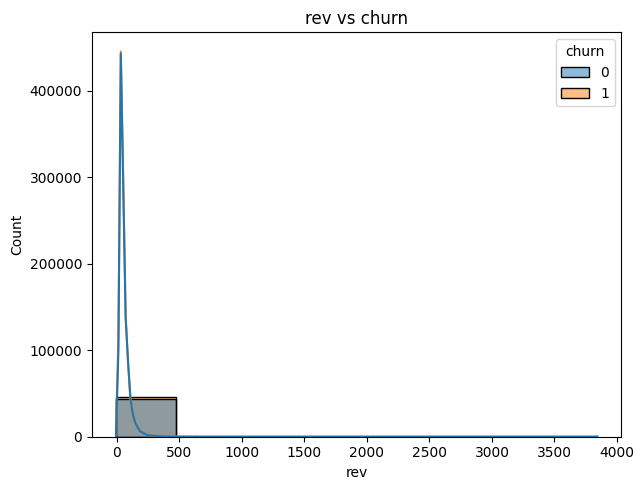

mou -  Mean number of monthly minutes of use


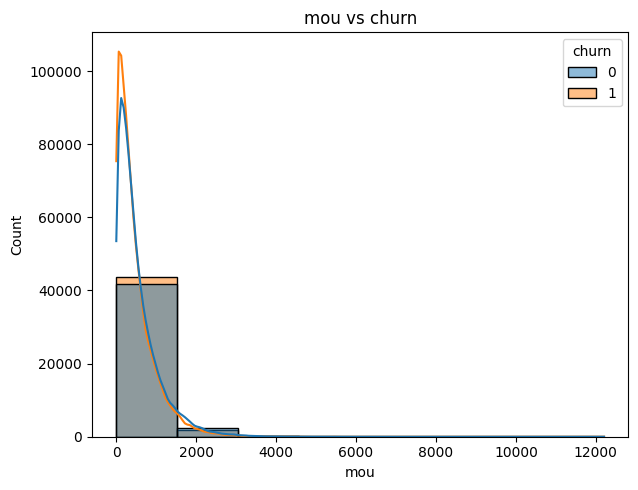

totmrc -  Mean total monthly recurring charge


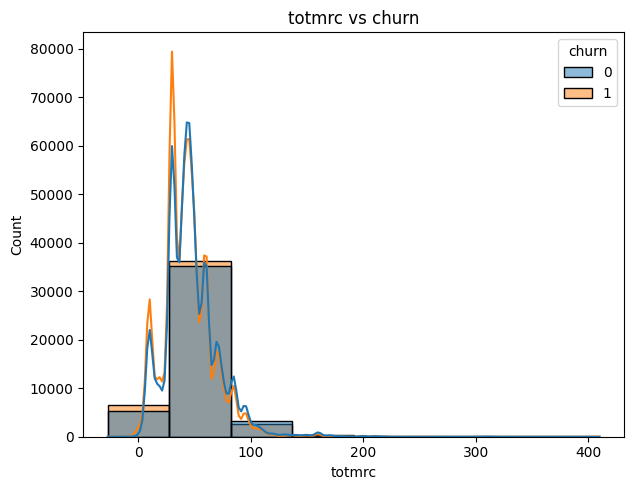

da -  Mean number of directory assisted calls


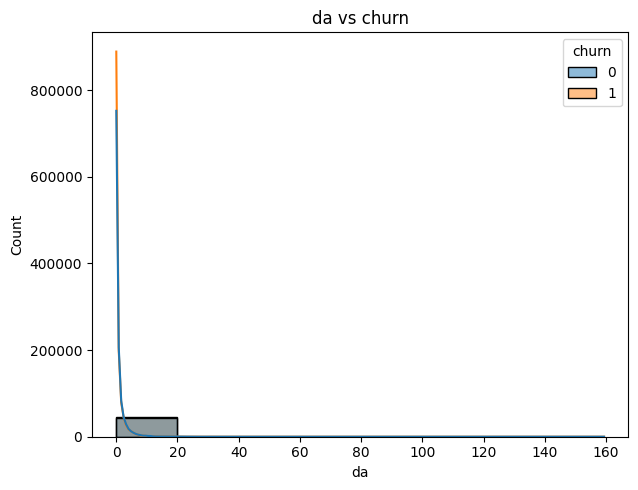

ovrmou -  Mean overage minutes of use


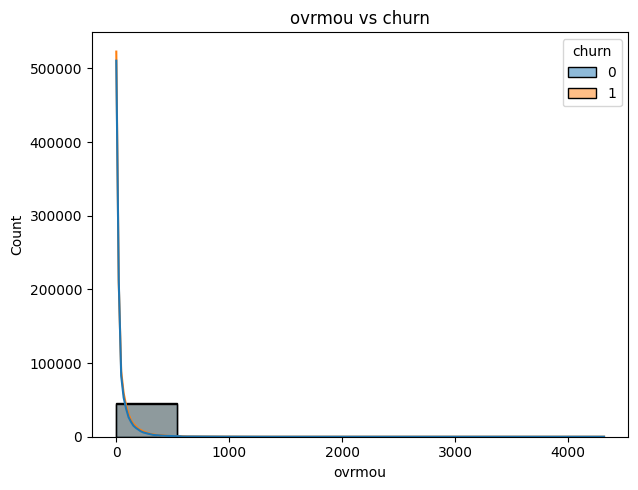

ovrrev -  Mean overage revenue


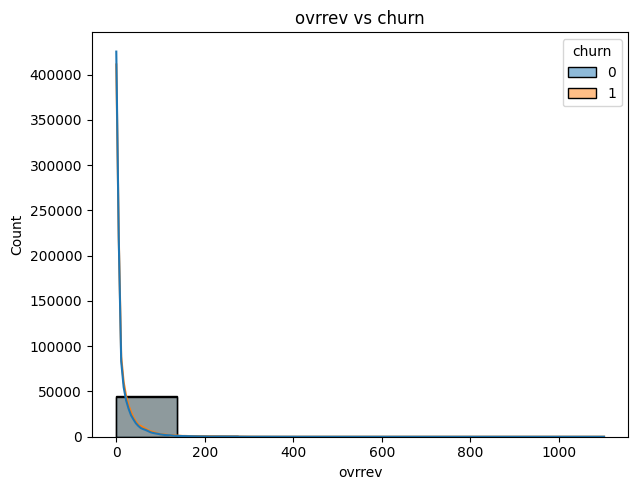

vceovr -  Mean revenue of voice overage


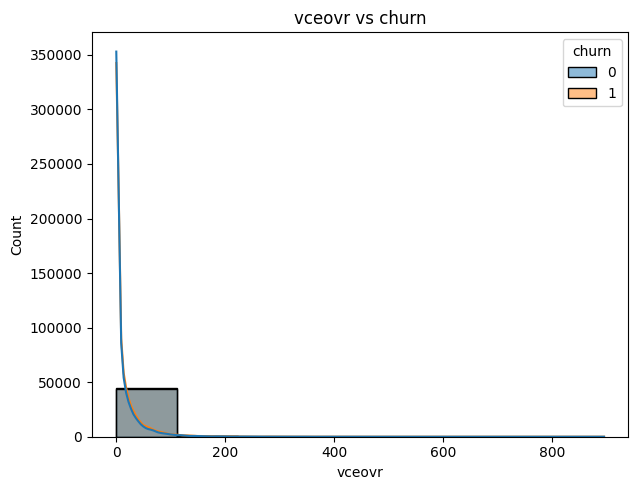

datovr -  Mean revenue of data overage


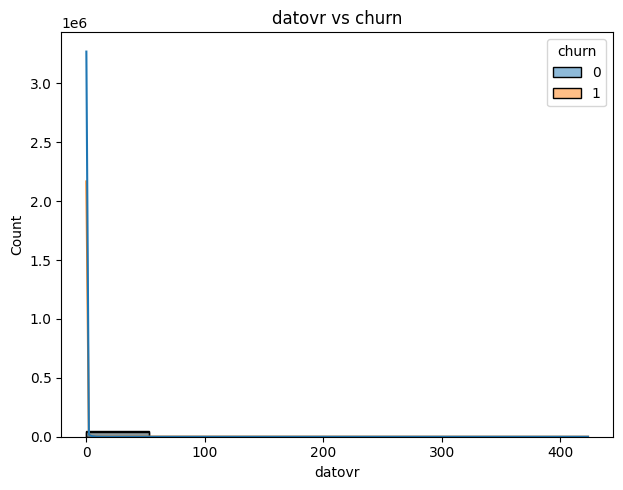

roam -  Mean number of roaming calls


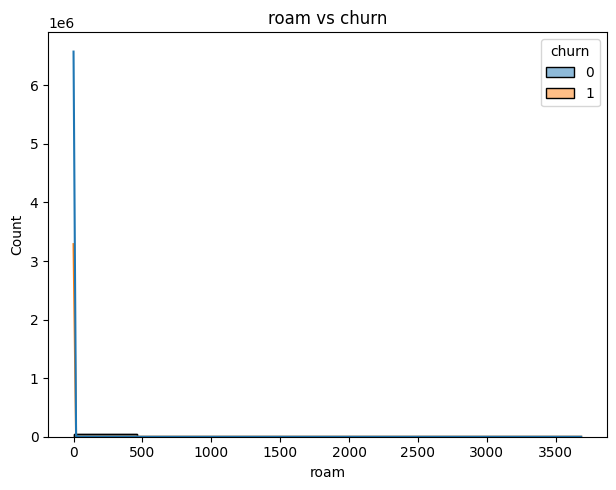

change_mou -  Percentage change in monthly minutes of use vs previous three month average


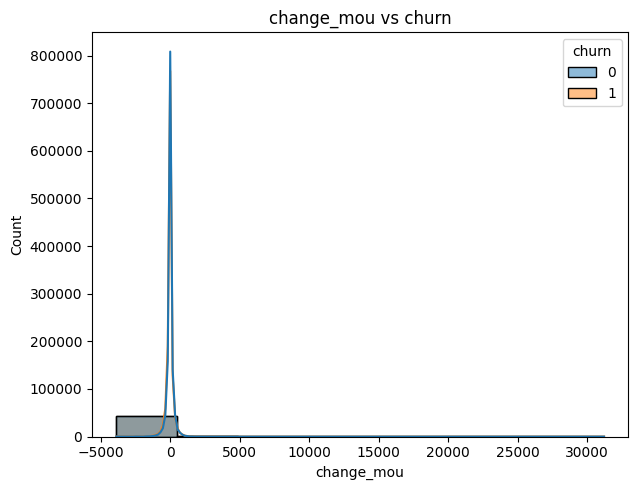

change_rev -  Percentage change in monthly revenue vs previous three month average


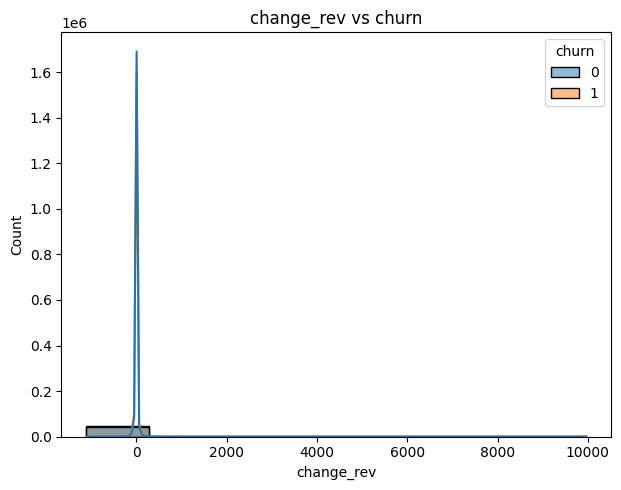

drop_vce -  Mean number of dropped (failed) voice calls


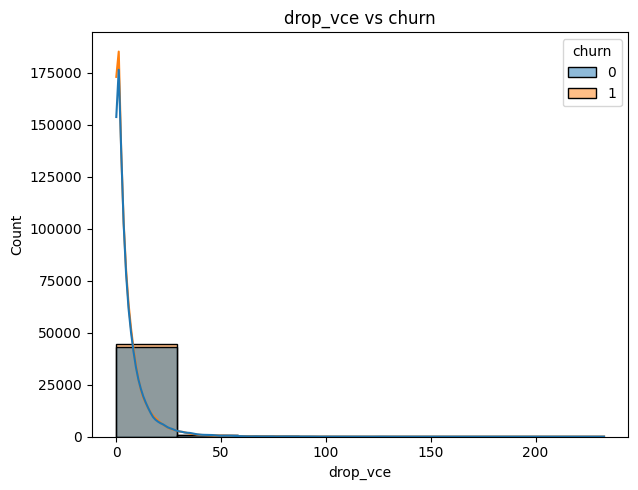

drop_dat -  Mean number of dropped (failed) data calls


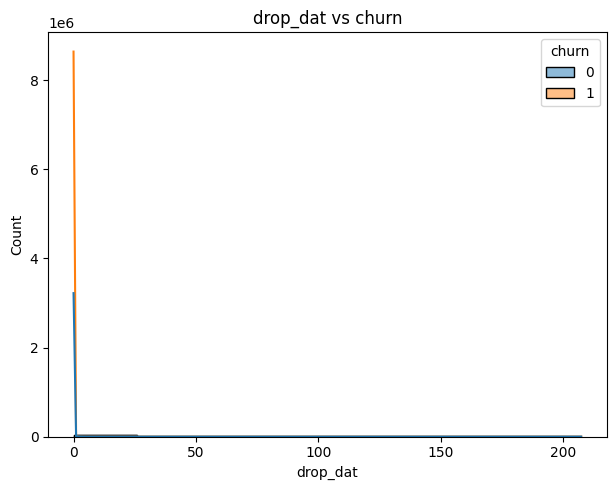

blck_vce -  Mean number of blocked (failed) voice calls


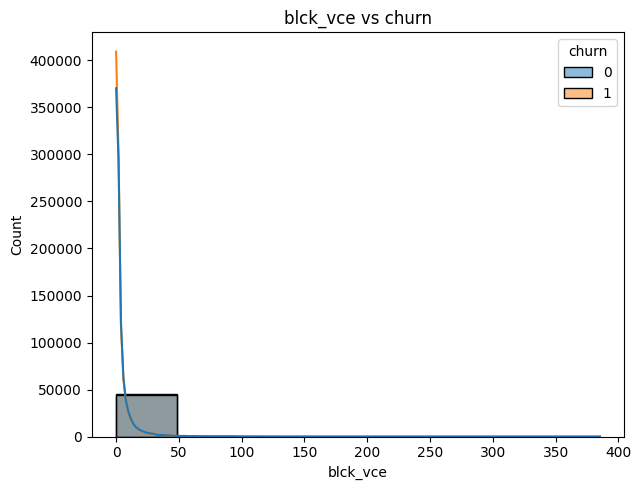

blck_dat -  Mean number of blocked (failed) data calls


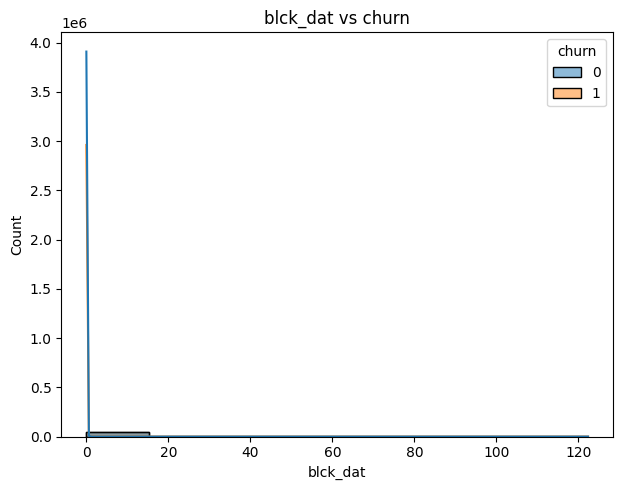

unan_vce -  Mean number of unanswered voice calls


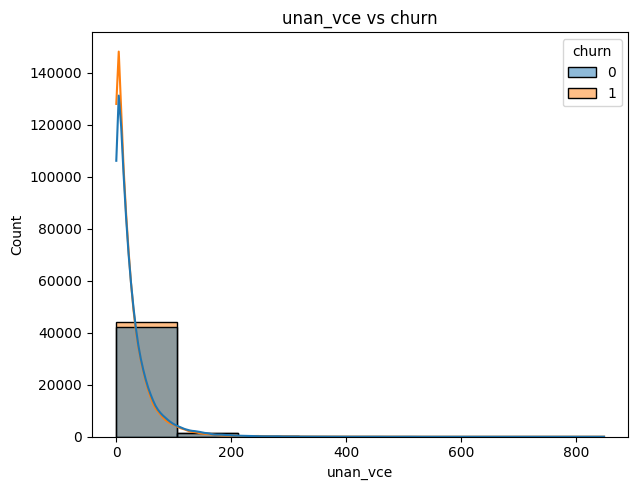

unan_dat -  Mean number of unanswered data calls


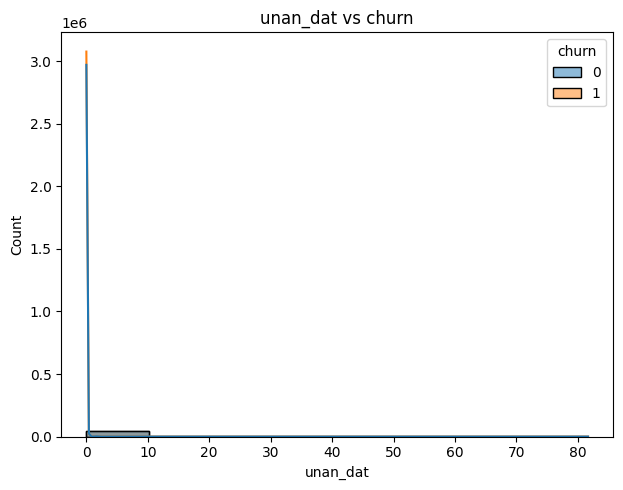

plcd_vce -  Mean number of attempted voice calls placed


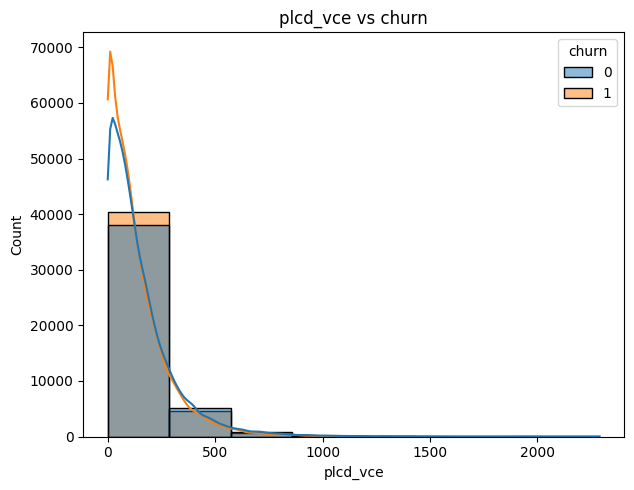

plcd_dat -  Mean number of attempted data calls placed


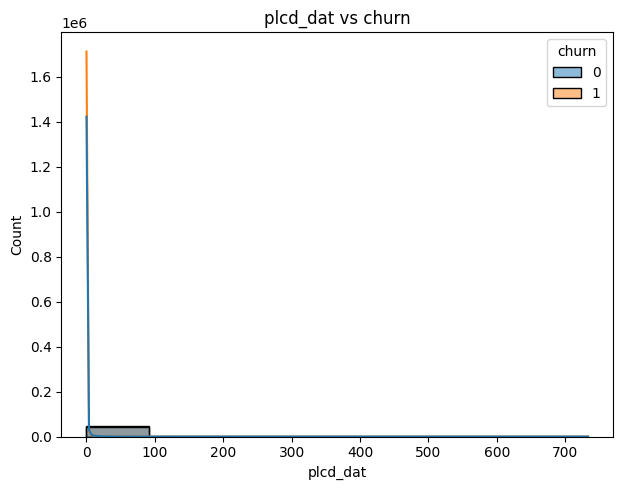

recv_vce -  Mean number of received voice calls


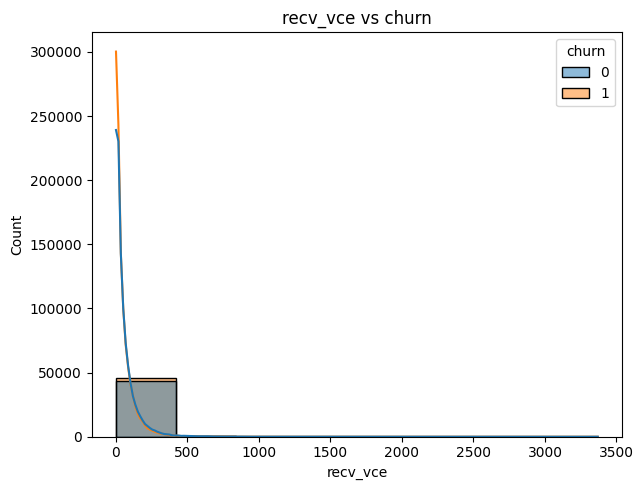

recv_sms -  Mean number of received sms


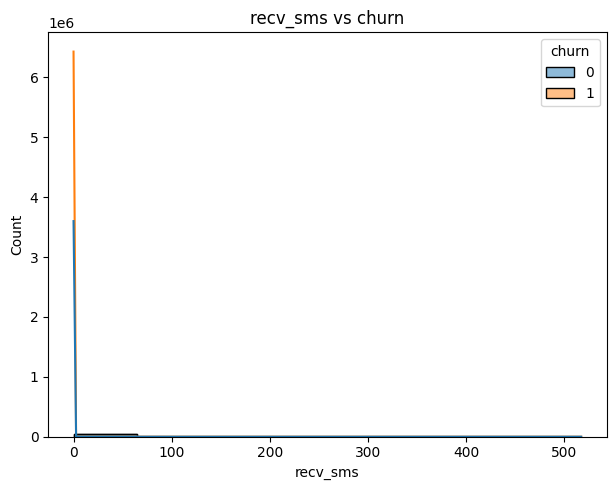

comp_vce -  Mean number of completed voice calls


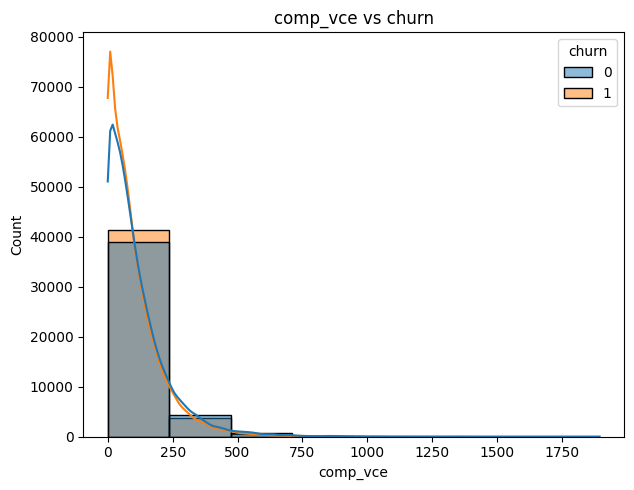

comp_dat -  Mean number of completed data calls


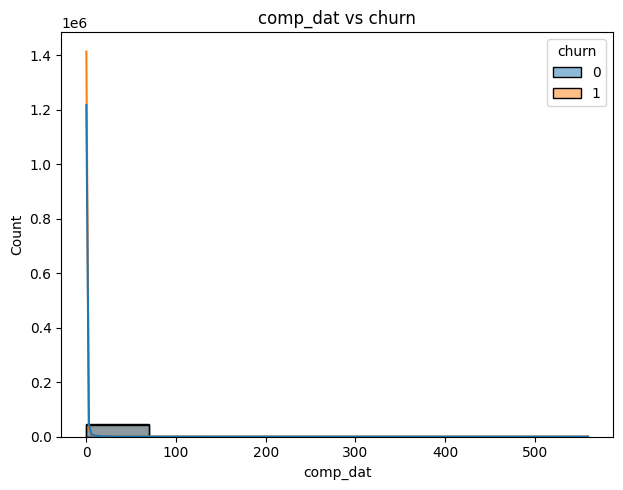

custcare -  Mean number of customer care calls


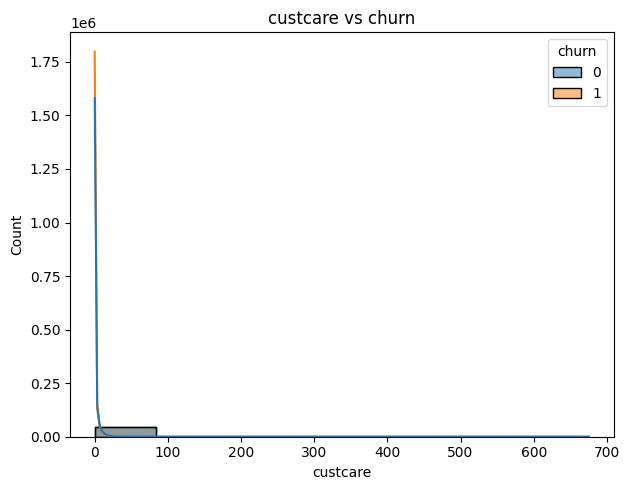

ccrndmou -  Mean rounded minutes of use of customer care calls


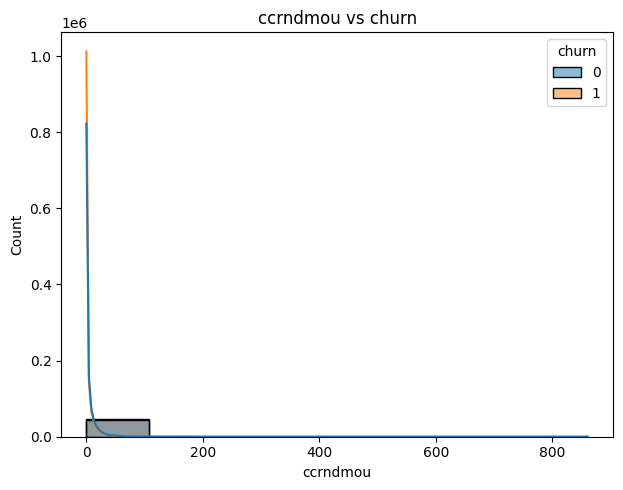

cc_mou -  Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls


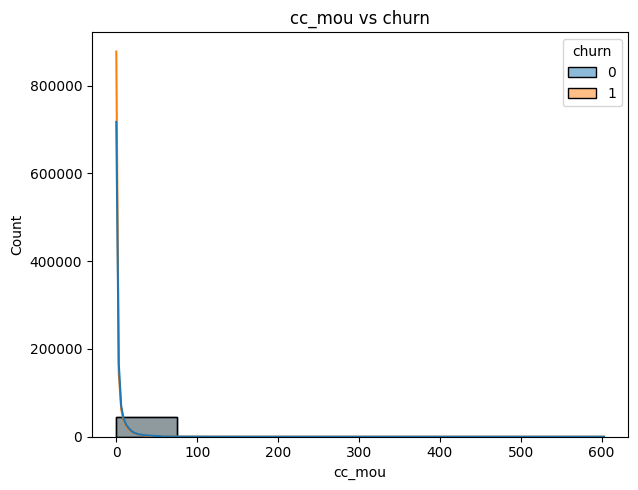

inonemin -  Mean number of inbound calls less than one minute


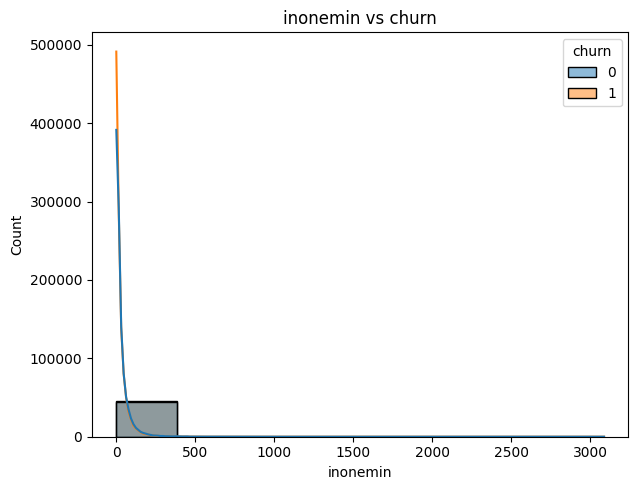

threeway -  Mean number of three way calls


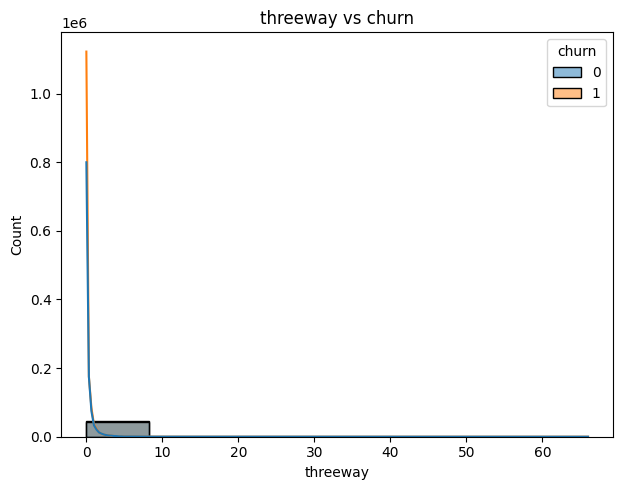

mou_cvce -  Mean unrounded minutes of use of completed voice calls


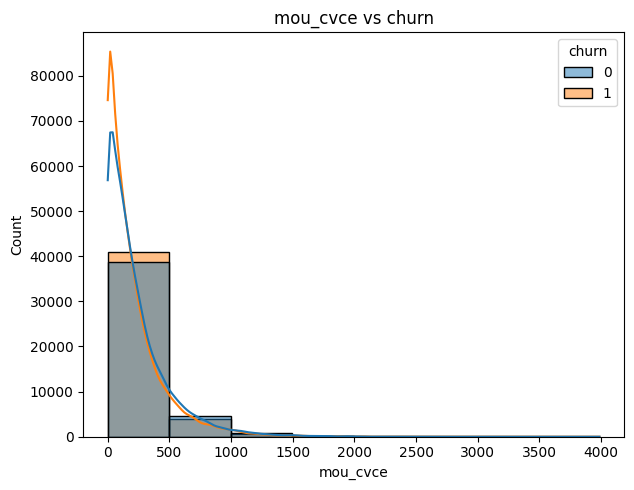

mou_cdat -  Mean unrounded minutes of use of completed data calls


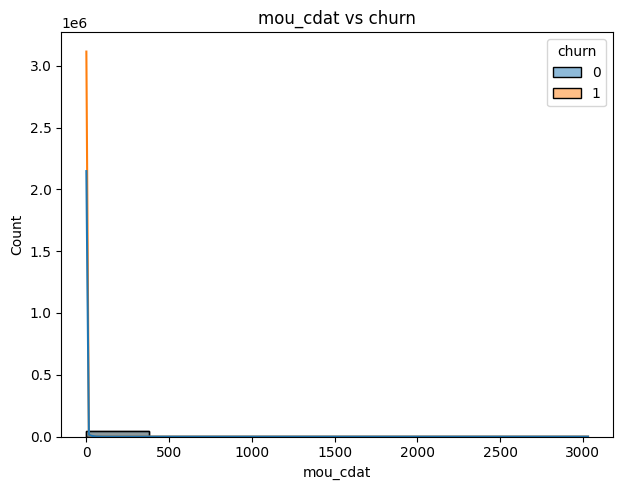

mou_rvce -  Mean unrounded minutes of use of received voice calls


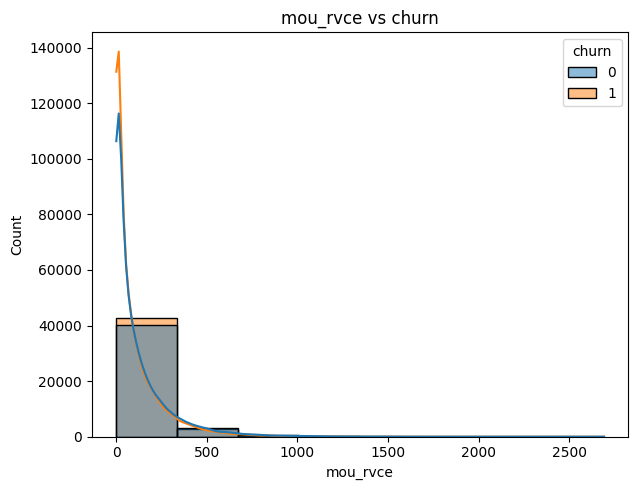

owylis_vce -  Mean number of outbound wireless to wireless voice calls


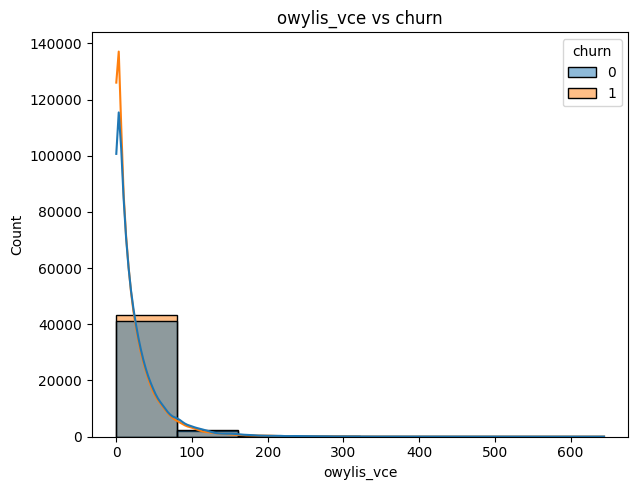

mouowylisv -  Mean unrounded minutes of use of outbound wireless to wireless voice calls


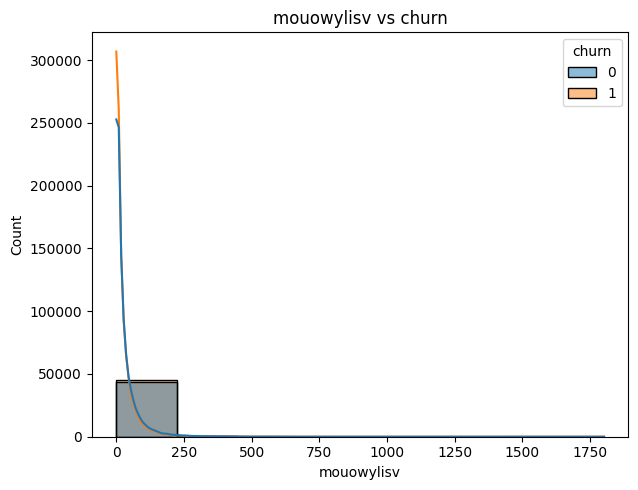

iwylis_vce -  Mean number of inbound wireless to wireless voice calls


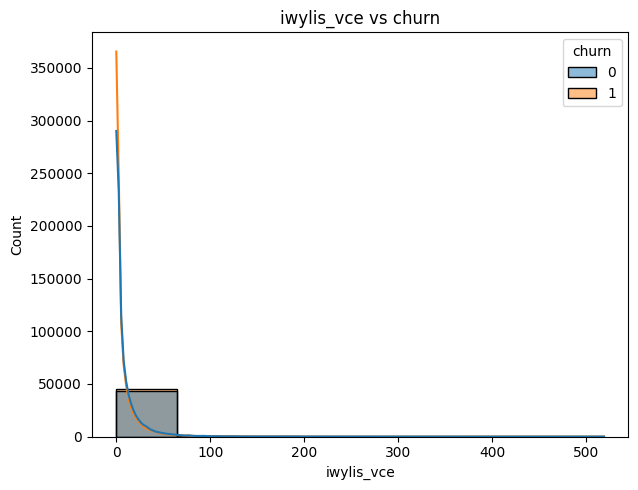

mouiwylisv -  Mean unrounded minutes of use of inbound wireless to wireless voice calls


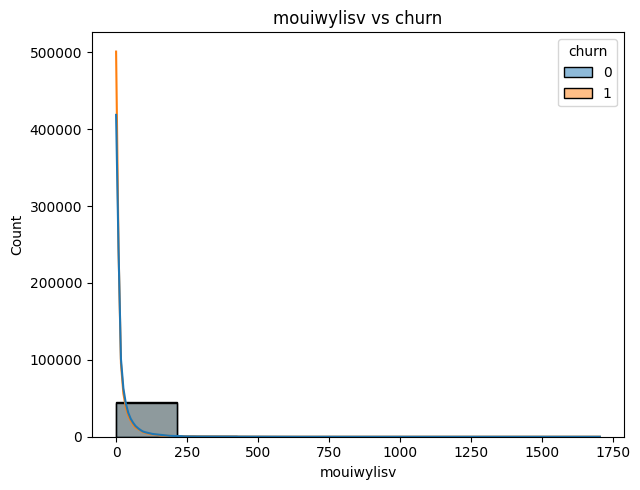

peak_vce -  Mean number of inbound and outbound peak voice calls


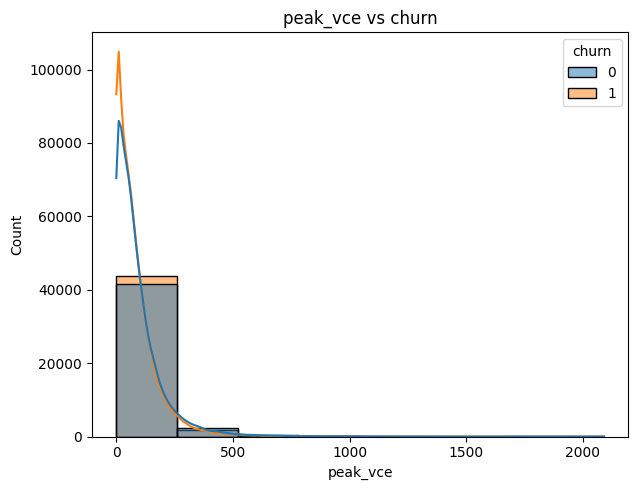

peak_dat -  Mean number of peak data calls


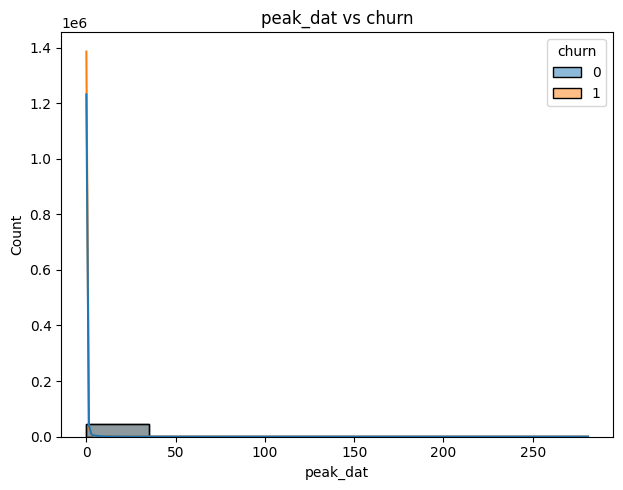

mou_peav -  Mean unrounded minutes of use of peak voice calls


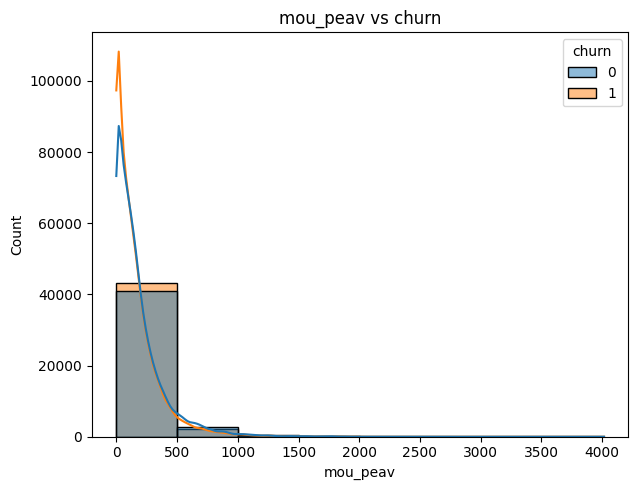

mou_pead -  Mean unrounded minutes of use of peak data calls


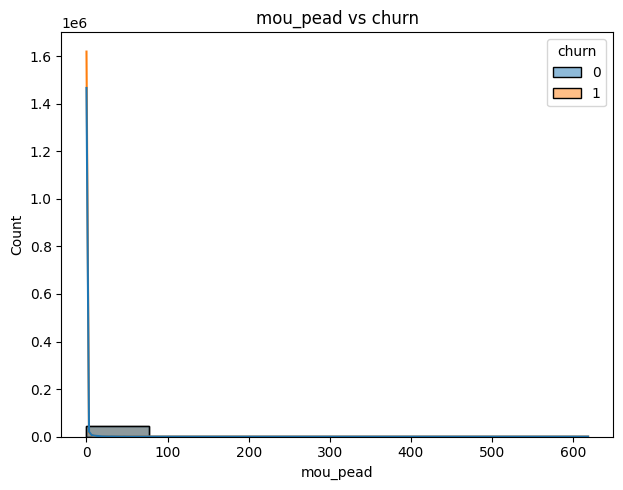

opk_vce -  Mean number of off-peak voice calls


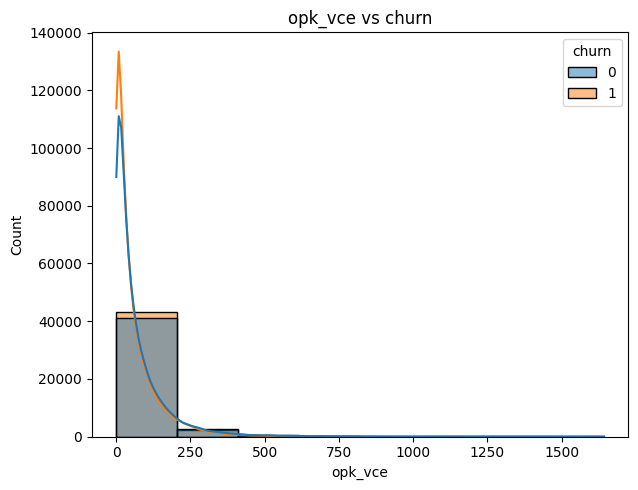

opk_dat -  Mean number of off-peak data calls


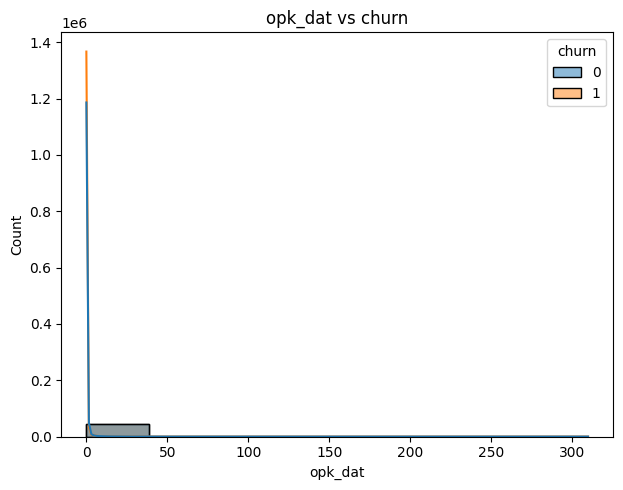

mou_opkv -  Mean unrounded minutes of use of off-peak voice calls


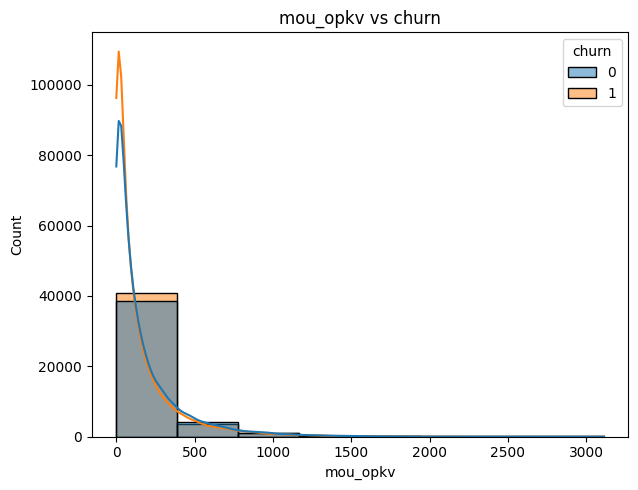

mou_opkd -  Mean unrounded minutes of use of off-peak data calls


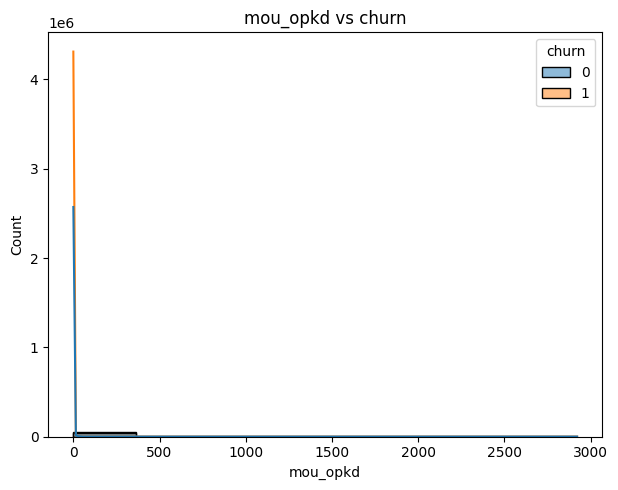

drop_blk -  Mean number of dropped or blocked calls


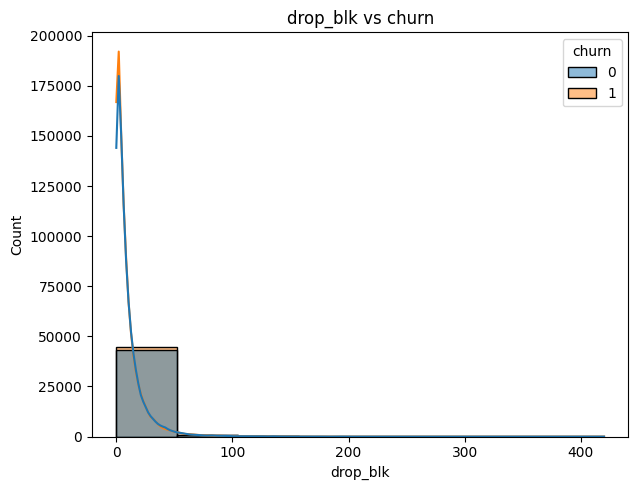

attempt -  Mean number of attempted calls


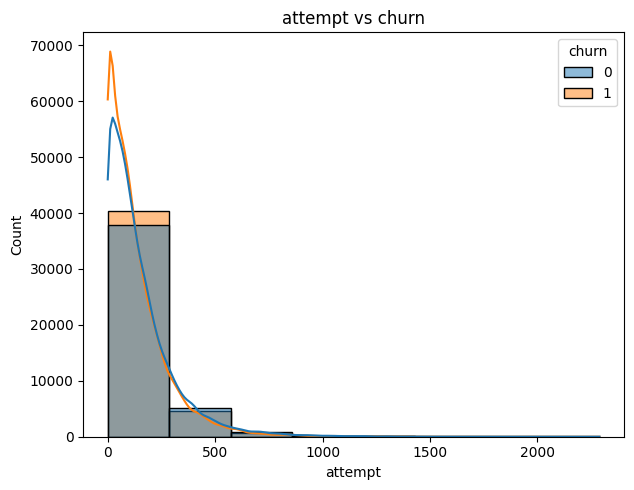

complete -  Mean number of completed calls


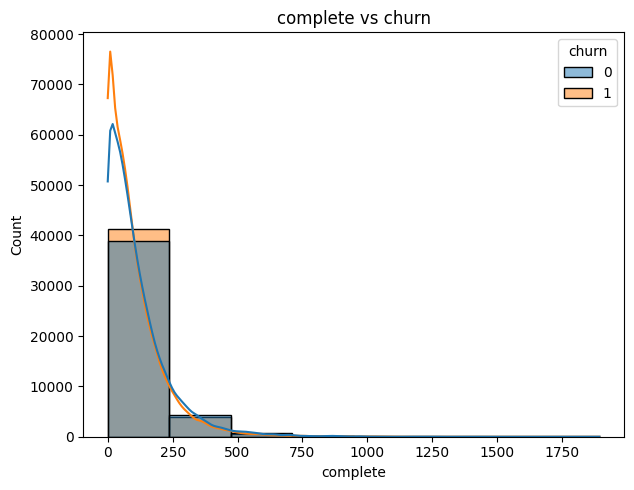

callfwdv -  Mean number of call forwarding calls


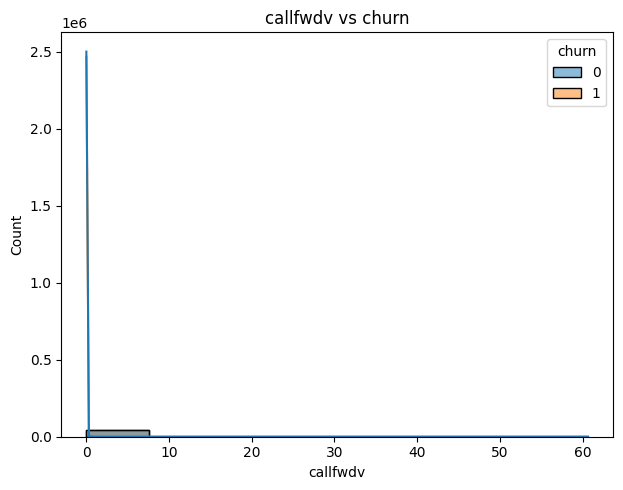

callwait -  Mean number of call waiting calls


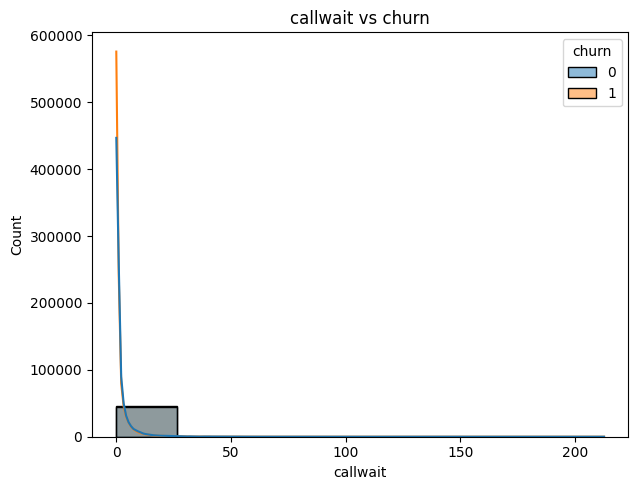

months -  Total number of months in service


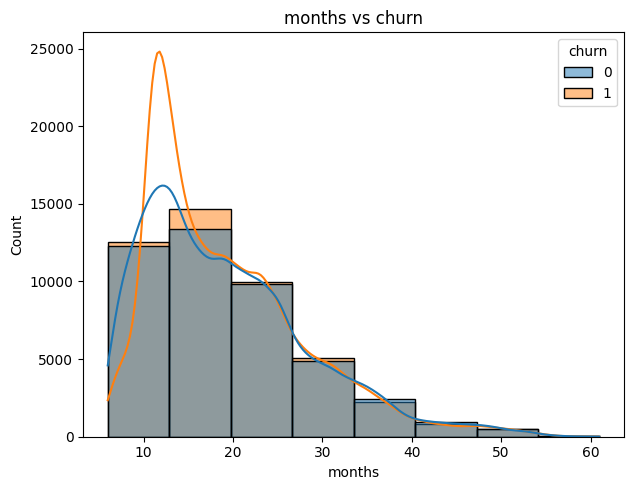

uniqsubs -  Number of unique subscribers in the household


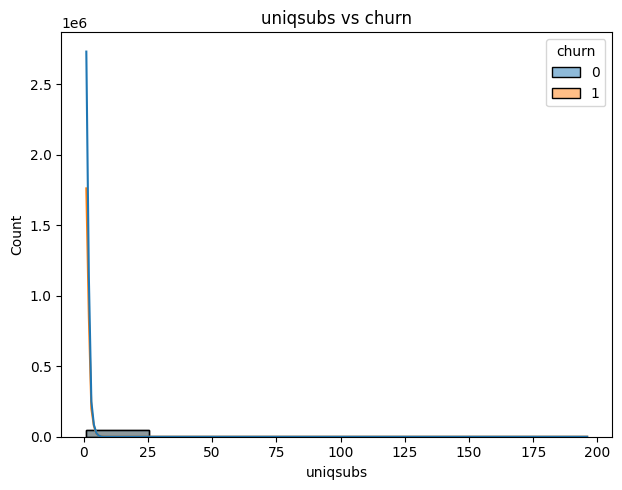

actvsubs -  Number of active subscribers in household


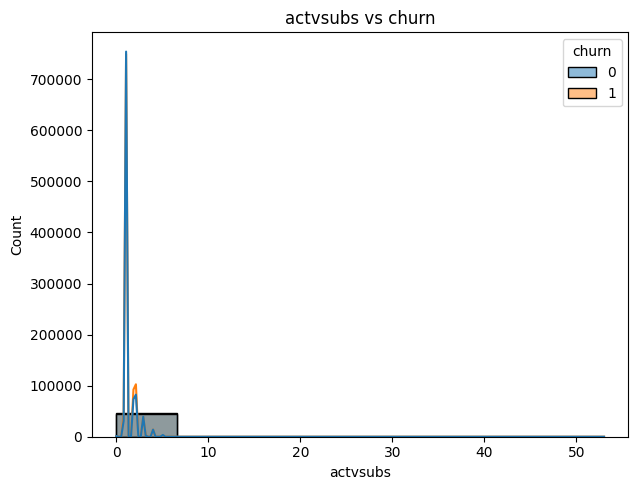

totcalls -  Total number of calls over the life of the customer


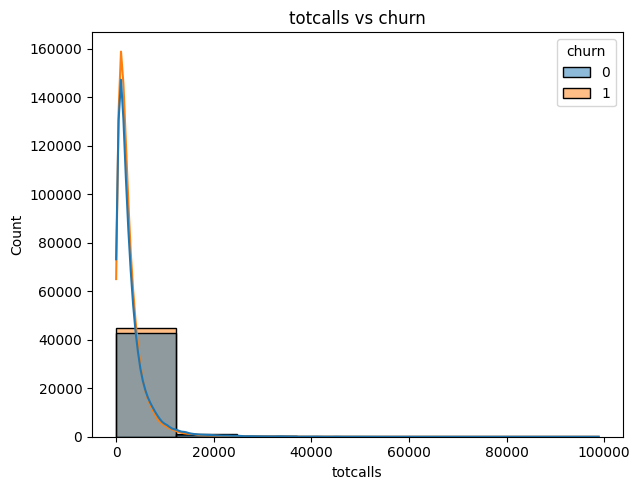

totmou -  Total minutes of use over the life of the cus


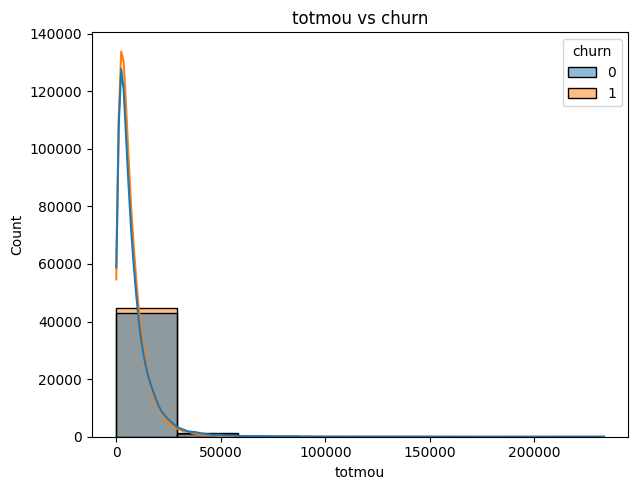

totrev -  Total revenue


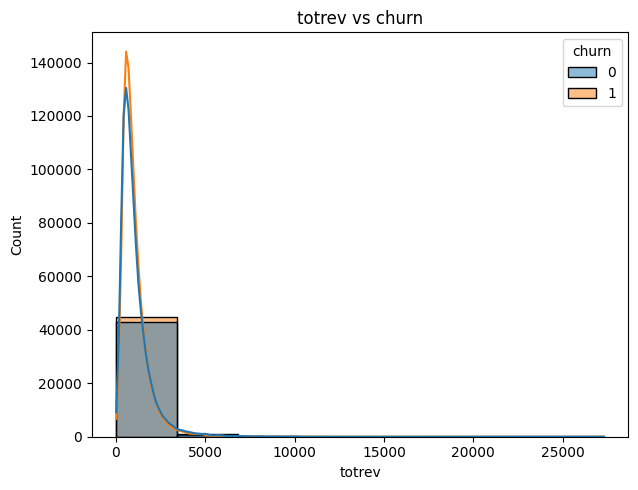

adjrev -  Billing adjusted total revenue over the life of the customer


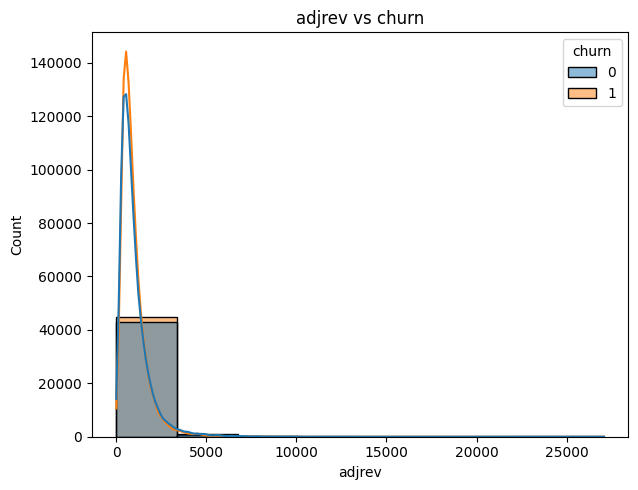

adjmou -  Billing adjusted total minutes of use over the life of the customer


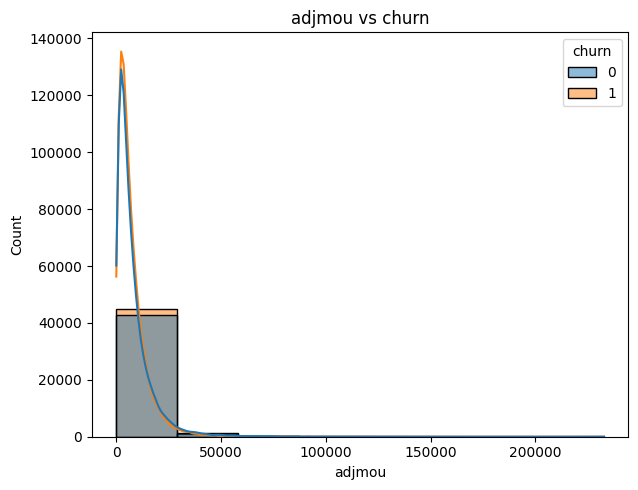

adjqty -  Billing adjusted total number of calls over the life of the customer


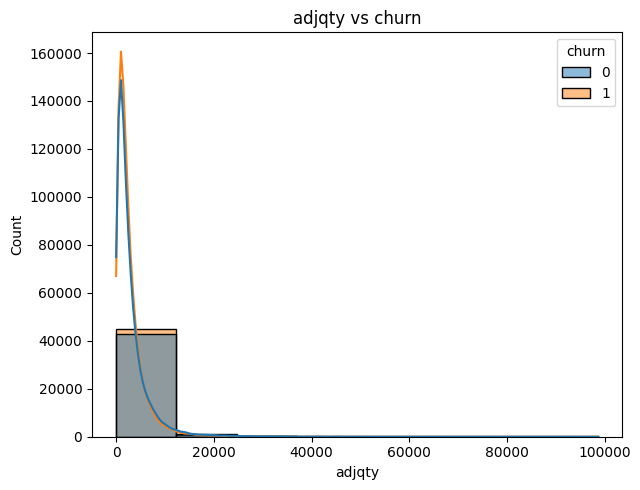

avgrev -  Average monthly revenue over the life of the customer


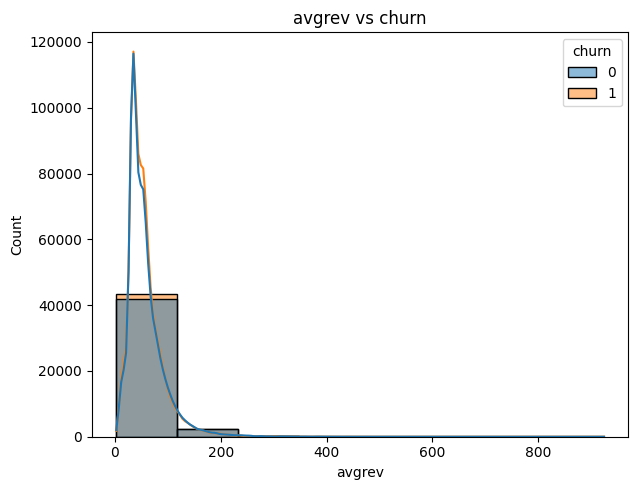

avgmou -  Average monthly minutes of use over the life of the customer


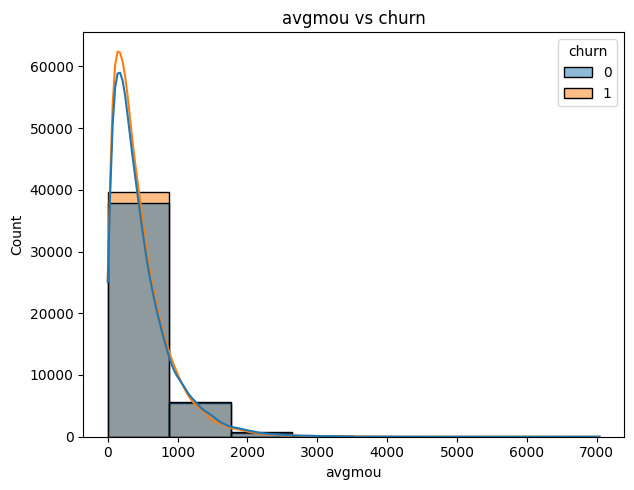

avgqty -  Average monthly number of calls over the life of the customer


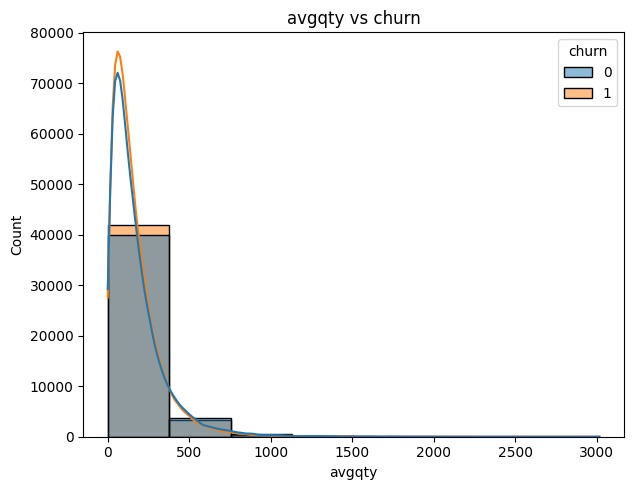

avg3mou -  Average monthly minutes of use over the previous three months


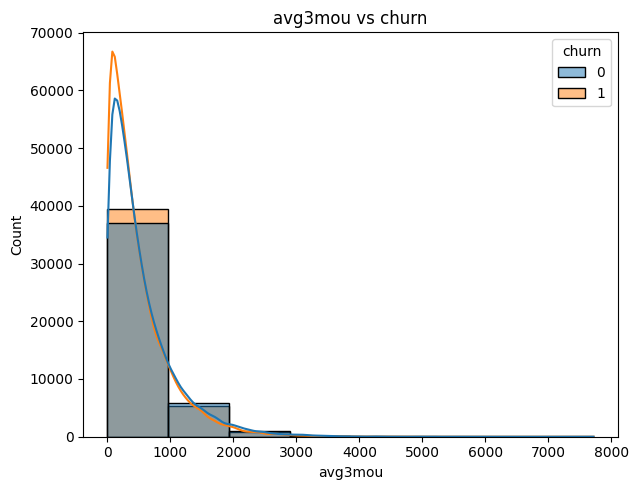

avg3qty -  Average monthly number of calls over the previous three months


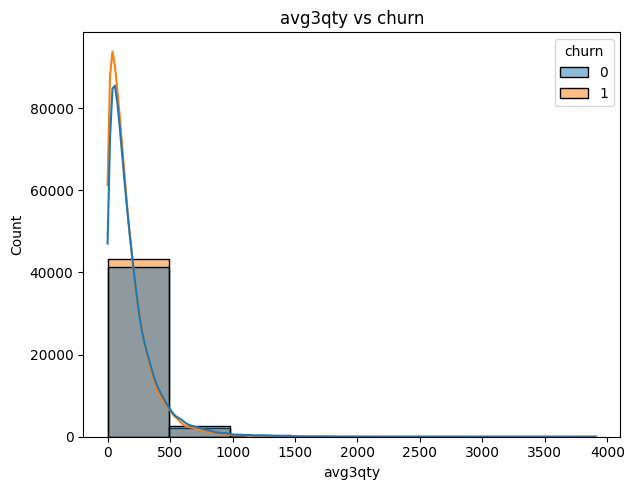

avg3rev -  Average monthly revenue over the previous three months


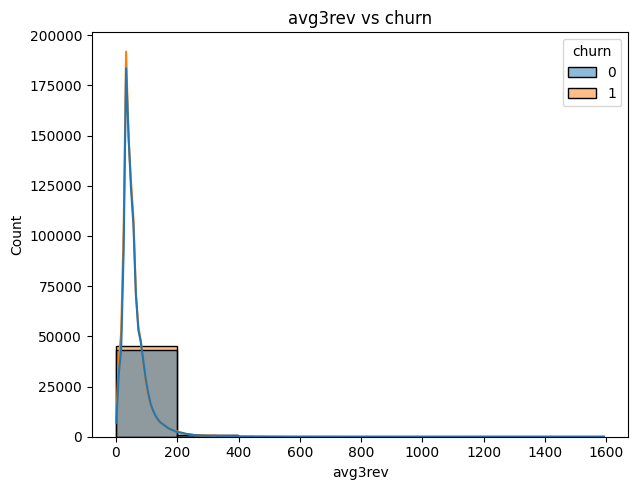

avg6mou -  Average monthly minutes of use over the previous six months


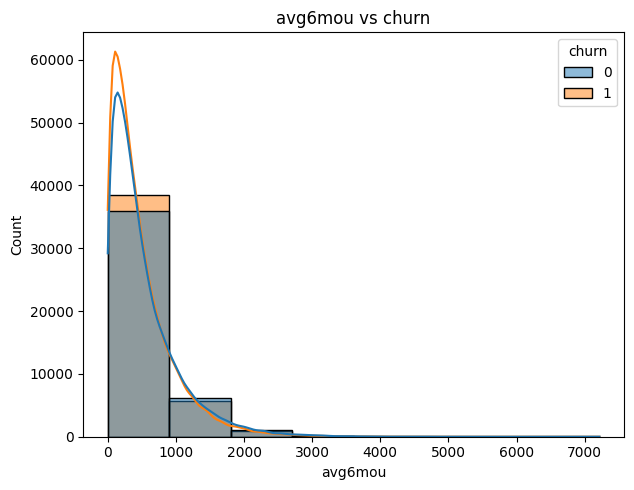

avg6qty -  Average monthly number of calls over the previous six months


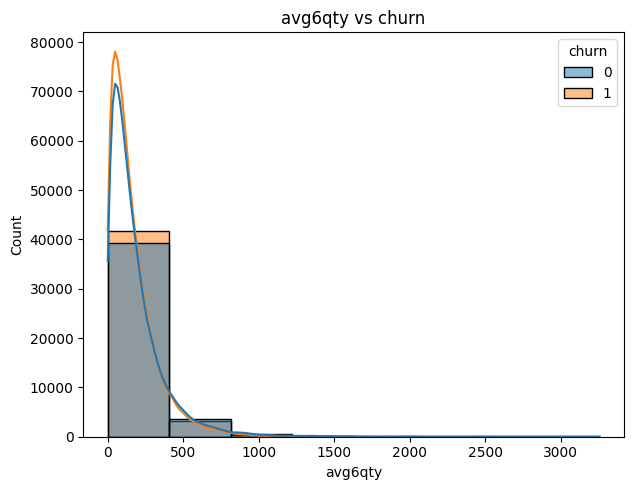

avg6rev -  Average monthly revenue over the previous six months


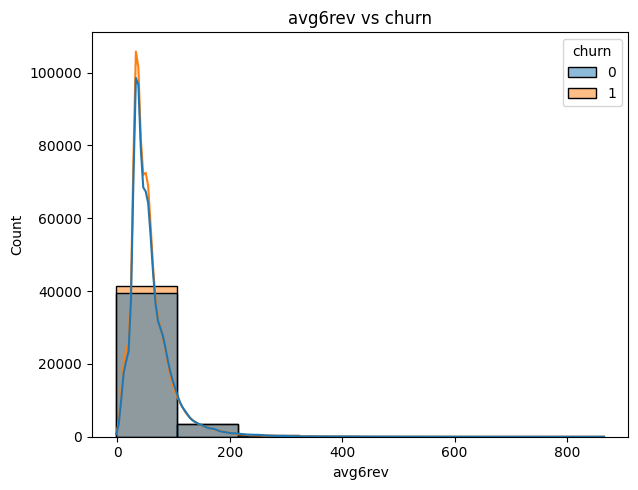

hnd_price -  Current handset price


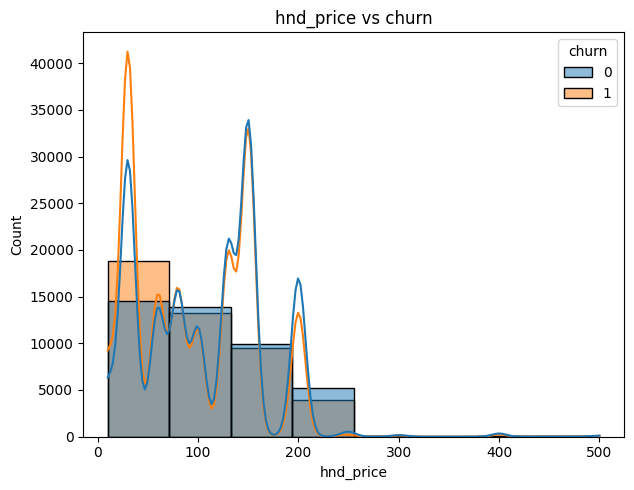

phones -  Number of handsets issued


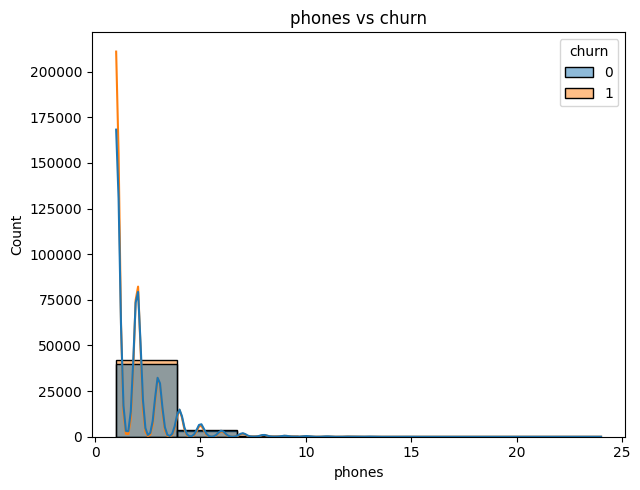

models -  Number of models issued


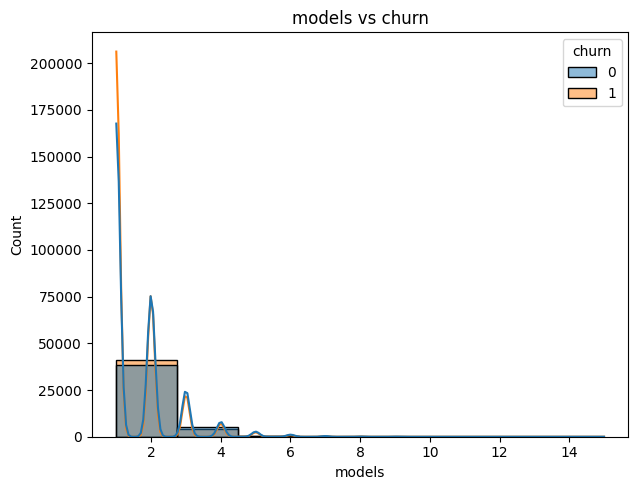

truck -  Truck indicator


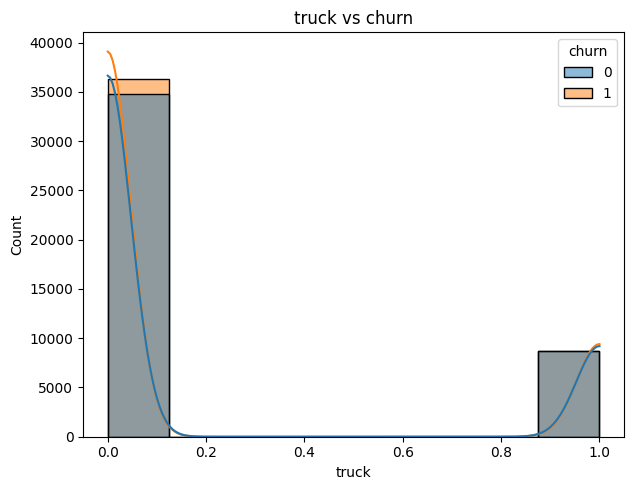

rv -  RV indicator


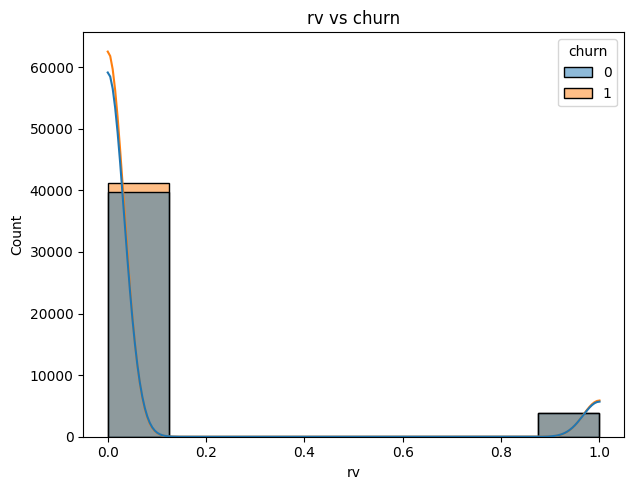

lor -  Length of residence


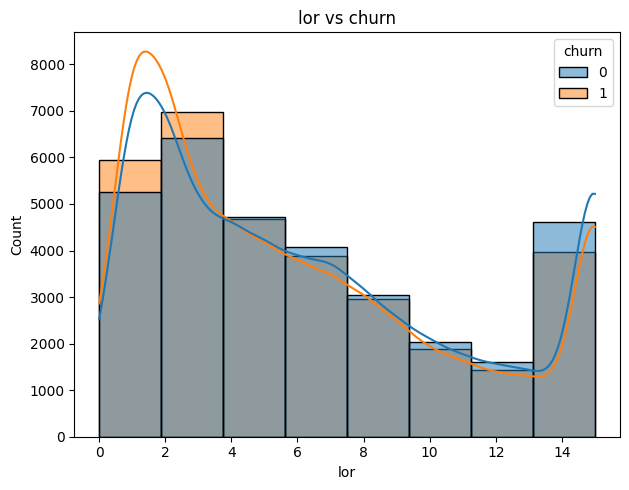

adults -  Number of adults in household


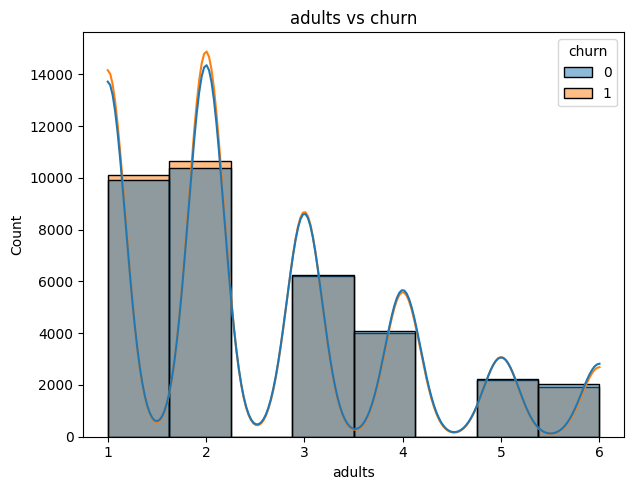

income -  Estimated income


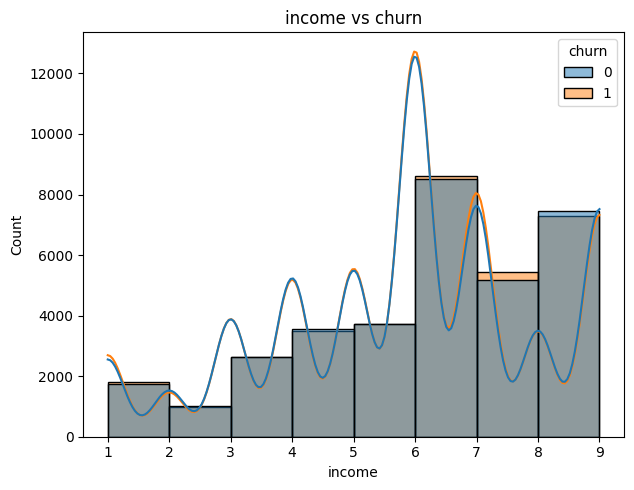

numbcars -  Known number of vehicles


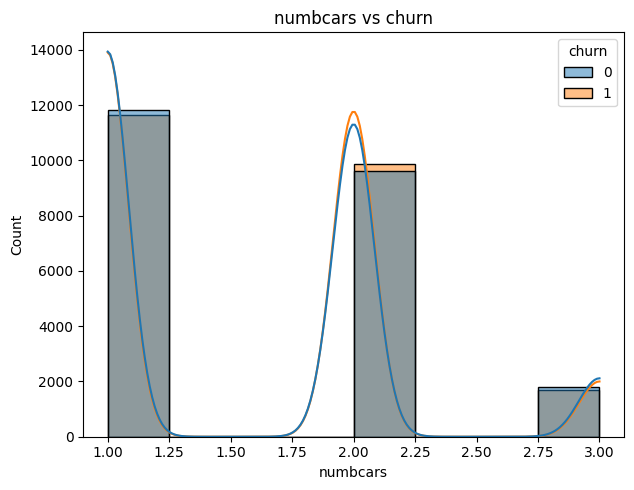

forgntvl -  Foreign travel dummy variable


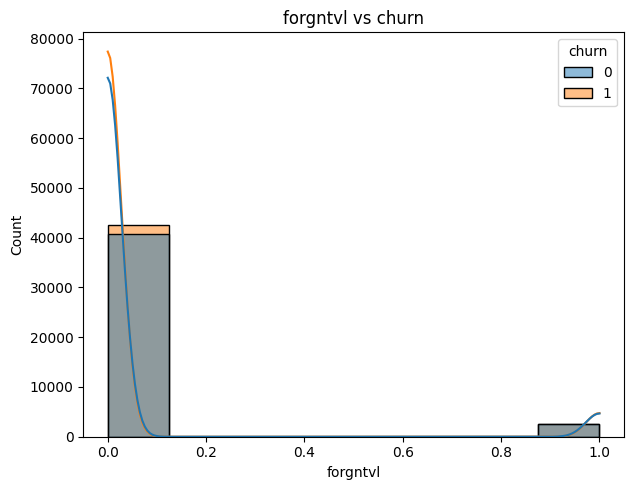

eqpdays -  Number of days (age) of current equipment


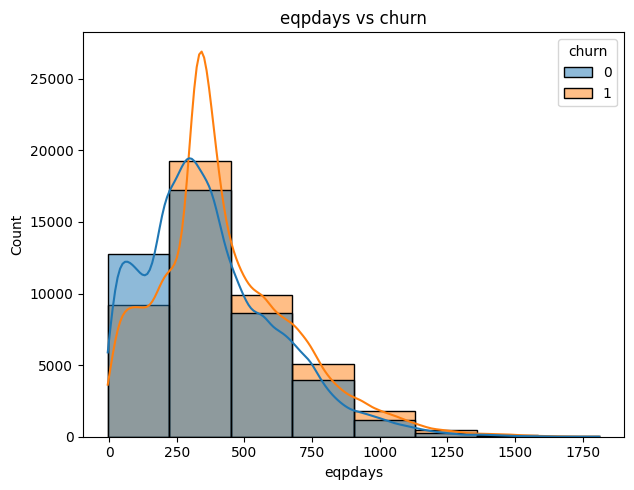

Customer_ID -  Customer ID (Primary key)


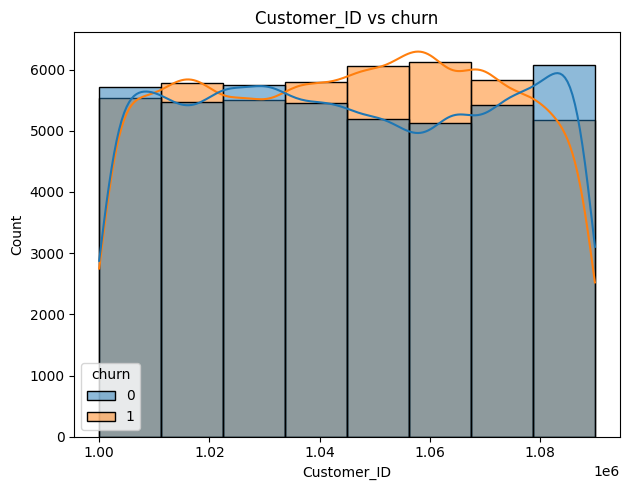

new_cell -  New cell phone user


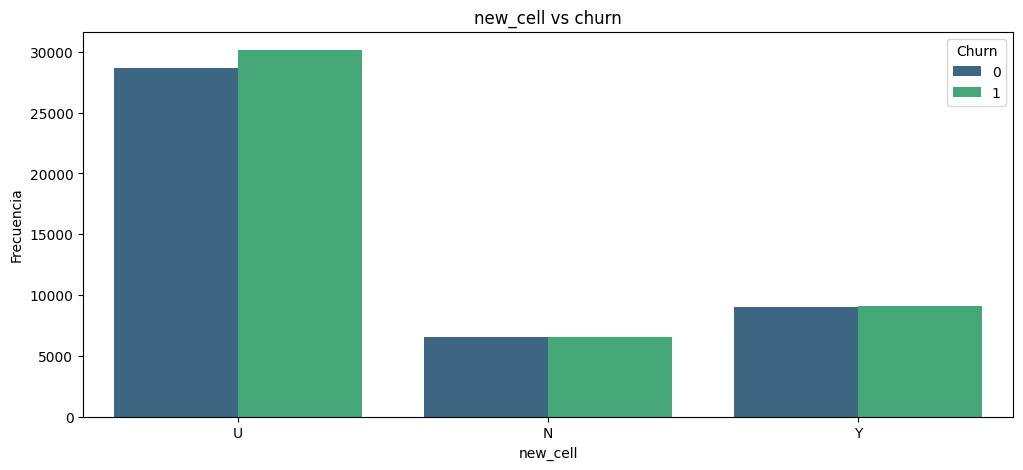

crclscod -  Credit class code


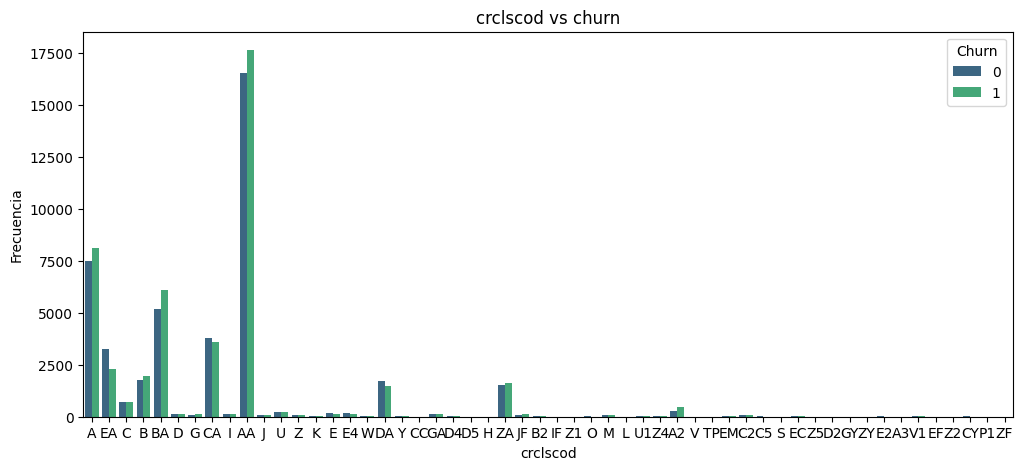

asl_flag -  Account spending limit


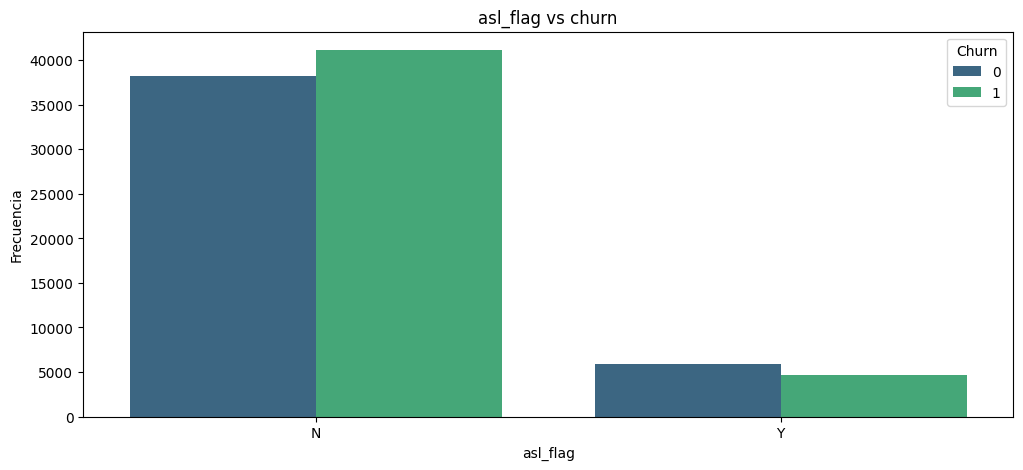

prizm_social_one -  Social group letter only


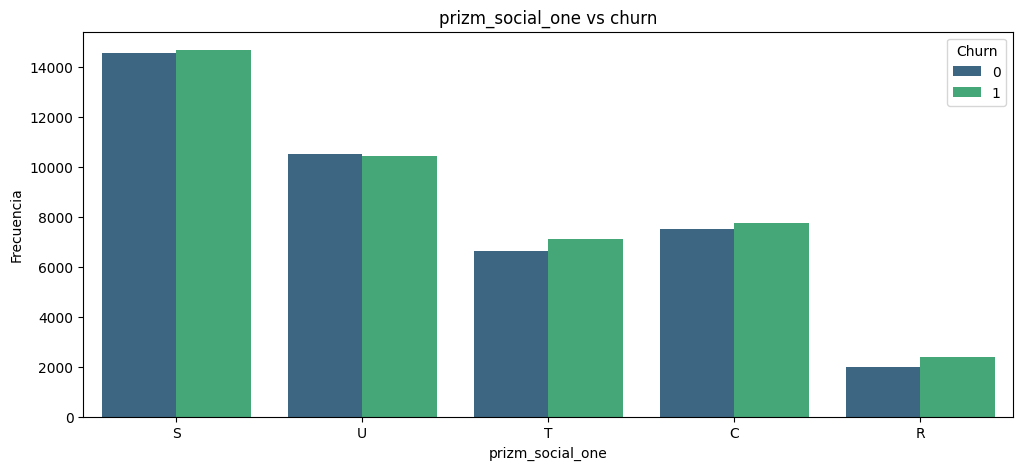

area -  Geogrpahic area


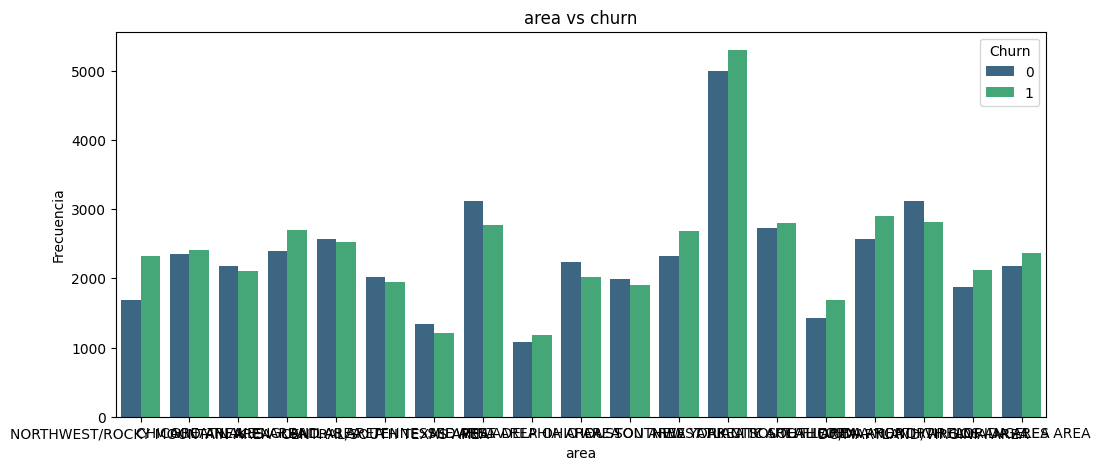

dualband -  Dualband


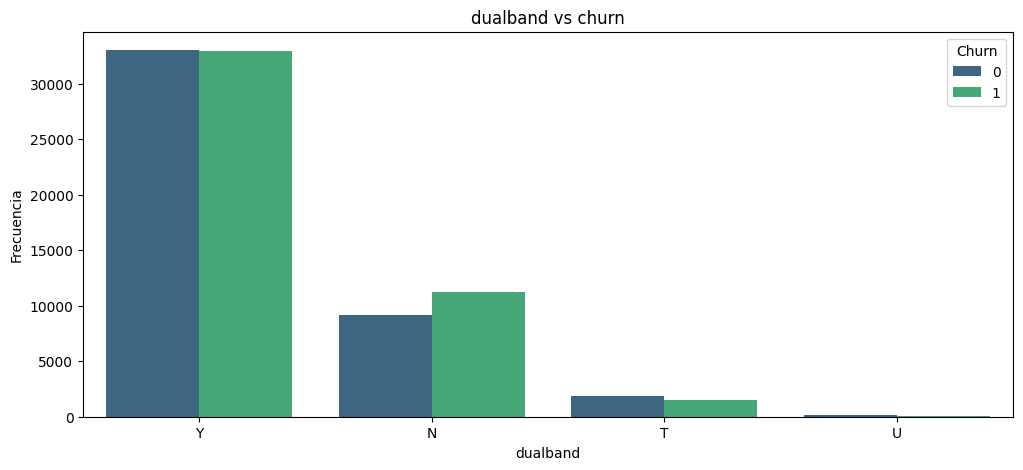

refurb_new -  Handset: refurbished or new


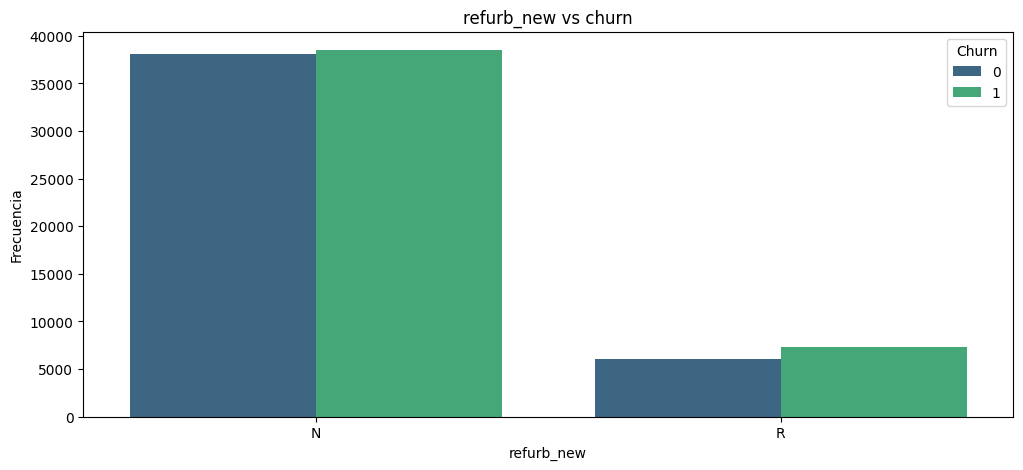

hnd_webcap -  Handset web capability


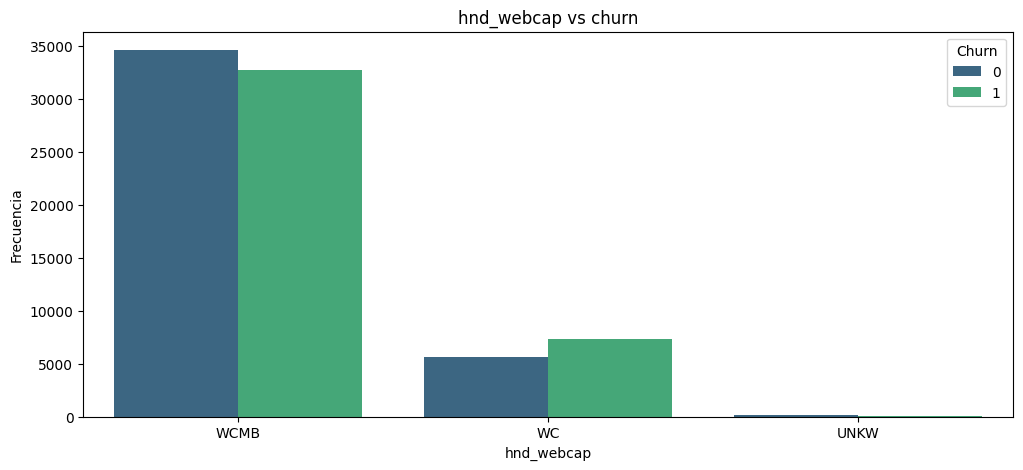

ownrent -  Home owner/renter status


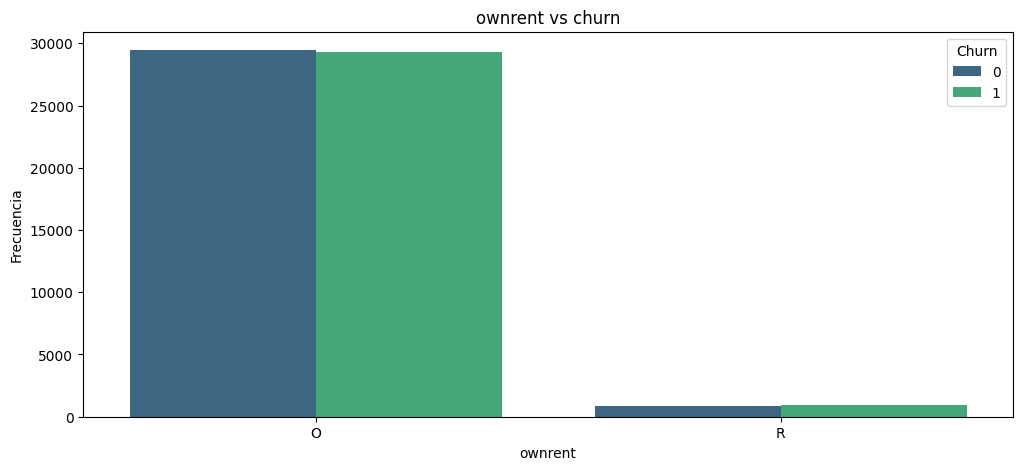

dwlltype -  Dwelling Unit type


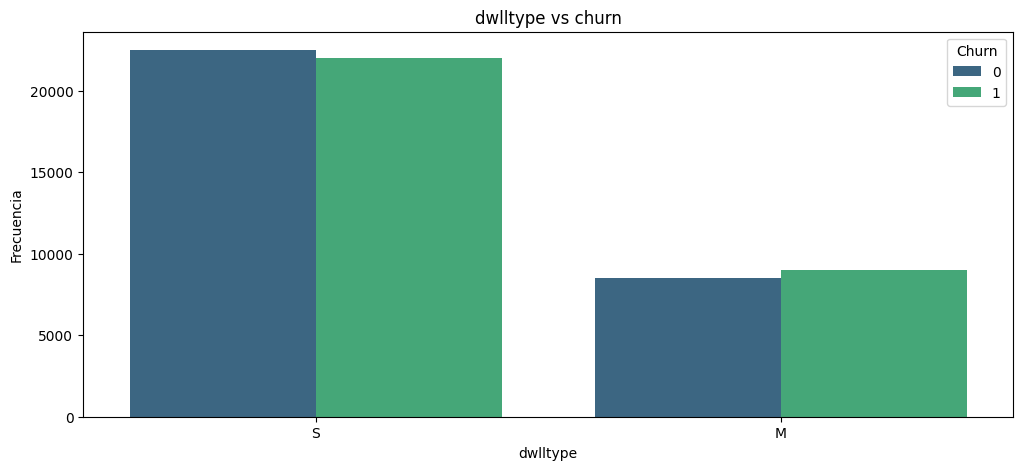

marital -  Marital Status


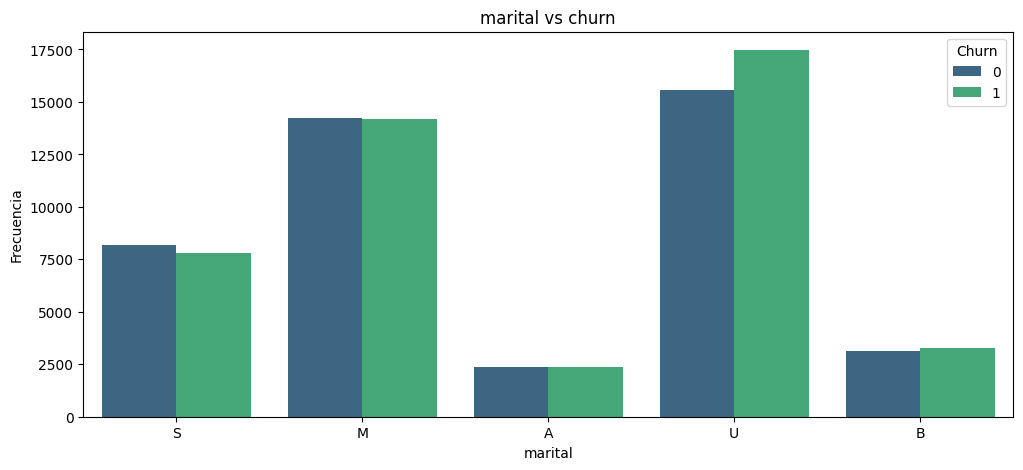

infobase -  InfoBase match


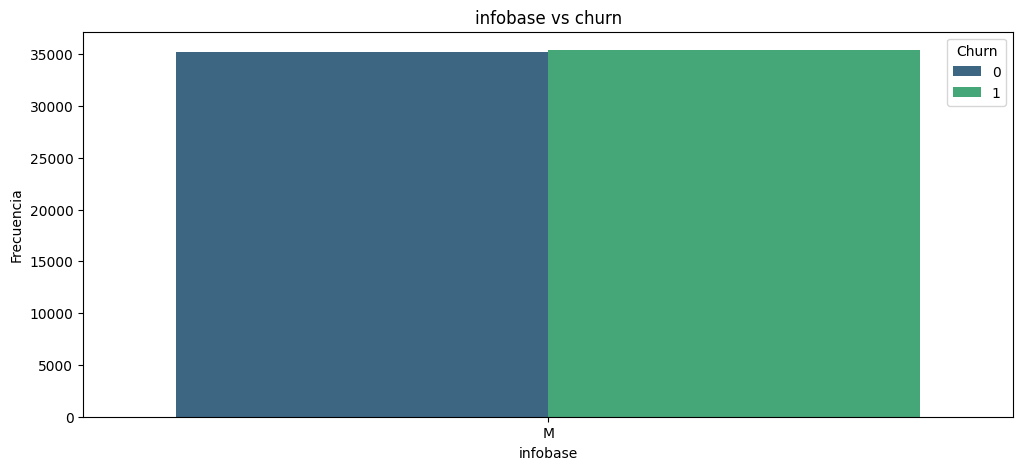

HHstatin -  Premier household status indicator


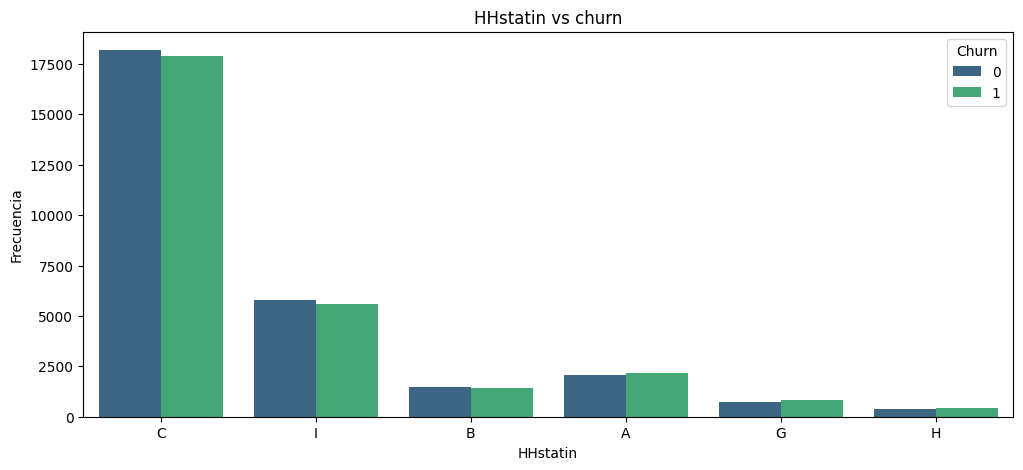

dwllsize -  Dwelling size


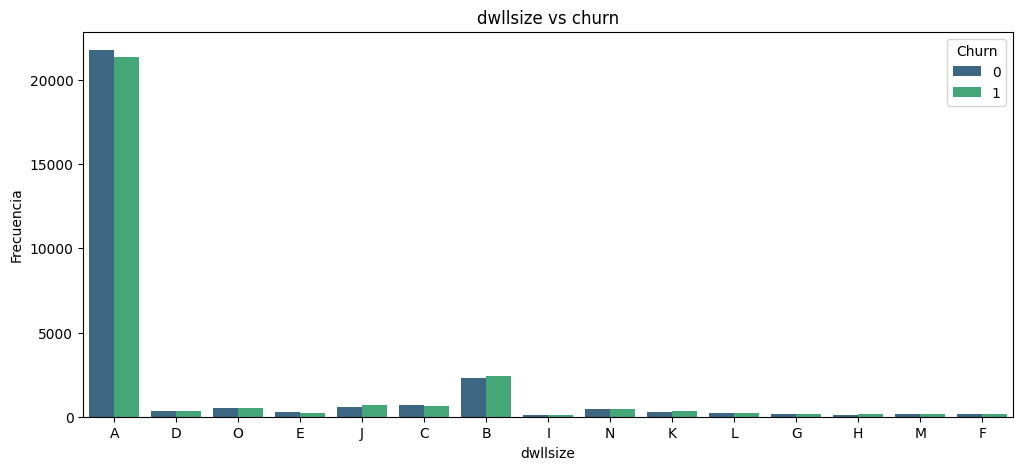

ethnic -  Ethnicity roll-up code


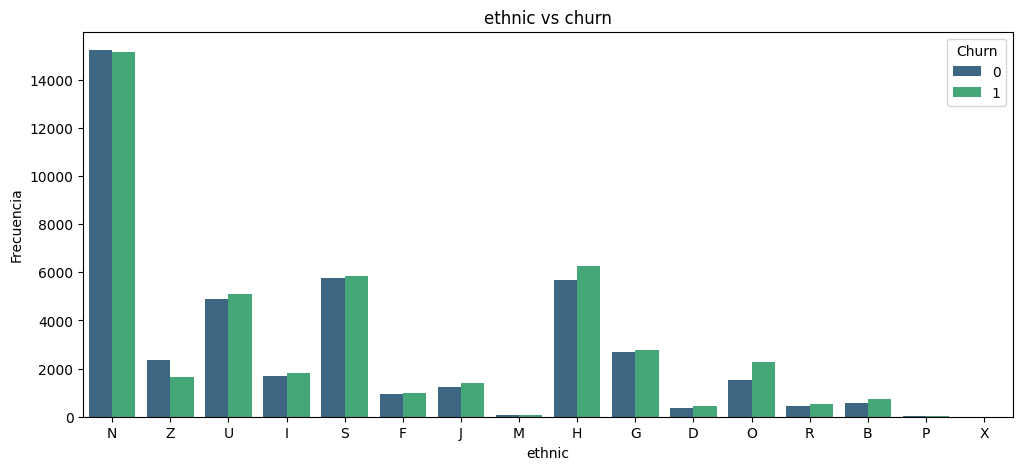

kid0_2 -  Child 0 - 2 years of age in household


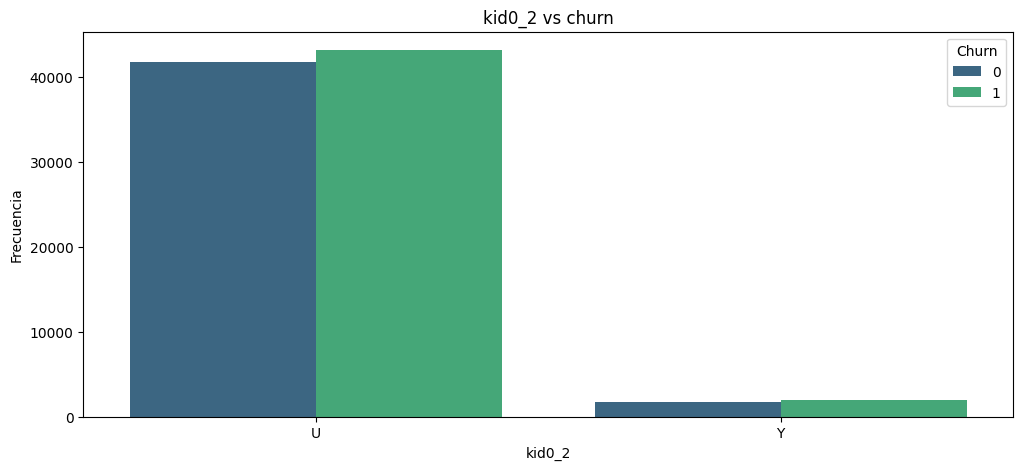

kid3_5 -  Child 3 - 5 years of age in household


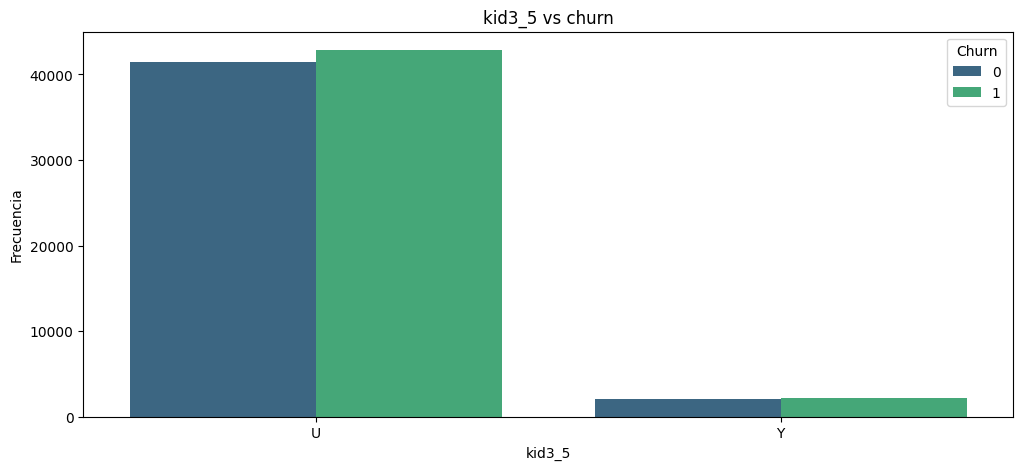

kid6_10 -  Child 6 - 10 years of age in household


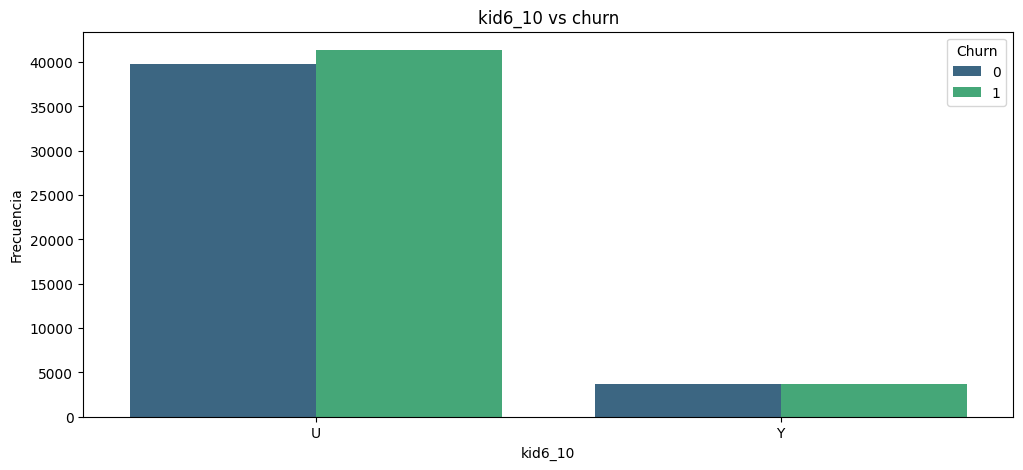

kid11_15 -  Child 11 - 15 years of age in household


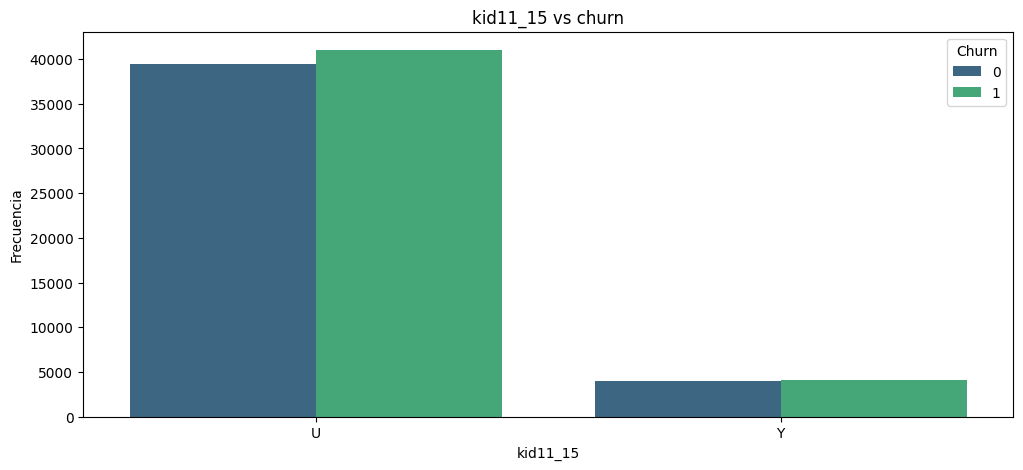

kid16_17 -  Child 16 - 17 years of age in household


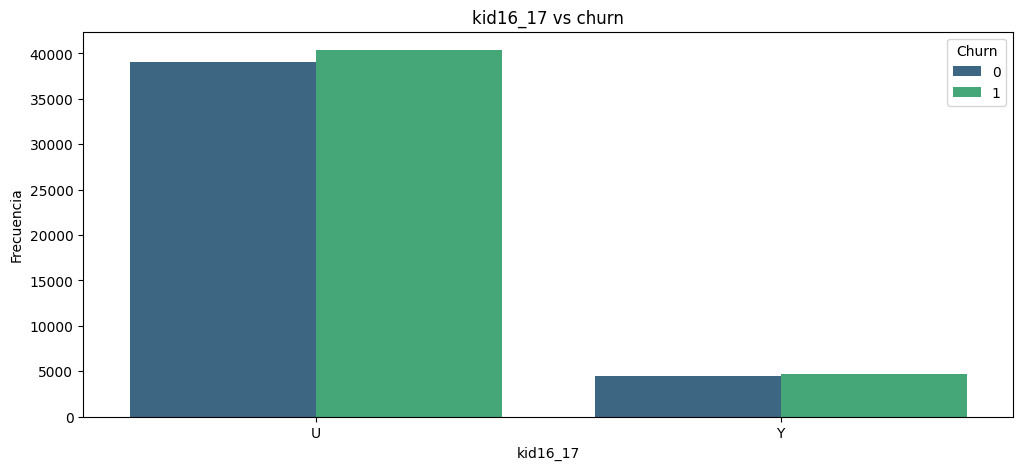

creditcd -  Credit card indicator


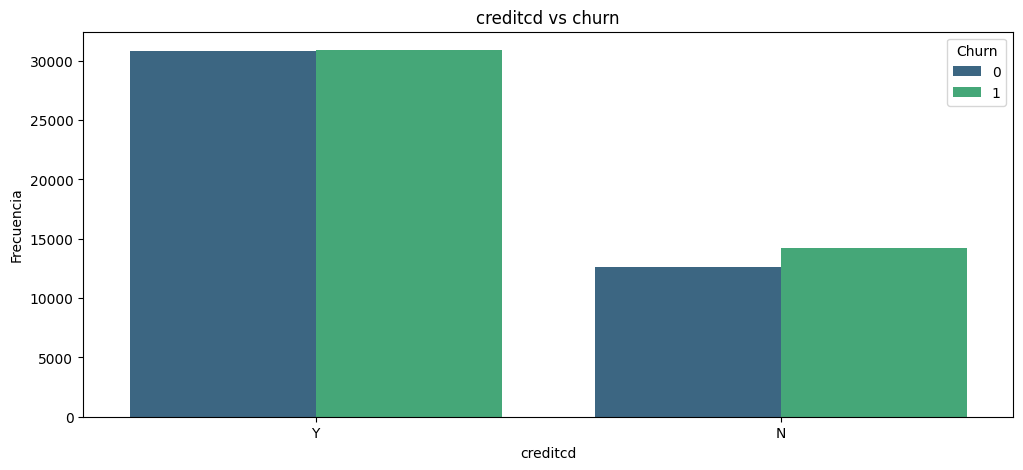

In [ ]:
data_vs_target(train, 'churn', columns_dict)

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [ ]:
train2 = train.copy()
print("Hacemos una copia de seguridad")

Hacemos una copia de seguridad


##### Eliminar filas sin target informado.

In [ ]:
print(f"Cantidad de filas con nulos en churn: {train2['churn'].isnull().sum()}")


Cantidad de filas con nulos en churn: 0


##### Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)

In [ ]:
train2.duplicated().sum()

0

In [ ]:
print(f"Cantidad de filas duplicadas: {train2.duplicated().sum()}")

Cantidad de filas duplicadas: 0


##### Eliminar filas/columnas vacías y columnas irrelevantes

In [ ]:
deleted_vars = set() #definimos un set para ir guardando el registro de variables eliminadas
total_filas_eliminadas = 0
def deleted_columns(actual, anterior):
    global deleted_vars, total_filas_eliminadas  # Usamos las variables globales para mantener el seguimiento acumulado

    columnas_anteriores = set(anterior.columns)
    columnas_actuales = set(actual.columns)
    c_eliminadas = columnas_anteriores - columnas_actuales
    filas_eliminadas = len(anterior) - len(actual)
    total_filas_eliminadas += filas_eliminadas
    pct_filas_eliminadas = round(total_filas_eliminadas / len(anterior) * 100, 2)
    deleted_vars.update(c_eliminadas)  # Actualizamos el conjunto con las nuevas columnas eliminadas

    print(f"""Columnas eliminadas: {len(deleted_vars)}
	Pct de filas eliminadas acumuladas: {pct_filas_eliminadas}%""")

    descrip(c_eliminadas)

    return deleted_vars

print("Esta funcion me muestra las columnas que he eliminado")

Esta funcion me muestra las columnas que he eliminado


In [ ]:
def resumen_columnas_desbalanceadas(df, diccionario, umbral=0.05):
    resumen = []

    for columna in df.columns:
        # Obtener la descripción de la columna del diccionario
        descripcion = diccionario.get(columna, "No disponible")

        # Calcular los value counts normalizados de la columna
        value_counts = df[columna].value_counts(normalize=True)

        # Obtener el valor máximo en los value counts
        max_value_count = value_counts.max()

        # Verificar si el valor máximo está por encima del umbral
        if max_value_count > umbral:
            # Contar la cantidad de valores únicos en la columna
            num_unicos = df[columna].nunique()

            # Añadir la información al resumen
            resumen.append({
                "Columna": columna,
                "Descripcion": descripcion,
                "Desbalanceado": max_value_count,
                "Cantidad Unicos": num_unicos
            })

    # Convertir el resumen a un DataFrame
    df_resumen = pd.DataFrame(resumen)

    # Ordenar el DataFrame por la columna 'Desbalanceado' de forma descendente
    df_resumen = df_resumen.sort_values(by="Desbalanceado", ascending=False)

    return df_resumen

print("Esta funcion identifica las variables altamente desbalanceadas")

Esta funcion identifica las variables altamente desbalanceadas


In [ ]:
unb_cols = resumen_columnas_desbalanceadas(train2, columns_dict, umbral=0.70)
print("Este dataframe muestra las variables altamente desbalanceadas (sobre el umbral definido)")
unb_cols

Este dataframe muestra las variables altamente desbalanceadas (sobre el umbral definido)


Columna                                        Descripcion  \
22    infobase                                     InfoBase match   
13    callfwdv               Mean number of call forwarding calls   
5     recv_sms                        Mean number of received sms   
2     blck_dat         Mean number of blocked (failed) data calls   
1     drop_dat         Mean number of dropped (failed) data calls   
20     ownrent                           Home owner/renter status   
3     unan_dat               Mean number of unanswered data calls   
25      kid0_2              Child 0 - 2 years of age in household   
26      kid3_5              Child 3 - 5 years of age in household   
24    forgntvl                      Foreign travel dummy variable   
27     kid6_10             Child 6 - 10 years of age in household   
10    mou_pead   Mean unrounded minutes of use of peak data calls   
9     peak_dat                     Mean number of peak data calls   
19          rv                                       RV indicator   
28    kid11_15            Child 11 - 15 years of age in household   
11     opk_dat                 Mean number of off-peak data calls   
12    mou_opkd   Mean unrounded minutes of use of off-peak dat...   
29    kid16_17            Child 16 - 17 years of age in household   
14    asl_flag                             Account spending limit   
8     mou_cdat   Mean unrounded minutes of use of completed da...   
6     comp_dat                Mean number of completed data calls   
0       datovr                       Mean revenue of data overage   
4     plcd_dat         Mean number of attempted data calls placed   
16  refurb_new                        Handset: refurbished or new   
17  hnd_webcap                             Handset web capability   
18       truck                                    Truck indicator   
23    dwllsize                                      Dwelling size   
7     threeway                     Mean number of three way calls   
15    dualband                                           Dualband   
21    dwlltype                                 Dwelling Unit type   

    Desbalanceado  Cantidad Unicos  
22       1.000000                1  
13       0.995744               40  
5        0.991300               90  
2        0.988244               45  
1        0.975356               58  
20       0.970583                2  
3        0.970378               47  
25       0.959220                2  
26       0.952106                2  
24       0.940745                2  
27       0.916961                2  
10       0.914533             2871  
9        0.914522              214  
19       0.913133                2  
28       0.909067                2  
11       0.908489              236  
12       0.908367             3182  
29       0.896893                2  
14       0.882233                2  
8        0.872300             3977  
6        0.872300              336  
0        0.871030              689  
4        0.857200              354  
16       0.851387                2  
17       0.837415                3  
18       0.802810                2  
23       0.766733               15  
7        0.739067               83  
15       0.733086                4  
21       0.717826                2

In [ ]:
cols_to_del = unb_cols['Columna'].to_list()
cols_to_del

['infobase',
 'callfwdv',
 'recv_sms',
 'blck_dat',
 'drop_dat',
 'ownrent',
 'unan_dat',
 'kid0_2',
 'kid3_5',
 'forgntvl',
 'kid6_10',
 'mou_pead',
 'peak_dat',
 'rv',
 'kid11_15',
 'opk_dat',
 'mou_opkd',
 'kid16_17',
 'asl_flag',
 'mou_cdat',
 'comp_dat',
 'datovr',
 'plcd_dat',
 'refurb_new',
 'hnd_webcap',
 'truck',
 'dwllsize',
 'threeway',
 'dualband',
 'dwlltype']

In [ ]:
train2.drop(columns=cols_to_del, axis=1, inplace=True)

In [ ]:
train2.shape

(90000, 70)

In [ ]:
print('Eliminamos la columna Customer_ID, en cuanto no es realmente una variable, sino un identificador unico por cada registro')
train2.drop('Customer_ID',axis=1,inplace=True)

Eliminamos la columna Customer_ID, en cuanto no es realmente una variable, sino un identificador unico por cada registro


In [ ]:
train2

rev     mou  totmrc      da  ovrmou  ovrrev  vceovr    roam  \
0       23.9975  219.25  22.500  0.2475    0.00   0.000     0.0  0.0000   
1       57.4925  482.75  37.425  0.2475   22.75   9.100     9.1  0.0000   
2       16.9900   10.25  16.990  0.0000    0.00   0.000     0.0  0.0000   
3       38.0000    7.50  38.000  0.0000    0.00   0.000     0.0  0.0000   
4       55.2300  570.50  71.980  0.0000    0.00   0.000     0.0  0.0000   
...         ...     ...     ...     ...     ...     ...     ...     ...   
89995  125.2700  936.25  79.990  0.0000  131.75  52.700    52.7  2.5800   
89996   72.7450  455.00  69.990  0.9900   29.50  11.765    10.4  0.0000   
89997   59.7300  830.50  59.990  0.7425   22.25   8.900     8.9  0.0975   
89998   53.1350  152.00  69.990  0.0000    0.00   0.000     0.0  3.1450   
89999   14.2000  164.25  10.000  0.0000   10.50   4.200     4.2  0.0000   

       change_mou  change_rev   drop_vce  blck_vce   unan_vce    plcd_vce  \
0         -157.25    -18.9975   0.666667  0.666667   6.333333   52.333333   
1          532.25     50.9875   8.333333  1.000000  61.333333  263.333333   
2           -4.25      0.0000   0.333333  0.000000   2.666667    9.000000   
3           -1.50      0.0000   0.000000  0.000000   0.000000    3.666667   
4           38.50      0.0000   9.666667  0.666667  77.000000  222.333333   
...           ...         ...        ...       ...        ...         ...   
89995      109.75    -22.5000  11.666667  1.666667  26.666667  221.666667   
89996     -241.00     -7.2950   2.666667  3.000000  42.333333  259.000000   
89997      159.50     -5.9500  12.666667  2.666667  54.000000  257.666667   
89998       62.00     -3.1450   3.000000  0.333333   4.333333   30.000000   
89999      -18.25     -4.2000   0.666667  5.666667  13.333333   48.666667   

         recv_vce    comp_vce  custcare   ccrndmou     cc_mou   inonemin  \
0       42.333333   45.000000  0.000000   0.000000   0.000000  18.000000   
1       69.000000  193.333333  1.666667   6.333333   5.463333  53.000000   
2        0.333333    6.000000  0.000000   0.000000   0.000000   0.333333   
3        1.333333    3.666667  0.000000   0.000000   0.000000   1.333333   
4       94.666667  137.000000  8.666667  15.000000  11.076667  66.000000   
...           ...         ...       ...        ...        ...        ...   
89995  102.666667  183.000000  0.333333   1.000000   0.766667  63.333333   
89996   63.666667  211.666667  0.000000   0.000000   0.000000  31.666667   
89997   75.000000  192.000000  0.333333   0.333333   0.250000  36.000000   
89998    7.666667   23.000000  1.333333  14.666667  13.666667   4.000000   
89999   25.666667   29.333333  0.666667   1.000000   0.423333  16.000000   

         mou_cvce    mou_rvce  owylis_vce  mouowylisv  iwylis_vce  mouiwylisv  \
0       90.643333   97.176667    0.000000    0.000000    0.000000    0.000000   
1      189.396667   55.280000   46.333333   24.216667    6.333333    3.696667   
2        5.426667    0.000000    0.000000    0.000000    0.000000    0.000000   
3        8.410000    0.413333    0.333333    0.256667    0.000000    0.000000   
4      285.233333  106.330000   14.666667   10.816667    0.666667    0.366667   
...           ...         ...         ...         ...         ...         ...   
89995  478.783333  224.973333   93.666667  180.833333   28.666667  144.496667   
89996  207.913333  105.433333   65.000000   50.750000   34.000000   67.190000   
89997  471.706667  222.053333   55.000000  116.556667   18.333333   77.033333   
89998   64.673333   23.043333    6.666667    9.993333    1.333333    3.380000   
89999   43.120000   39.876667   12.000000   17.860000   14.000000   25.443333   

         peak_vce    mou_peav     opk_vce    mou_opkv   drop_blk     attempt  \
0       58.000000  132.600000   24.000000   55.220000   1.333333   52.333333   
1       83.666667   75.333333  157.000000  169.343333   9.333333  263.333333   
2        5.000000    5.193333    1.000000    0.233333   0.33

In [ ]:
deleted_columns(train2, train)

Columnas eliminadas: 31
	Pct de filas eliminadas acumuladas: 0.0%
unan_dat:  Mean number of unanswered data calls
plcd_dat:  Mean number of attempted data calls placed
Customer_ID:  Customer ID (Primary key)
callfwdv:  Mean number of call forwarding calls
hnd_webcap:  Handset web capability
infobase:  InfoBase match
recv_sms:  Mean number of received sms
dwlltype:  Dwelling Unit type
opk_dat:  Mean number of off-peak data calls
kid0_2:  Child 0 - 2 years of age in household
truck:  Truck indicator
dwllsize:  Dwelling size
dualband:  Dualband
kid11_15:  Child 11 - 15 years of age in household
asl_flag:  Account spending limit
ownrent:  Home owner/renter status
comp_dat:  Mean number of completed data calls
drop_dat:  Mean number of dropped (failed) data calls
peak_dat:  Mean number of peak data calls
threeway:  Mean number of three way calls
mou_pead:  Mean unrounded minutes of use of peak data calls
forgntvl:  Foreign travel dummy variable
blck_dat:  Mean number of blocked (failed) dat

{'Customer_ID',
 'asl_flag',
 'blck_dat',
 'callfwdv',
 'comp_dat',
 'datovr',
 'drop_dat',
 'dualband',
 'dwllsize',
 'dwlltype',
 'forgntvl',
 'hnd_webcap',
 'infobase',
 'kid0_2',
 'kid11_15',
 'kid16_17',
 'kid3_5',
 'kid6_10',
 'mou_cdat',
 'mou_opkd',
 'mou_pead',
 'opk_dat',
 'ownrent',
 'peak_dat',
 'plcd_dat',
 'recv_sms',
 'refurb_new',
 'rv',
 'threeway',
 'truck',
 'unan_dat'}

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

##### Identificacion de nulos

In [ ]:
train3 = train2.copy()
print('Hacemos una copia de seguridad')

Hacemos una copia de seguridad


In [ ]:
def summarize_dataframe(df, dictionary):
    summary_data = { #creamos las listas
        'Column_Name': [],
        'Description': [],
        'Number_of_Nulls': [],
        'Pct_of_Nulls': [],
        'Mean': [],
        'Median': [],
        'Mode': []
    }

    total_rows = len(df)

    for column in df.columns: #iteramos sobre todo el dataset para sacar solos las columnas que tengan nulos
        null_count = df[column].isnull().sum()
        Pct_of_Nulls = (null_count / total_rows) * 100 #calculamos los porcentajes

        if null_count > 0: #Si tiene nulos, entonces comenzamos a llena rel diccionario
            summary_data['Column_Name'].append(column)
            summary_data['Description'].append(dictionary.get(column, 'No description available'))
            summary_data['Number_of_Nulls'].append(null_count)
            summary_data['Pct_of_Nulls'].append(Pct_of_Nulls)

            if df[column].dtype in ['int64', 'float64']:
                summary_data['Mean'].append(df[column].mean())
                summary_data['Median'].append(df[column].median())
                summary_data['Mode'].append(df[column].mode()[0] if not df[column].mode().empty else None)
            else:
                summary_data['Mean'].append(None)
                summary_data['Median'].append(None)
                summary_data['Mode'].append(df[column].mode()[0] if not df[column].mode().empty else None)


    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values(by='Number_of_Nulls', ascending=False).reset_index(drop=True)
    return summary_df
print("Esta funcion crea un Dataframe con los nulos, su procentaje y su mean, median y mode")

Esta funcion crea un Dataframe con los nulos, su procentaje y su mean, median y mode


In [ ]:
summarize_dataframe(train3, columns_dict)
nulos_dataset = summarize_dataframe(train3, columns_dict)
nulos_dataset

Column_Name                                        Description  \
0           numbcars                           Known number of vehicles   
1           HHstatin                 Premier household status indicator   
2                lor                                Length of residence   
3             income                                   Estimated income   
4             adults                      Number of adults in household   
5   prizm_social_one                           Social group letter only   
6           creditcd                              Credit card indicator   
7             ethnic                             Ethnicity roll-up code   
8            marital                                     Marital Status   
9            avg6mou   Average monthly minutes of use over the previ...   
10           avg6qty   Average monthly number of calls over the prev...   
11           avg6rev   Average monthly revenue over the previous six...   
12         hnd_price                              Current handset price   
13        change_mou   Percentage change in monthly minutes of use v...   
14        change_rev   Percentage change in monthly revenue vs previ...   
15               rev               Mean monthly revenue (charge amount)   
16               mou              Mean number of monthly minutes of use   
17              roam                       Mean number of roaming calls   
18            vceovr                      Mean revenue of voice overage   
19            ovrrev                               Mean overage revenue   
20            ovrmou                        Mean overage minutes of use   
21                da            Mean number of directory assisted calls   
22            totmrc                Mean total monthly recurring charge   
23              area                                    Geogrpahic area   
24            phones                          Number of handsets issued   
25            models                            Number of models issued   
26           eqpdays          Number of days (age) of current equipment   

    Number_of_Nulls  Pct_of_Nulls        Mean     Median                Mode  
0             43568     48.408889    1.568896    1.00000                 1.0  
1             33032     36.702222         NaN        NaN                   C  
2             26502     29.446667    6.180856    5.00000                 1.0  
3             22196     24.662222    5.809274    6.00000                 6.0  
4             20033     22.258889    2.538197    2.00000                 2.0  
5              6537      7.263333         NaN        NaN                   S  
6              1451      1.612222         NaN        NaN                   Y  
7              1451      1.612222         NaN        NaN                   N  
8              1451      1.612222         NaN        NaN                   U  
9              1407      1.563333  501.598490  356.00000                 0.0  
10             1407      1.563333  176.320082  125.00000                 0.0  
11             1407      1.563333   58.266691   49.00000                31.0  
12              704      0.782222   99.709575   99.98999            29.98999  
13              595      0.661111  -13.786987   -6.50000                 0.0  
14              595      0.661111   -1.074666   -0.31500                 0.0  
15              134      0.148889   58.312895   47.66750               29.99  
16              134      0.148889  504.277946  349.00000                 0.0  
17              134      0.148889    1.308197    0.00000                 0.0  
18              134      0.148889   13.046046    0.60000                 0.0  
19              134      0.148889   13.289932    0.90000                 0.0  
20              134      0.148889   40.798976    2.50000                 0.0  
21              134      0.148889    0.877813    0.24750                 0.0  
22              134      0.148889   45.880669   44.99000               44.99  
23          

In [ ]:
def plot_nulls(dataset):
	null_counts = dataset.isnull().sum()
	null_counts_df = null_counts.reset_index()
	null_counts_df.columns = ['Column', 'Null Count']
	null_counts_df = null_counts_df[null_counts_df['Null Count'] > 0]
	plt.figure(figsize=(10, 6))
	sns.barplot(data=null_counts_df, x='Column', y='Null Count', palette='viridis')
	plt.xticks(rotation=90)
	plt.title('Cantidad de valores nulos por columna')
	plt.xlabel('Columnas')
	plt.ylabel('Cantidad de valores nulos')
	plt.show()

print("Esta funcion plotea los nulos")

Esta funcion plotea los nulos


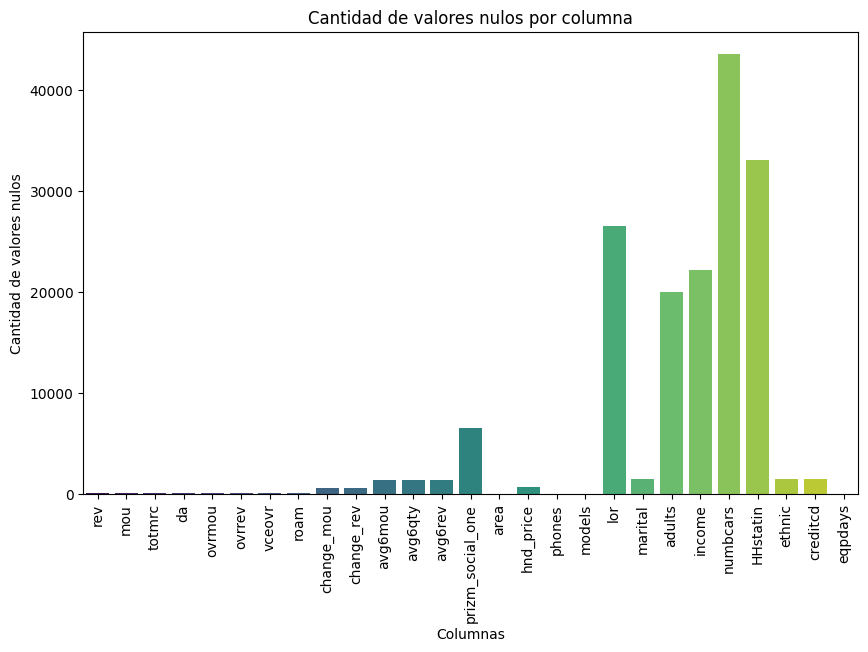

In [ ]:
plot_nulls(train3)

##### Eliminar todas las filas que tienen menos del 5% de nulos

In [ ]:
print("""Decidimos, por simplicidad de ejecución, borrar todas las filas que tienen nulos en columnas cuyo porcentaje total de nulos es <5%.

Dado que no podremos eliminar filas en el dataset a predecir, hemos decidio que en este último, a todos los nulos de columnas para las cuales no haya sido explicitado un
criterio especifico en el dataset de train, se le imputarà la moda.""")

Decidimos, por simplicidad de ejecución, borrar todas las filas que tienen nulos en columnas cuyo porcentaje total de nulos es <5%.

Dado que no podremos eliminar filas en el dataset a predecir, hemos decidio que en este último, a todos los nulos de columnas para las cuales no haya sido explicitado un
criterio especifico en el dataset de train, se le imputarà la moda.


In [ ]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = train3.isnull().mean()
porcentaje_nulos

rev         0.001489
mou         0.001489
totmrc      0.001489
da          0.001489
ovrmou      0.001489
              ...   
numbcars    0.484089
HHstatin    0.367022
ethnic      0.016122
creditcd    0.016122
eqpdays     0.000011
Length: 69, dtype: float64

In [ ]:
# Identificar las columnas que tienen un porcentaje de nulos menor al umbral
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos < 0.05].index
columnas_a_eliminar

Index(['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'roam',
       'change_mou', 'change_rev', 'drop_vce', 'blck_vce', 'unan_vce',
       'plcd_vce', 'recv_vce', 'comp_vce', 'custcare', 'ccrndmou', 'cc_mou',
       'inonemin', 'mou_cvce', 'mou_rvce', 'owylis_vce', 'mouowylisv',
       'iwylis_vce', 'mouiwylisv', 'peak_vce', 'mou_peav', 'opk_vce',
       'mou_opkv', 'drop_blk', 'attempt', 'complete', 'callwait', 'churn',
       'months', 'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'totcalls',
       'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou',
       'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty',
       'avg6rev', 'area', 'hnd_price', 'phones', 'models', 'marital', 'ethnic',
       'creditcd', 'eqpdays'],
      dtype='object')

In [ ]:
# Eliminar filas que contienen valores nulos en las columnas seleccionadas
train3 = train3.dropna(subset=columnas_a_eliminar)
train3.reset_index(drop=True,inplace=True)
print('Eliminadas las filas que tienen nulos en columnas cuyo porcentaje total de nulos es <5%.')

Eliminadas las filas que tienen nulos en columnas cuyo porcentaje total de nulos es <5%.


In [ ]:
summarize_dataframe(train3, columns_dict)
nulos_dataset2 = summarize_dataframe(train3, columns_dict)
nulos_dataset2

Column_Name                          Description  Number_of_Nulls  \
0          numbcars             Known number of vehicles            40723   
1          HHstatin   Premier household status indicator            30445   
2               lor                  Length of residence            24140   
3            income                     Estimated income            19954   
4            adults        Number of adults in household            17875   
5  prizm_social_one             Social group letter only             5755   

   Pct_of_Nulls      Mean  Median Mode  
0     47.393657  1.568647     1.0  1.0  
1     35.432063       NaN     NaN    C  
2     28.094268  6.174492     5.0  1.0  
3     23.222578  5.811766     6.0  6.0  
4     20.803026  2.537663     2.0  2.0  
5      6.697701       NaN     NaN    S

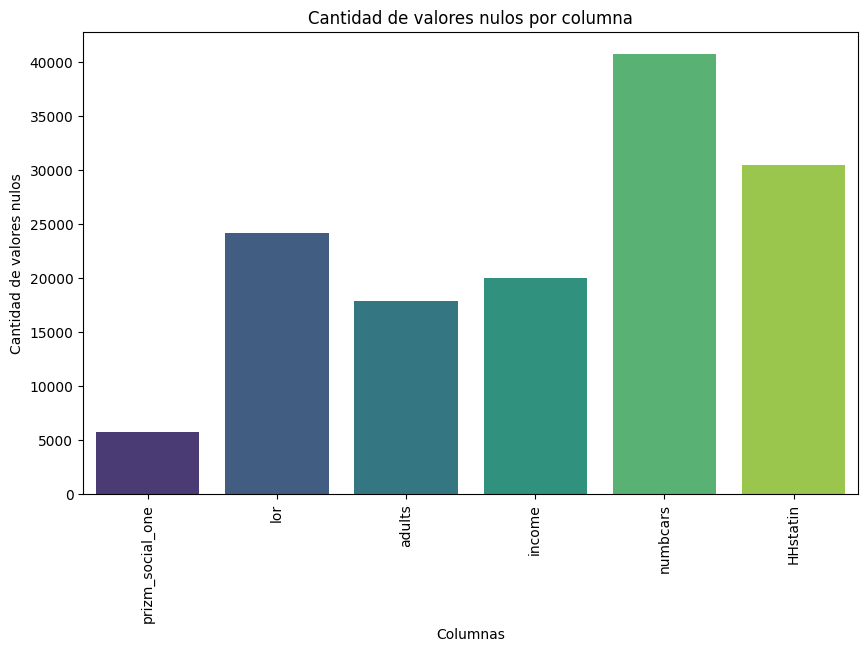

In [ ]:
plot_nulls(train3)

##### numbcars - Imputado valor 0

In [ ]:
train3['numbcars'].fillna(0.0,inplace=True)
print("Asumiendo que los nulos en numbcars significan que NO tienen coches, lo reemplazamos por 0")

Asumiendo que los nulos en numbcars significan que NO tienen coches, lo reemplazamos por 0


In [ ]:
train3['numbcars'].value_counts(normalize=True)*100

numbcars
0.0    47.393657
1.0    26.615071
2.0    22.068083
3.0     3.923189
Name: proportion, dtype: float64

##### HHstatin - fillna metodo pad

In [ ]:
train3['HHstatin'].value_counts(normalize=True)*100

HHstatin
C    63.424658
I    19.981975
A     7.328767
B     5.086518
G     2.737924
H     1.440159
Name: proportion, dtype: float64

In [ ]:
train3['HHstatin'].fillna(method='pad', inplace=True)
print("Para mantener una distribucion real, hemos hecho un fillna con metodo pad")

Para mantener una distribucion real, hemos hecho un fillna con metodo pad


In [ ]:
train3['HHstatin'].value_counts(normalize=True)*100

HHstatin
C    63.226069
I    20.054699
A     7.491417
B     5.125400
G     2.670934
H     1.431481
Name: proportion, dtype: float64

##### lor - fillna metodo pad

In [ ]:
train3['lor'].value_counts(normalize=True)*100

lor
1.0     14.476006
2.0     12.750668
15.0    11.740714
3.0      8.356397
4.0      7.762402
5.0      7.001699
6.0      6.410941
7.0      6.139031
8.0      5.234280
9.0      4.240511
10.0     3.324431
0.0      3.185239
11.0     2.863154
12.0     2.414826
13.0     2.356559
14.0     1.743142
Name: proportion, dtype: float64

In [ ]:
train3['lor'].fillna(method='pad', inplace=True)
print("Para mantener una distribucion real hemos hecho un fillna con metodo pad")

Para mantener una distribucion real hemos hecho un fillna con metodo pad


In [ ]:
train3['lor'].value_counts(normalize=True)*100

lor
1.0     14.660460
2.0     12.842595
15.0    11.584521
3.0      8.347978
4.0      7.805644
5.0      6.917661
6.0      6.312482
7.0      6.072738
8.0      5.277859
9.0      4.304917
10.0     3.327320
0.0      3.189991
11.0     2.853651
12.0     2.370672
13.0     2.357870
14.0     1.773640
Name: proportion, dtype: float64

##### income - fillna metodo pad

In [ ]:
train3['income'].value_counts(normalize=True)*100

income
6.0    25.295963
7.0    15.673554
9.0    14.832275
5.0    10.988161
4.0    10.392445
3.0     7.707932
8.0     6.927286
1.0     5.221991
2.0     2.960392
Name: proportion, dtype: float64

In [ ]:
train3['income'].fillna(method='pad', inplace=True)
print("Para mantener una distribucion real hemos hecho un fillna con metodo pad")

Para mantener una distribucion real hemos hecho un fillna con metodo pad


In [ ]:
train3['income'].value_counts(normalize=True)*100

income
6.0    25.332557
7.0    15.643875
9.0    14.746581
5.0    11.031714
4.0    10.392784
3.0     7.785860
8.0     6.860634
1.0     5.246436
2.0     2.959558
Name: proportion, dtype: float64

##### adults - fillna metodo pad

In [ ]:
train3['adults'].value_counts(normalize=True)

adults
2.0    0.301514
1.0    0.286025
3.0    0.177502
4.0    0.115342
5.0    0.062968
6.0    0.056650
Name: proportion, dtype: float64

In [ ]:
train3['adults'].fillna(method='pad', inplace=True)
print("Para mantener una distribucion real hemos hecho un fillna con metodo pad")

Para mantener una distribucion real hemos hecho un fillna con metodo pad


In [ ]:
train3['adults'].value_counts(normalize=True)

adults
2.0    0.299738
1.0    0.287960
3.0    0.177236
4.0    0.114600
5.0    0.063311
6.0    0.057154
Name: proportion, dtype: float64

##### prizm_social_one - fillna metodo pad

In [ ]:
train3['prizm_social_one'].value_counts(normalize=True)*100

prizm_social_one
S    35.004366
U    25.060496
C    18.196333
T    16.478733
R     5.260072
Name: proportion, dtype: float64

In [ ]:
train3['prizm_social_one'].fillna(method='pad', inplace=True)
print("Para mantener una distribucion real hemos hecho un fillna con metodo pad")

Para mantener una distribucion real hemos hecho un fillna con metodo pad


In [ ]:
train3['prizm_social_one'].value_counts(normalize=True)*100

prizm_social_one
S    34.917661
U    25.116090
C    18.194937
T    16.458539
R     5.312773
Name: proportion, dtype: float64

##### Dataset sin nulos

In [ ]:
train3.shape

(85925, 69)

In [ ]:
train3.isnull().sum().sum()

0

In [ ]:
deleted_columns(train3, train2)

Columnas eliminadas: 31
	Pct de filas eliminadas acumuladas: 4.53%


{'Customer_ID',
 'asl_flag',
 'blck_dat',
 'callfwdv',
 'comp_dat',
 'datovr',
 'drop_dat',
 'dualband',
 'dwllsize',
 'dwlltype',
 'forgntvl',
 'hnd_webcap',
 'infobase',
 'kid0_2',
 'kid11_15',
 'kid16_17',
 'kid3_5',
 'kid6_10',
 'mou_cdat',
 'mou_opkd',
 'mou_pead',
 'opk_dat',
 'ownrent',
 'peak_dat',
 'plcd_dat',
 'recv_sms',
 'refurb_new',
 'rv',
 'threeway',
 'truck',
 'unan_dat'}

In [ ]:
print("""Se nota que despues de eliminar los nulos hemos borrado el 4.53% de los registros iniciales.
Vista la grande cantidad de registros disponibles, consideramos aceptable esa perdida. """)

Se nota que despues de eliminar los nulos hemos borrado el 4.53% de los registros iniciales.
Vista la grande cantidad de registros disponibles, consideramos aceptable esa perdida. 


# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [ ]:
train4 = train3.copy()
print('Hacemos una copia de seguridad')

Hacemos una copia de seguridad


In [ ]:
obj_cols = train4.select_dtypes('O')
print("Exploramos las variables Object")
obj_cols

Exploramos las variables Object


new_cell crclscod prizm_social_one                           area  \
0            U        A                S  NORTHWEST/ROCKY MOUNTAIN AREA   
1            Y        C                S               GREAT LAKES AREA   
2            Y        B                T                   CHICAGO AREA   
3            Y        A                U               NEW ENGLAND AREA   
4            Y        C                U               GREAT LAKES AREA   
...        ...      ...              ...                            ...   
85920        U       AA                R      DC/MARYLAND/VIRGINIA AREA   
85921        U       AA                S      DC/MARYLAND/VIRGINIA AREA   
85922        Y       AA                T                   MIDWEST AREA   
85923        Y       AA                S                   HOUSTON AREA   
85924        Y       AA                R               GREAT LAKES AREA   

      marital HHstatin ethnic creditcd  
0           S        C      N        Y  
1           M        C      N        Y  
2           M        C      U        Y  
3           S        C      I        Y  
4           S        C      U        Y  
...       ...      ...    ...      ...  
85920       A        C      S        Y  
85921       A        I      U        Y  
85922       A        I      U        Y  
85923       M        B      F        Y  
85924       S        I      N        Y  

[85925 rows x 8 columns]

In [ ]:
def determinar_encoding(df):
    resumen = []

    for columna in df.columns:
        unique_values = df[columna].unique()
        num_unicos = len(unique_values)
        descripcion = columns_dict[columna]

        # Si la columna tiene valores numéricos, podría ser ordinal
        if pd.api.types.is_numeric_dtype(df[columna]):
            encoding = "Ordinal (Numeric Scale)"
        # Si tiene exactamente 2 clases, usar indicador booleano
        elif num_unicos == 2:
            encoding = "Indicador Bool"
        # Si tiene más de 2 clases, usar One Hot Encoding
        else:
            encoding = "One Hot Encoding"

        resumen.append({
            "Columna": columna,
            "Descripcion":descripcion,
            "Encoding Sugerido": encoding
        })

    df_resumen = pd.DataFrame(resumen)

    return df_resumen

print("""Esta funcion toma el dataset y muestra sugerencias de encoding para cada variable de tipo object.
De todas formas, algunas columnas marcadas como One Hot Encoding podrian tener un sentido ordinal.
La descripcion, junta con nuestra analisis previa, nos ayuda a decidir cuales variables estudiar màs en detalle""")

Esta funcion toma el dataset y muestra sugerencias de encoding para cada variable de tipo object.
De todas formas, algunas columnas marcadas como One Hot Encoding podrian tener un sentido ordinal.
La descripcion, junta con nuestra analisis previa, nos ayuda a decidir cuales variables estudiar màs en detalle


In [ ]:
determinar_encoding(obj_cols)

Columna                          Descripcion Encoding Sugerido
0          new_cell                  New cell phone user  One Hot Encoding
1          crclscod                    Credit class code  One Hot Encoding
2  prizm_social_one             Social group letter only  One Hot Encoding
3              area                      Geogrpahic area  One Hot Encoding
4           marital                       Marital Status  One Hot Encoding
5          HHstatin   Premier household status indicator  One Hot Encoding
6            ethnic               Ethnicity roll-up code  One Hot Encoding
7          creditcd                Credit card indicator    Indicador Bool

##### creditcd - Indicador Boolean

In [ ]:
train4['creditcd'].value_counts()

creditcd
Y    60057
N    25868
Name: count, dtype: int64

In [ ]:
train4['creditcd'] = train4['creditcd'].map({'Y':1, 'N':0})
train4['creditcd'].value_counts()

creditcd
1    60057
0    25868
Name: count, dtype: int64

##### crclscod - Ordinal Encoding

In [ ]:
train4['crclscod'].value_counts()

crclscod
AA    32870
A     15235
BA    10709
CA     7007
EA     5234
B      3635
ZA     3028
DA     3018
C      1382
A2      724
U       404
E       320
E4      254
GA      246
D       229
G       226
JF      186
Z       177
M       150
C2      136
I        99
D4       87
W        81
Z4       69
U1       54
EM       44
V1       43
B2       36
EC       25
O        23
J        22
CY       19
E2       19
CC       16
D5       15
K        14
C5       14
ZY       10
Z1       10
Y        10
Z5        8
H         7
D2        5
GY        5
TP        5
Z2        4
A3        3
IF        3
EF        2
V         1
P1        1
ZF        1
Name: count, dtype: int64

Para crclscod, creemos que es razonable utilizar Ordinal Encoding, ya que las categorias se pueden ordenar.

In [ ]:
train4['crclscod']=train4['crclscod'].map(lambda x:x[0])
print('En la columna "crclscod" se han agrupado las clases en función de la primera letra de cada clase. Ejemplo: A,AA,A2,A3 ---> A')

En la columna "crclscod" se han agrupado las clases en función de la primera letra de cada clase. Ejemplo: A,AA,A2,A3 ---> A


In [ ]:
train4['crclscod'].value_counts()

crclscod
A    48832
B    14380
C     8574
E     5898
D     3354
Z     3307
G      477
U      458
J      208
M      150
I      102
W       81
V       44
O       23
K       14
Y       10
H        7
T        5
P        1
Name: count, dtype: int64

In [ ]:
crclscod_sorted_values = list(train4['crclscod'].unique())
crclscod_sorted_values.sort()
print(crclscod_sorted_values)

['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'M', 'O', 'P', 'T', 'U', 'V', 'W', 'Y', 'Z']


In [ ]:
oe_crclscod = OrdinalEncoder(categories=[crclscod_sorted_values])
oe_crclscod

OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K',
                            'M', 'O', 'P', 'T', 'U', 'V', 'W', 'Y', 'Z']])

In [ ]:
train4["crclscod"]=oe_crclscod.fit_transform(train4[['crclscod']])

In [ ]:
train4['crclscod'].value_counts()

crclscod
0.0     48832
1.0     14380
2.0      8574
4.0      5898
3.0      3354
18.0     3307
5.0       477
14.0      458
8.0       208
10.0      150
7.0       102
16.0       81
15.0       44
11.0       23
9.0        14
17.0       10
6.0         7
13.0        5
12.0        1
Name: count, dtype: int64

##### area - Limpieza formato

In [ ]:
train4.select_dtypes('O')

new_cell prizm_social_one                           area marital  \
0            U                S  NORTHWEST/ROCKY MOUNTAIN AREA       S   
1            Y                S               GREAT LAKES AREA       M   
2            Y                T                   CHICAGO AREA       M   
3            Y                U               NEW ENGLAND AREA       S   
4            Y                U               GREAT LAKES AREA       S   
...        ...              ...                            ...     ...   
85920        U                R      DC/MARYLAND/VIRGINIA AREA       A   
85921        U                S      DC/MARYLAND/VIRGINIA AREA       A   
85922        Y                T                   MIDWEST AREA       A   
85923        Y                S                   HOUSTON AREA       M   
85924        Y                R               GREAT LAKES AREA       S   

      HHstatin ethnic  
0            C      N  
1            C      N  
2            C      U  
3            C      I  
4            C      U  
...        ...    ...  
85920        C      S  
85921        I      U  
85922        I      U  
85923        B      F  
85924        I      N  

[85925 rows x 6 columns]

In [ ]:
train4['area']

0        NORTHWEST/ROCKY MOUNTAIN AREA
1                     GREAT LAKES AREA
2                         CHICAGO AREA
3                     NEW ENGLAND AREA
4                     GREAT LAKES AREA
                     ...              
85920        DC/MARYLAND/VIRGINIA AREA
85921        DC/MARYLAND/VIRGINIA AREA
85922                     MIDWEST AREA
85923                     HOUSTON AREA
85924                 GREAT LAKES AREA
Name: area, Length: 85925, dtype: object

In [ ]:
train4['area'] = train4['area'].str.strip().str.replace(' AREA', '')
print('Eliminamos la palabra "area" en cada observación de la columna "area" porque es redundante')

Eliminamos la palabra "area" en cada observación de la columna "area" porque es redundante


In [ ]:
train4['area']

0        NORTHWEST/ROCKY MOUNTAIN
1                     GREAT LAKES
2                         CHICAGO
3                     NEW ENGLAND
4                     GREAT LAKES
                   ...           
85920        DC/MARYLAND/VIRGINIA
85921        DC/MARYLAND/VIRGINIA
85922                     MIDWEST
85923                     HOUSTON
85924                 GREAT LAKES
Name: area, Length: 85925, dtype: object

In [ ]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85925 entries, 0 to 85924
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               85925 non-null  float64
 1   mou               85925 non-null  float64
 2   totmrc            85925 non-null  float64
 3   da                85925 non-null  float64
 4   ovrmou            85925 non-null  float64
 5   ovrrev            85925 non-null  float64
 6   vceovr            85925 non-null  float64
 7   roam              85925 non-null  float64
 8   change_mou        85925 non-null  float64
 9   change_rev        85925 non-null  float64
 10  drop_vce          85925 non-null  float64
 11  blck_vce          85925 non-null  float64
 12  unan_vce          85925 non-null  float64
 13  plcd_vce          85925 non-null  float64
 14  recv_vce          85925 non-null  float64
 15  comp_vce          85925 non-null  float64
 16  custcare          85925 non-null  float6

##### One Hot Enconding

In [ ]:
train4 = pd.get_dummies(train4,dtype=int)
print("Hacemos el One Hot Encoding en las variables tipo Object que quedan")

Hacemos el One Hot Encoding en las variables tipo Object que quedan


In [ ]:
train4.shape

(85925, 117)

In [ ]:
train4

rev      mou  totmrc      da  ovrmou  ovrrev  vceovr    roam  \
0       23.9975   219.25   22.50  0.2475    0.00   0.000     0.0  0.0000   
1       16.9900    10.25   16.99  0.0000    0.00   0.000     0.0  0.0000   
2       38.0000     7.50   38.00  0.0000    0.00   0.000     0.0  0.0000   
3       55.2300   570.50   71.98  0.0000    0.00   0.000     0.0  0.0000   
4       82.2750  1312.25   75.00  1.2375    0.00   0.000     0.0  0.0000   
...         ...      ...     ...     ...     ...     ...     ...     ...   
85920   21.9475   140.00   10.00  0.2475   29.25  11.700    11.7  0.0000   
85921  125.2700   936.25   79.99  0.0000  131.75  52.700    52.7  2.5800   
85922   72.7450   455.00   69.99  0.9900   29.50  11.765    10.4  0.0000   
85923   59.7300   830.50   59.99  0.7425   22.25   8.900     8.9  0.0975   
85924   53.1350   152.00   69.99  0.0000    0.00   0.000     0.0  3.1450   

       change_mou  change_rev   drop_vce  blck_vce   unan_vce    plcd_vce  \
0         -157.25    -18.9975   0.666667  0.666667   6.333333   52.333333   
1           -4.25      0.0000   0.333333  0.000000   2.666667    9.000000   
2           -1.50      0.0000   0.000000  0.000000   0.000000    3.666667   
3           38.50      0.0000   9.666667  0.666667  77.000000  222.333333   
4          156.75      8.1450  52.000000  7.666667  76.000000  702.000000   
...           ...         ...        ...       ...        ...         ...   
85920      123.00     -4.9575   1.000000  1.333333   4.666667   25.333333   
85921      109.75    -22.5000  11.666667  1.666667  26.666667  221.666667   
85922     -241.00     -7.2950   2.666667  3.000000  42.333333  259.000000   
85923      159.50     -5.9500  12.666667  2.666667  54.000000  257.666667   
85924       62.00     -3.1450   3.000000  0.333333   4.333333   30.000000   

         recv_vce    comp_vce  custcare   ccrndmou     cc_mou    inonemin  \
0       42.333333   45.000000  0.000000   0.000000   0.000000   18.000000   
1        0.333333    6.000000  0.000000   0.000000   0.000000    0.333333   
2        1.333333    3.666667  0.000000   0.000000   0.000000    1.333333   
3       94.666667  137.000000  8.666667  15.000000  11.076667   66.000000   
4      365.000000  577.333333  4.333333  11.000000   7.753333  301.666667   
...           ...         ...       ...        ...        ...         ...   
85920    4.666667   18.333333  0.000000   0.000000   0.000000    2.000000   
85921  102.666667  183.000000  0.333333   1.000000   0.766667   63.333333   
85922   63.666667  211.666667  0.000000   0.000000   0.000000   31.666667   
85923   75.000000  192.000000  0.333333   0.333333   0.250000   36.000000   
85924    7.666667   23.000000  1.333333  14.666667  13.666667    4.000000   

         mou_cvce    mou_rvce  owylis_vce  mouowylisv  iwylis_vce  mouiwylisv  \
0       90.643333   97.176667    0.000000    0.000000    0.000000    0.000000   
1        5.426667    0.000000    0.000000    0.000000    0.000000    0.000000   
2        8.410000    0.413333    0.333333    0.256667    0.000000    0.000000   
3      285.233333  106.330000   14.666667   10.816667    0.666667    0.366667   
4      369.536667  200.320000  370.333333  243.213333  147.000000   85.146667   
...           ...         ...         ...         ...         ...         ...   
85920   19.100000   10.856667    4.666667    3.126667    2.000000    8.566667   
85921  478.783333  224.973333   93.666667  180.833333   28.666667  144.496667   
85922  207.913333  105.433333   65.000000   50.750000   34.000000   67.190000   
85923  471.706667  222.053333   55.000000  116.556667   18.333333   77.033333   
85924   64.673333   23.043333    6.666667    9.993333    1.333333    3.380000   

         peak_vce    mou_peav     opk_vce    mou_opkv   drop_blk     attempt  \
0       58.000000  132.600000   24.000000   55.220000   1.333333   52.333333   
1        5.000000    5.193333    1.000000    0.233333   0.333333    9.000000   
2        1.333333    3.380000    3.6

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [ ]:
train5 = train4.copy()

In [ ]:
train5.corr(numeric_only=True)

rev       mou    totmrc        da    ovrmou    ovrrev  \
rev       1.000000  0.707270  0.600540  0.397985  0.767029  0.769956   
mou       0.707270  1.000000  0.579370  0.396839  0.576674  0.539404   
totmrc    0.600540  0.579370  1.000000  0.307146  0.201449  0.163943   
da        0.397985  0.396839  0.307146  1.000000  0.302603  0.269540   
ovrmou    0.767029  0.576674  0.201449  0.302603  1.000000  0.956587   
...            ...       ...       ...       ...       ...       ...   
ethnic_R  0.010907  0.034581  0.006532 -0.003400  0.008496  0.010748   
ethnic_S -0.003733 -0.021605 -0.006701  0.018166  0.002178  0.000056   
ethnic_U -0.008676 -0.009391 -0.004266 -0.005654 -0.010223 -0.009404   
ethnic_X -0.002645 -0.003800 -0.002078 -0.000204 -0.002440 -0.002500   
ethnic_Z  0.047048  0.077350  0.027832  0.021176  0.044219  0.046123   

            vceovr      roam  change_mou  change_rev  drop_vce  blck_vce  \
rev       0.765666  0.395657    0.081778    0.159960  0.422788  0.226086   
mou       0.538146  0.131199   -0.006411    0.022975  0.593607  0.321269   
totmrc    0.162806  0.044901   -0.023338   -0.023512  0.350472  0.184658   
da        0.269620  0.043161   -0.022427   -0.017920  0.263704  0.141192   
ovrmou    0.953888  0.039532   -0.020553   -0.013123  0.344847  0.189250   
...            ...       ...         ...         ...       ...       ...   
ethnic_R  0.010846 -0.000296   -0.001859    0.001554  0.029019  0.013242   
ethnic_S -0.000186  0.001510    0.000293   -0.002987 -0.028702 -0.005799   
ethnic_U -0.009438 -0.000712    0.006997   -0.000364 -0.004912 -0.010713   
ethnic_X -0.002479 -0.000566    0.000677    0.000396 -0.001969 -0.000883   
ethnic_Z  0.046146 -0.003595   -0.002551   -0.002046  0.084214  0.050853   

          unan_vce  plcd_vce  recv_vce  comp_vce  custcare  ccrndmou  \
rev       0.431884  0.576039  0.483357  0.587333  0.152364  0.236047   
mou       0.640181  0.819995  0.696595  0.828556  0.323553  0.380605   
totmrc    0.355830  0.488775  0.410346  0.502785  0.135857  0.187560   
da        0.302994  0.407116  0.268803  0.418106  0.082791  0.144792   
ovrmou    0.366926  0.486414  0.419669  0.496364  0.112738  0.176450   
...            ...       ...       ...       ...       ...       ...   
ethnic_R  0.028283  0.030767  0.034212  0.029274  0.027096  0.026520   
ethnic_S -0.034621 -0.027032 -0.036673 -0.023044 -0.019283 -0.014877   
ethnic_U -0.015160 -0.013630 -0.011036 -0.012142 -0.002533 -0.004883   
ethnic_X -0.002729 -0.003523  0.000739 -0.003582 -0.001935 -0.002090   
ethnic_Z  0.078208  0.086979  0.082792  0.081909  0.067375  0.078738   

            cc_mou  inonemin  mou_cvce  mou_rvce  owylis_vce  mouowylisv  \
rev       0.237898  0.396126  0.566252  0.578913    0.478698    0.438020   
mou       0.369044  0.581419  0.857670  0.824366    0.695756    0.651120   
totmrc    0.187554  0.335023  0.493456  0.478771    0.409378    0.373246   
da        0.148474  0.227162  0.333694  0.284156    0.318929    0.266161   
ovrmou    0.176939  0.340962  0.480833  0.516920    0.407426    0.378623   
...            ...       ...       ...       ...         ...         ...   
ethnic_R  0.024993  0.031955  0.027748  0.029979    0.020533    0.021987   
ethnic_S -0.012713 -0.038422 -0.009442 -0.020702   -0.016532   -0.011064   
ethnic_U -0.004491 -0.008984 -0.007579 -0.013842   -0.007758   -0.006373   
ethnic_X -0.001986  0.001284 -0.004004 -0.001607   -0.002775   -0.002260   
ethnic_Z  0.075536  0.087045  0.060330  0.068933    0.055101    0.046061   

          iwylis_vce  mouiwylisv  peak_vce  mou_peav   opk_vce  mou_opkv  \
rev         0.355414    0.341182  0.613007  0.670153  0.452607  0.438502   
mou         0.561206    0.551010  0.769762  0.810938  0.758009  0.811161   
totmrc      0.307647    0.295420  0.540559  0.588478  0.366082  0.360119   
da          0.182814    0.164074  0.420500  0.416755  0.272008  0.198876   
ovrmou      0.312897    0.305565  0.518980  0.572929  0.393875  0.386555   
...

Identificamos las variables con una alta correlacion


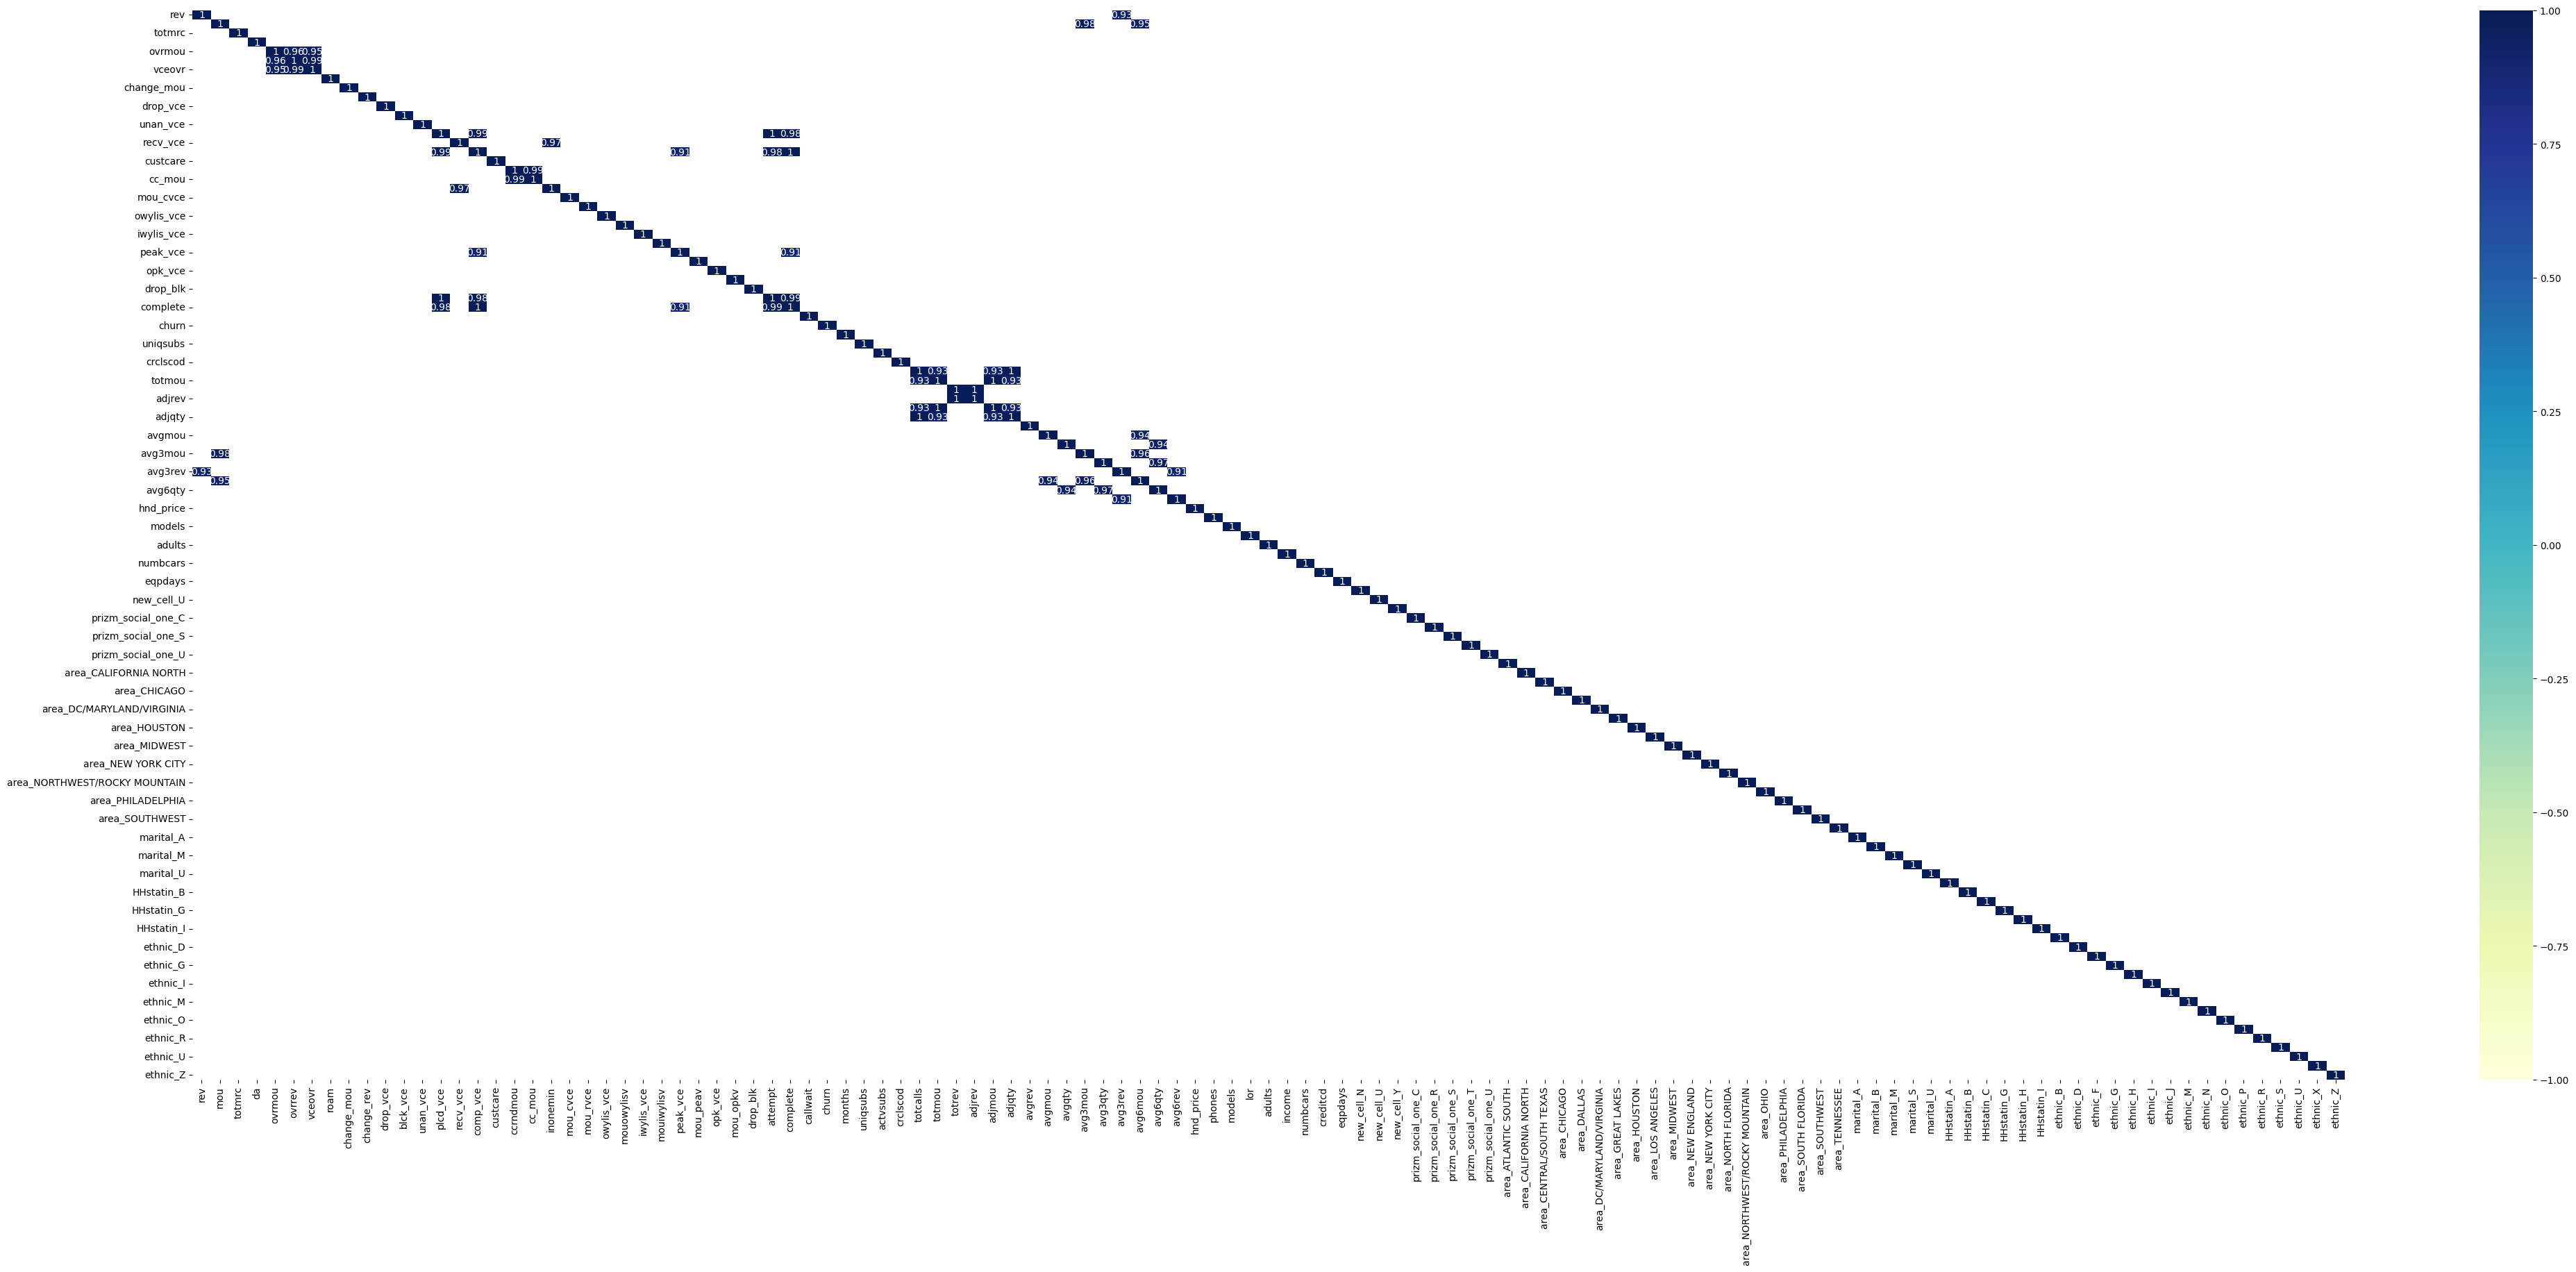

In [ ]:
print("Identificamos las variables con una alta correlacion")
df_corr = train5.corr(numeric_only=True)
threshold = 0.9

# Filtramos
filtered_corr_matrix = df_corr.applymap(lambda x: x if abs(x) >= threshold else np.nan)

# Ploteamos
plt.figure(figsize=(50, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='YlGnBu', cbar=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
def identify_pairs(df, target_variable, threshold=0.9):
    # Calculamos la matriz de corr
    corr_matrix = df.corr(numeric_only=True)

    # Creamos una máscara booleana para el triángulo superior de la matriz excluyendo la diagonal
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Encuentra los índices donde la matriz está por encima del umbral
    high_corr = upper_tri.stack().reset_index()
    high_corr.columns = ['Variable_1', 'Variable_2', 'Correlation']

    # Filtramos las parejas con correlación mayor al umbral
    high_corr = high_corr[high_corr['Correlation'].abs() > threshold]

    # Calculamos la correlación con la variable objetivo 'churn'
    target_corr = df.corr(numeric_only=True)[target_variable]

    # Añadimos la correlación con 'churn' para 'Variable 1' y 'Variable 2'
    high_corr['Correlation_with_Target_1'] = high_corr['Variable_1'].apply(lambda x: target_corr.get(x, np.nan))
    high_corr['Correlation_with_Target_2'] = high_corr['Variable_2'].apply(lambda x: target_corr.get(x, np.nan))

    # Tomamos la menor correlación con 'churn' entre las dos variables
    high_corr['Min_Correlation_with_Target'] = abs(high_corr[['Correlation_with_Target_1', 'Correlation_with_Target_2']]).min(axis=1)

    # Ordenamos por la correlación máxima con 'churn'
    high_corr = high_corr.sort_values(by='Min_Correlation_with_Target', ascending=False).reset_index(drop=True)

    return high_corr

print("Esta funcion crea un dataframe con los pares de variables correlacionadas entre si por encima de un umbral y su correlacion con la target")

Esta funcion crea un dataframe con los pares de variables correlacionadas entre si por encima de un umbral y su correlacion con la target


In [ ]:
identify_pairs(train5, 'churn', threshold=0.9)

Variable_1 Variable_2  Correlation  Correlation_with_Target_1  \
0         mou    avg3mou     0.982578                  -0.058674   
1    comp_vce   complete     0.997862                  -0.049984   
2    comp_vce   peak_vce     0.911556                  -0.049984   
3    peak_vce   complete     0.908605                  -0.048949   
4    comp_vce    attempt     0.984209                  -0.049984   
5     attempt   complete     0.985657                  -0.046540   
6    plcd_vce   comp_vce     0.985583                  -0.046446   
7    plcd_vce    attempt     0.998526                  -0.046446   
8    plcd_vce   complete     0.983516                  -0.046446   
9     avg3mou    avg6mou     0.963001                  -0.051821   
10        mou    avg6mou     0.947051                  -0.058674   
11    avg3qty    avg6qty     0.968552                  -0.046022   
12   recv_vce   inonemin     0.965774                  -0.040805   
13   ccrndmou     cc_mou     0.988691                  -0.034777   
14     totmou     adjmou     0.999786                  -0.030517   
15     totmou     adjqty     0.925168                  -0.030517   
16     adjmou     adjqty     0.925305                  -0.031061   
17   totcalls     totmou     0.925244                  -0.027974   
18   totcalls     adjmou     0.925029                  -0.027974   
19   totcalls     adjqty     0.999828                  -0.027974   
20     totrev     adjrev     0.998531                  -0.022864   
21     avgqty    avg6qty     0.944210                  -0.022570   
22     avgmou    avg6mou     0.936419                  -0.021166   
23     ovrrev     vceovr     0.994826                   0.021019   
24    avg3rev    avg6rev     0.913531                  -0.017745   
25     ovrmou     vceovr     0.953888                   0.015799   
26     ovrmou     ovrrev     0.956587                   0.015799   
27        rev    avg3rev     0.927784                  -0.014658   

    Correlation_with_Target_2  Min_Correlation_with_Target  
0                   -0.051821                     0.051821  
1                   -0.050039                     0.049984  
2                   -0.048949                     0.048949  
3                   -0.050039                     0.048949  
4                   -0.046540                     0.046540  
5                   -0.050039                     0.046540  
6                   -0.049984                     0.046446  
7                   -0.046540                     0.046446  
8                   -0.050039                     0.046446  
9                   -0.043985                     0.043985  
10                  -0.043985                     0.043985  
11                  -0.039017                     0.039017  
12                  -0.033199                     0.033199  
13                  -0.033180                     0.033180  
14                  -0.031061                     0.030517  
15                  -0.028420                     0.028420  
16                  -0.028420                     0.028420  
17                  -0.030517                     0.027974  
18                  -0.031061                     0.027974  
19                  -0.028420                     0.027974  
20                  -0.023368                     0.022864  
21                  -0.039017                     0.022570  
22                  -0.043985                     0.021166  
23                   0.021096                     0.021019  
24                  -0.021341                     0.017745  
25                   0.021096                     0.015799  
26                   0.021019                     0.015799  
27                  -0.017745                     0.014658

In [ ]:
def delete_low_corr_with_target(df, target_variable, threshold=0.9):
    while True:
        # Calculamos la matriz de correlación
        corr_matrix = df.corr(numeric_only=True)

        # Creamos una máscara booleana para el triángulo superior de la matriz excluyendo la diagonal
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

        # Encuentra los índices donde la matriz está por encima del umbral
        high_corr = upper_tri.stack().reset_index()
        high_corr.columns = ['Variable_1', 'Variable_2', 'Correlation']

        # Filtramos las parejas con correlación mayor al umbral
        high_corr = high_corr[high_corr['Correlation'].abs() > threshold]

        # Si no hay más pares de variables con correlación alta, terminamos
        if high_corr.empty:
            break

        # Encontramos el par con la mayor correlación absoluta
        max_corr_pair = high_corr.loc[high_corr['Correlation'].abs().idxmax()]
        var1, var2 = max_corr_pair['Variable_1'], max_corr_pair['Variable_2']

        # Comparamos las correlaciones con la variable objetivo
        corr_with_target_var1 = abs(corr_matrix[target_variable][var1])
        corr_with_target_var2 = abs(corr_matrix[target_variable][var2])

        # Eliminamos la variable con menor correlación con la variable objetivo
        if corr_with_target_var1 < corr_with_target_var2:
            df = df.drop(columns=[var1])
        else:
            df = df.drop(columns=[var2])


    return df

print("Esta funcion itera sobre el dataset y elimina de los pares con una correlacion sobre el threshold, la variable con menos correlacion con la target")

Esta funcion itera sobre el dataset y elimina de los pares con una correlacion sobre el threshold, la variable con menos correlacion con la target


In [ ]:
train6 = delete_low_corr_with_target(train5, 'churn', threshold=0.9)
train6

mou  totmrc      da  vceovr    roam  change_mou  change_rev  \
0       219.25   22.50  0.2475     0.0  0.0000     -157.25    -18.9975   
1        10.25   16.99  0.0000     0.0  0.0000       -4.25      0.0000   
2         7.50   38.00  0.0000     0.0  0.0000       -1.50      0.0000   
3       570.50   71.98  0.0000     0.0  0.0000       38.50      0.0000   
4      1312.25   75.00  1.2375     0.0  0.0000      156.75      8.1450   
...        ...     ...     ...     ...     ...         ...         ...   
85920   140.00   10.00  0.2475    11.7  0.0000      123.00     -4.9575   
85921   936.25   79.99  0.0000    52.7  2.5800      109.75    -22.5000   
85922   455.00   69.99  0.9900    10.4  0.0000     -241.00     -7.2950   
85923   830.50   59.99  0.7425     8.9  0.0975      159.50     -5.9500   
85924   152.00   69.99  0.0000     0.0  3.1450       62.00     -3.1450   

        drop_vce  blck_vce   unan_vce    recv_vce  custcare   ccrndmou  \
0       0.666667  0.666667   6.333333   42.333333  0.000000   0.000000   
1       0.333333  0.000000   2.666667    0.333333  0.000000   0.000000   
2       0.000000  0.000000   0.000000    1.333333  0.000000   0.000000   
3       9.666667  0.666667  77.000000   94.666667  8.666667  15.000000   
4      52.000000  7.666667  76.000000  365.000000  4.333333  11.000000   
...          ...       ...        ...         ...       ...        ...   
85920   1.000000  1.333333   4.666667    4.666667  0.000000   0.000000   
85921  11.666667  1.666667  26.666667  102.666667  0.333333   1.000000   
85922   2.666667  3.000000  42.333333   63.666667  0.000000   0.000000   
85923  12.666667  2.666667  54.000000   75.000000  0.333333   0.333333   
85924   3.000000  0.333333   4.333333    7.666667  1.333333  14.666667   

         mou_cvce    mou_rvce  owylis_vce  mouowylisv  iwylis_vce  mouiwylisv  \
0       90.643333   97.176667    0.000000    0.000000    0.000000    0.000000   
1        5.426667    0.000000    0.000000    0.000000    0.000000    0.000000   
2        8.410000    0.413333    0.333333    0.256667    0.000000    0.000000   
3      285.233333  106.330000   14.666667   10.816667    0.666667    0.366667   
4      369.536667  200.320000  370.333333  243.213333  147.000000   85.146667   
...           ...         ...         ...         ...         ...         ...   
85920   19.100000   10.856667    4.666667    3.126667    2.000000    8.566667   
85921  478.783333  224.973333   93.666667  180.833333   28.666667  144.496667   
85922  207.913333  105.433333   65.000000   50.750000   34.000000   67.190000   
85923  471.706667  222.053333   55.000000  116.556667   18.333333   77.033333   
85924   64.673333   23.043333    6.666667    9.993333    1.333333    3.380000   

         mou_peav     opk_vce    mou_opkv   drop_blk    complete   callwait  \
0      132.600000   24.000000   55.220000   1.333333   45.000000   0.333333   
1        5.193333    1.000000    0.233333   0.333333    6.000000   0.000000   
2        3.380000    3.666667    5.450000   0.000000    3.666667   0.000000   
3      173.476667   90.333333  218.086667  10.333333  137.000000   0.000000   
4      382.096667  303.666667  187.760000  59.666667  577.333333  22.666667   
...           ...         ...         ...        ...         ...        ...   
85920   16.950000   10.333333   13.006667   2.333333   18.333333   0.333333   
85921  474.263333   62.333333  229.493333  13.333333  183.000000   3.000000   
85922  175.523333  118.333333  137.823333   5.666667  211.666667   1.666667   
85923  325.596667  123.333333  368.170000  15.333333  192.000000   3.666667   
85924   66.383333   11.000000   21.333333   3.333333   23.000000   0.000000   

       churn  months  uniqsubs  actvsubs  crclscod   adjrev    adjmou  avgrev  \
0          1      61         2         1       0.0  1453.44   4085.00   29.66   
1          1      58         1         1       2.0  1934.47  24303.05   34.54   
2          0      60         1         1       1.0  1941.81   3035.0

Verificamos que ya no hayan variables altamente correlacionadas


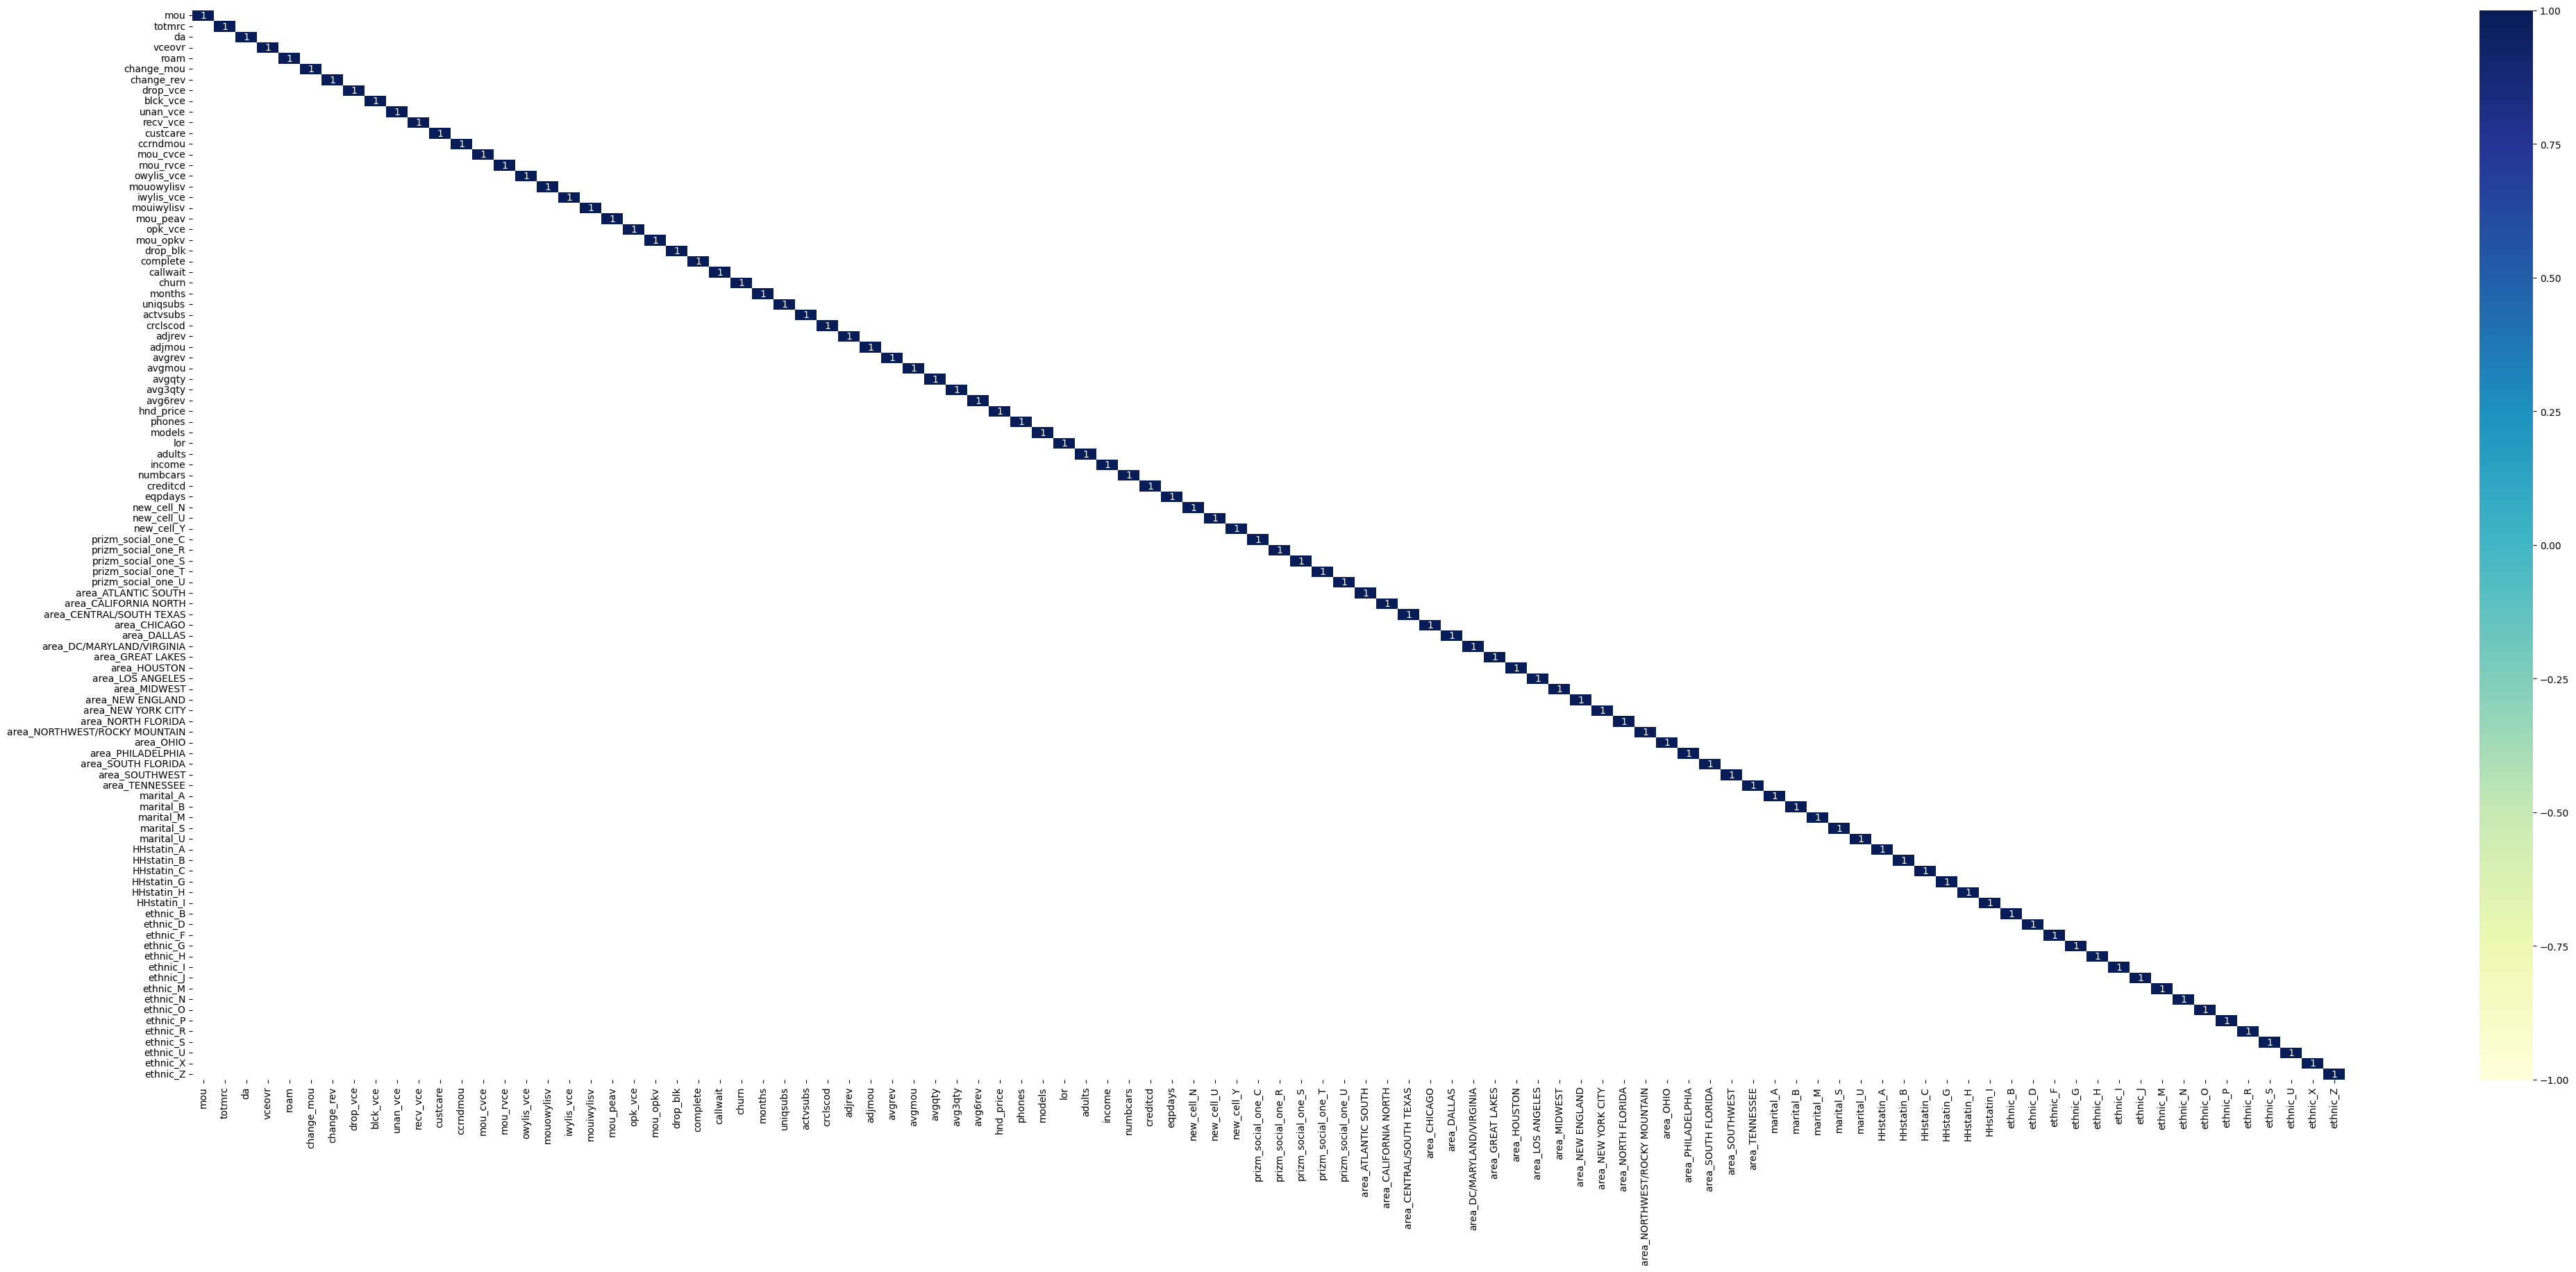

In [ ]:
print("Verificamos que ya no hayan variables altamente correlacionadas")
df_corr2 = train6.corr(numeric_only=True)
threshold = 0.9

# Filtramos
filtered_corr_matrix = df_corr2.applymap(lambda x: x if abs(x) >= threshold else np.nan)

# Ploteamos
plt.figure(figsize=(50, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='YlGnBu', cbar=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
identify_pairs(train6, 'churn', threshold=0.9)

Empty DataFrame
Columns: [Variable_1, Variable_2, Correlation, Correlation_with_Target_1, Correlation_with_Target_2, Min_Correlation_with_Target]
Index: []

In [ ]:
deleted_columns(train6, train5)

Columnas eliminadas: 48
	Pct de filas eliminadas acumuladas: 4.74%
totcalls:  Total number of calls over the life of the customer
comp_vce:  Mean number of completed voice calls
cc_mou:  Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls
totmou:  Total minutes of use over the life of the cus
attempt:  Mean number of attempted calls
peak_vce:  Mean number of inbound and outbound peak voice calls
avg6qty:  Average monthly number of calls over the previous six months
avg3mou:  Average monthly minutes of use over the previous three months
avg3rev:  Average monthly revenue over the previous three months
adjqty:  Billing adjusted total number of calls over the life of the customer
totrev:  Total revenue
inonemin:  Mean number of inbound calls less than one minute
ovrmou:  Mean overage minutes of use
plcd_vce:  Mean number of attempted voice calls placed
rev:  Mean monthly revenue (charge amount)
avg6mou:  Average monthly minutes of use over the previous six months
ovrre

{'Customer_ID',
 'adjqty',
 'asl_flag',
 'attempt',
 'avg3mou',
 'avg3rev',
 'avg6mou',
 'avg6qty',
 'blck_dat',
 'callfwdv',
 'cc_mou',
 'comp_dat',
 'comp_vce',
 'datovr',
 'drop_dat',
 'dualband',
 'dwllsize',
 'dwlltype',
 'forgntvl',
 'hnd_webcap',
 'infobase',
 'inonemin',
 'kid0_2',
 'kid11_15',
 'kid16_17',
 'kid3_5',
 'kid6_10',
 'mou_cdat',
 'mou_opkd',
 'mou_pead',
 'opk_dat',
 'ovrmou',
 'ovrrev',
 'ownrent',
 'peak_dat',
 'peak_vce',
 'plcd_dat',
 'plcd_vce',
 'recv_sms',
 'refurb_new',
 'rev',
 'rv',
 'threeway',
 'totcalls',
 'totmou',
 'totrev',
 'truck',
 'unan_dat'}

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
train7 = train6.copy()
print('Hacemos una copia de seguridad')

Hacemos una copia de seguridad


In [ ]:
baja_varianza = []
for col in train7.columns:
  if train7[col].var() < 0.01:
    baja_varianza.append(col)
    train7.drop(col,axis=1,inplace=True)
print('Se han eliminado las columnas con varianza <1%')
print(f'Columnas eliminadas: {baja_varianza}')



Se han eliminado las columnas con varianza <1%
Columnas eliminadas: ['ethnic_D', 'ethnic_M', 'ethnic_P', 'ethnic_X']


In [ ]:
train7.shape

(85925, 96)

In [ ]:
deleted_columns(train7, train6)

Columnas eliminadas: 52
	Pct de filas eliminadas acumuladas: 4.74%
ethnic_P: No hay descripción disponible
ethnic_X: No hay descripción disponible
ethnic_D: No hay descripción disponible
ethnic_M: No hay descripción disponible


{'Customer_ID',
 'adjqty',
 'asl_flag',
 'attempt',
 'avg3mou',
 'avg3rev',
 'avg6mou',
 'avg6qty',
 'blck_dat',
 'callfwdv',
 'cc_mou',
 'comp_dat',
 'comp_vce',
 'datovr',
 'drop_dat',
 'dualband',
 'dwllsize',
 'dwlltype',
 'ethnic_D',
 'ethnic_M',
 'ethnic_P',
 'ethnic_X',
 'forgntvl',
 'hnd_webcap',
 'infobase',
 'inonemin',
 'kid0_2',
 'kid11_15',
 'kid16_17',
 'kid3_5',
 'kid6_10',
 'mou_cdat',
 'mou_opkd',
 'mou_pead',
 'opk_dat',
 'ovrmou',
 'ovrrev',
 'ownrent',
 'peak_dat',
 'peak_vce',
 'plcd_dat',
 'plcd_vce',
 'recv_sms',
 'refurb_new',
 'rev',
 'rv',
 'threeway',
 'totcalls',
 'totmou',
 'totrev',
 'truck',
 'unan_dat'}

In [ ]:
deleted_columns_list = list(deleted_vars)
joblib.dump(deleted_columns_list,'/content/drive/MyDrive/Master_Data_Science/DSC0324BCN-ENTREGABLE_2-Barria_Bau_Guimerà_Maninatt_Solieri/Scaler/deleted_columns_list')

print("""Guardamos la lista completa de las columnas eliminadas durante el preprocessing,
para eliminarlas tambien en el dataset a predecir""")

Guardamos la lista completa de las columnas eliminadas durante el preprocessing, 
para eliminarlas tambien en el dataset a predecir


# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()

In [ ]:
train_clean = train7.copy()

In [ ]:
train_clean.head(10)

mou  totmrc      da  vceovr  roam  change_mou  change_rev   drop_vce  \
0   219.25  22.500  0.2475    0.00   0.0     -157.25    -18.9975   0.666667   
1    10.25  16.990  0.0000    0.00   0.0       -4.25      0.0000   0.333333   
2     7.50  38.000  0.0000    0.00   0.0       -1.50      0.0000   0.000000   
3   570.50  71.980  0.0000    0.00   0.0       38.50      0.0000   9.666667   
4  1312.25  75.000  1.2375    0.00   0.0      156.75      8.1450  52.000000   
5     0.00  16.990  0.0000    0.00   0.0        0.00     -0.1550   0.000000   
6   682.50  52.490  0.2475    0.00   0.0      147.50     -3.0625   9.000000   
7  1039.00  50.000  4.9500   41.95   0.0      198.00     23.2625  12.666667   
8    25.50  29.990  0.2475    0.00   0.0       59.50      4.0275   0.000000   
9    97.50  65.985  2.4750    0.00   0.0       23.50      6.8225   0.000000   

   blck_vce    unan_vce    recv_vce   custcare   ccrndmou    mou_cvce  \
0  0.666667    6.333333   42.333333   0.000000   0.000000   90.643333   
1  0.000000    2.666667    0.333333   0.000000   0.000000    5.426667   
2  0.000000    0.000000    1.333333   0.000000   0.000000    8.410000   
3  0.666667   77.000000   94.666667   8.666667  15.000000  285.233333   
4  7.666667   76.000000  365.000000   4.333333  11.000000  369.536667   
5  0.000000    0.000000    0.000000   0.000000   0.000000    0.000000   
6  1.666667   13.000000   13.000000   0.666667   5.333333  470.023333   
7  3.000000  176.000000   96.000000  11.333333  13.666667  460.920000   
8  1.000000    2.333333    0.000000   0.000000   0.000000    3.800000   
9  0.333333    4.000000    0.000000   4.000000  98.666667  136.493333   

     mou_rvce  owylis_vce  mouowylisv  iwylis_vce  mouiwylisv    mou_peav  \
0   97.176667    0.000000    0.000000    0.000000    0.000000  132.600000   
1    0.000000    0.000000    0.000000    0.000000    0.000000    5.193333   
2    0.413333    0.333333    0.256667    0.000000    0.000000    3.380000   
3  106.330000   14.666667   10.816667    0.666667    0.366667  173.476667   
4  200.320000  370.333333  243.213333  147.000000   85.146667  382.096667   
5    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
6   42.196667    6.666667    6.230000    0.000000    0.000000   81.066667   
7  213.853333  103.333333   54.713333    0.333333    0.056667  377.453333   
8    0.000000    0.000000    0.000000    0.000000    0.000000    1.866667   
9    0.000000    3.666667   15.366667    0.000000    0.000000   66.073333   

      opk_vce    mou_opkv   drop_blk    complete   callwait  churn  months  \
0   24.000000   55.220000   1.333333   45.000000   0.333333      1      61   
1    1.000000    0.233333   0.333333    6.000000   0.000000      1      58   
2    3.666667    5.450000   0.000000    3.666667   0.000000      0      60   
3   90.333333  218.086667  10.333333  137.000000   0.000000      0      57   
4  303.666667  187.760000  59.666667  577.333333  22.666667      0      59   
5    0.000000    0.000000   0.000000    0.000000   0.000000      1      53   
6   53.000000  431.153333  10.666667   73.333333   0.666667      0      53   
7  192.333333  297.320000  15.666667  346.666667   4.000000      0      55   
8    1.666667    1.933333   1.000000    3.333333   0.000000      0      57   
9    7.333333   70.420000   0.333333   15.333333   0.000000      0      59   

   uniqsubs  actvsubs  crclscod   adjrev    adjmou  avgrev  avgmou  avgqty  \
0         2         1       0.0  1453.44   4085.00   29.66   83.37   32.69   
1         1         1       2.0  1934.47  24303.05   34.54  433.98  140.86   
2         1         1       1.0  1941.81   3035.00   40.45   63.23   30.81   
3         1         1       0.0  2166.48  13965.00   38.69  249.38   79.50   
4         2         2       2.0  3932.90  40295.00   83.68  857.34  560.89   
5         2         2       0.0  3065.24  17371.03   58.95  334.06  120.60   
6         1         1       1.0  1423.06  12439.00   34.71  303.39  109.02   
7 

In [ ]:
data_path = '/content/drive/MyDrive/Master_Data_Science/DSC0324BCN-ENTREGABLE_2-Barria_Bau_Guimerà_Maninatt_Solieri/Clean_Data/traintest_clean'

In [ ]:
train_clean.to_pickle(data_path)